In [1]:
reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


## Importing Packages

In [2]:
import sys
import numpy as np

import time
import sys
import warnings
import datetime
import gc
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 
import os
import seaborn as sns
from pathlib import Path
import pickle
import plotly as pl

from sklearn.model_selection import GridSearchCV
import data_prep 
import data_summary
import lime_ModelExplainer
import data_split
#import plot_residual
import reading_data
import eda
from lime_ModelExplainer import lime_explainer
%matplotlib inline  

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

from imblearn.under_sampling import TomekLinks

from sklearn.decomposition import PCA
import imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

from scipy.stats import boxcox
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import mlModels
import pickle

from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, accuracy_score, precision_score, log_loss, recall_score, roc_curve, roc_auc_score, confusion_matrix,classification_report 
from sklearn.metrics import  adjusted_mutual_info_score, balanced_accuracy_score
from sklearn.metrics import fbeta_score


from config_param import project_identifier
from directoryPath import mlresult_dir, parent_dir, parent_dir_project, mlresult_dir,  data_dir, input_dir, mlobjects
import directoryPath

import h2o

/root/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

Using TensorFlow backend.


### Appending path to import h2o

In [6]:
sys.path.append('/datascience/home/ssaha/Test/')
sys.path.append('/datascience/home/ssaha/')

In [10]:
gc.collect()

0

# Reading data

In [69]:
start= time.time()
df_2016= reading_data.read_data(path="/datascience/home/ssaha/input/c360_customeradt_in_market_lexus_082016/")
print(time.time() -start)

138.08937549591064


### Creating Dependent Column

In [70]:
start= time.time()
y = df_2016["dep_purchase_lexus_new_luv_6mo"] 
print(time.time() -start)

1.1536881923675537


In [71]:
start_time=time.time()
X= data_prep.find_indep_feat(df_2016)
print(time.time()- start_time)

76.66726016998291


## Overall summary


In [72]:
df_2016.shape

(4742446, 707)

In [73]:
start= time.time()
data_summary.get_overall_summary(df_2016)
print(time.time() -start)

76.677237033844


In [15]:
start= time.time()
data_summary.get_missing_value_count(df_2016).head()
print(time.time() -start)


 Time taken to execute the function is 102.56036257743835

102.57046222686768


In [16]:
start= time.time()
data_summary.get_most_frequent_count(df_2016).head()
print(time.time() -start)

457.0633430480957


In [17]:
start= time.time()
data_summary.write_to_excel(df_2016)
print(time.time() -start)


 Time taken to execute the function is 79.99176406860352

891.215439081192


In [19]:
data_summary.get_missing_value_count(X)


 Time taken to execute the function is 52.44811511039734



Percentage of missing values
customer_id                                                    0.000000
no_owned_vehicle                                              21.820596
no_new_purchase_vehicle                                       62.861570
no_used_purchase_vehicle                                      94.557555
no_cpo_purchase_vehicle                                       89.726441
avg_assoc_length                                              21.820596
max_assoc_length                                              21.820596
no_sales_dealer_assoc                                         49.873356
days_since_last_purchase_vehicle                              49.873356
days_since_last_sold_vehicle                                  77.188902
active_brand                                                  21.820596
association_type                                              21.820596
state_residence                                                0.184167
avg_zip3_vehicle_val                                           0.435493
owned_lexus_sedan_ind                                          0.000000
owned_lexus_LUV_ind                                            0.000000
owned_lexus_new_luv_ind                                        0.000000
owned_lexus_cpo_luv_ind                                        0.000000
owned_lexus_new_sedan_ind                                      0.000000
owned_lexus_cpo_sedan_ind                                      0.000000
owned_lexus_ind                                                0.000000
owned_corolla_ind                                              0.000000
owned_rav4_ind                                                 0.000000
owned_prius_ind                                                0.000000
owned_suv_ind                                                  0.000000
owned_hybrid_ind                                               0.000000
owned_big_engine_vehicle_ind                                   0.000000
owned_4wd_vehicle_ind                                          0.000000
multiple_vehicle_type_ind                                      0.000000
owned_lexus_sedan_no                                          21.820596
...                                                                 ...
last_serviced_dealer_no                                       32.196655
last_serviced_dealer_markettype                               36.173865
last_serviced_dealer_region                                   32.196655
ever_customer_payment_ind                                      0.000000
ever_warranty_payment_ind                                      0.000000
ever_service_ind                                               0.000000
ever_service_hybrid_ind                                        0.000000
ever_service_lexus_sedan_ind                                   0.000000
ever_service_lexus_LUV_ind                                     0.000000
customer_high_payment_ind                                      0.000000
warranty_high_payment_ind                                      0.000000
high_service_ind                                               0.000000
high_ro_time_ind                                               0.000000
current_vehicle_serviced_ind                                   0.000000
current_vehicle_customer_full_payment_ind                      0.000000
current_vehicle_high_service_ind                               0.000000
current_vehicle_high_ro_time_ind                               0.000000
has_nsh                                                        0.000000
household_id                                                   0.000021
customer_zipcode                                               0.218453
pma_toy_scion_dealership_cd                                    1.110861
pma_toy_scion_dealership_region                                0.000000
pma_toy_scion_dealership_markettype                            1.491867
pma_lexus_dealership_cd                                        1.121889
pma_lexus_d


 Time taken to execute the function is 57.25544619560242



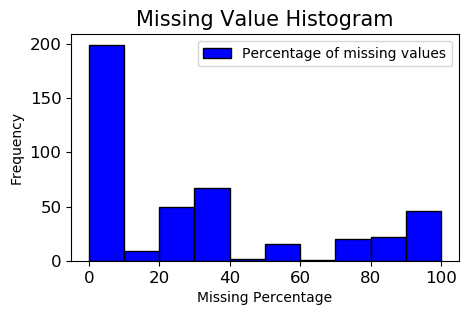

In [20]:
eda.plot_missing(X_2016)

### Remove zero varience

In [74]:
start= time.time()
X_removed_one=data_prep.remove_cols_with_one_unique_value(X)
print(time.time() -start)


 Time taken to execute the function is 49.082491874694824

65.83027219772339


In [22]:
X.shape

(4742446, 539)

In [23]:
X_removed_one.shape

(4742446, 431)

### Removing Few variables

In [75]:
X_removed_one.drop(['age_dt', 'age_no',  'household_id', 'customer_id'], axis=1,inplace=True, errors=False)

### Converting numeric to object based on no of unique values

In [77]:
start= time.time()
X_casted, num_to_cat= type_casting(X_removed_one, 12)
print(time.time()- start)

Converting to categorical variable from numerical: owned_lexus_sedan_ind
Converting to categorical variable from numerical: owned_lexus_LUV_ind
Converting to categorical variable from numerical: owned_lexus_new_luv_ind
Converting to categorical variable from numerical: owned_lexus_cpo_luv_ind
Converting to categorical variable from numerical: owned_lexus_new_sedan_ind
Converting to categorical variable from numerical: owned_lexus_cpo_sedan_ind
Converting to categorical variable from numerical: owned_lexus_ind
Converting to categorical variable from numerical: owned_corolla_ind
Converting to categorical variable from numerical: owned_rav4_ind
Converting to categorical variable from numerical: owned_prius_ind
Converting to categorical variable from numerical: owned_suv_ind
Converting to categorical variable from numerical: owned_hybrid_ind
Converting to categorical variable from numerical: owned_big_engine_vehicle_ind
Converting to categorical variable from numerical: owned_4wd_vehicle_i

In [81]:
gc.collect()

476

In [82]:
X_casted.to_pickle(mlresult_dir + str(project_identifier) + '_' + str(datetime.datetime.now().day)+ 'X_casted.pkl')
y.to_pickle(mlresult_dir + str(project_identifier) + '_' + str(datetime.datetime.now().day)+ '_y_new_luv.pkl')

### EDA

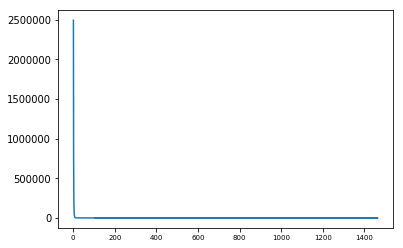

In [34]:
X_removed_one['no_owned_vehicle'].value_counts().plot()

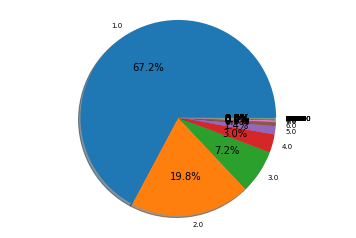

In [35]:
labels = X_removed_one['no_owned_vehicle'].astype('category').cat.categories.tolist()
counts = X_removed_one['no_owned_vehicle'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [79]:
x=X_casted.copy()

### Replace nulls with 0

In [83]:
repnullvars=["no_owned_vehicle",
"no_new_purchase_vehicle",
"no_used_purchase_vehicle",
"no_cpo_purchase_vehicle",
"multiple_vehicle_type_ind",
"owned_is250_ind",
"owned_is350_ind",
"owned_hs250h_ind",
"owned_ct200h_ind",
"owned_white_vehicle_ind",
"owned_black_vehicle_ind",
"owned_silver_gray_vehicle_ind",
"owned_gold_brown_orange_vehicle_ind",
"owned_yellow_vehicle_ind",
"owned_green_vehicle_ind",
"owned_aqua_vehicle_ind",
"owned_blue_vehicle_ind",
"owned_purple_vehicle_ind",
"purchased_vehicle_last_2years_ind",
"no_ro_visits_48_60mo",
"no_ro_visits_36_48mo",
"no_ro_visits_24_36mo",
"no_ro_visits_18_24mo",
"no_ro_visits_12_18mo",
"no_ro_visits_6_12mo",
"no_ro_visits_0_6mo",
"no_ro_visits"]


In [62]:
X_casted['no_owned_vehicle'].fillna(0, inplace= True)

In [63]:
X_casted['no_owned_vehicle'].isnull().sum()

0

In [84]:
for col in repnullvars:
    X_casted[col].fillna(0, inplace=True) # Time taken 5 min

In [85]:
X_casted[repnullvars].isnull().sum()

no_owned_vehicle                       0
no_new_purchase_vehicle                0
no_used_purchase_vehicle               0
no_cpo_purchase_vehicle                0
multiple_vehicle_type_ind              0
owned_is250_ind                        0
owned_is350_ind                        0
owned_hs250h_ind                       0
owned_ct200h_ind                       0
owned_white_vehicle_ind                0
owned_black_vehicle_ind                0
owned_silver_gray_vehicle_ind          0
owned_gold_brown_orange_vehicle_ind    0
owned_yellow_vehicle_ind               0
owned_green_vehicle_ind                0
owned_aqua_vehicle_ind                 0
owned_blue_vehicle_ind                 0
owned_purple_vehicle_ind               0
purchased_vehicle_last_2years_ind      0
no_ro_visits_48_60mo                   0
no_ro_visits_36_48mo                   0
no_ro_visits_24_36mo                   0
no_ro_visits_18_24mo                   0
no_ro_visits_12_18mo                   0
no_ro_visits_6_1

In [86]:
for col in repnullvars:
    print(X_casted[col].value_counts())

1.0       2491779
0.0       1034830
2.0        734422
3.0        268177
4.0        111826
5.0         50386
6.0         24127
7.0         12021
8.0          6109
9.0          3340
10.0         1839
11.0         1127
12.0          684
13.0          424
14.0          256
15.0          171
16.0          125
18.0           88
17.0           83
19.0           61
21.0           44
20.0           41
22.0           33
24.0           30
23.0           24
25.0           21
26.0           20
28.0           18
27.0           17
29.0           10
           ...   
118.0           1
116.0           1
112.0           1
110.0           1
107.0           1
1464.0          1
1011.0          1
102.0           1
134.0           1
135.0           1
136.0           1
138.0           1
203.0           1
200.0           1
195.0           1
187.0           1
185.0           1
184.0           1
181.0           1
180.0           1
175.0           1
174.0           1
171.0           1
170.0           1
167.0     

Name: no_ro_visits_24_36mo, Length: 87, dtype: int64
0.0       3629107
1.0        673827
2.0        282405
3.0         95762
4.0         35402
5.0         13910
6.0          6312
7.0          2840
8.0          1426
9.0           679
10.0          334
11.0          152
12.0           92
13.0           44
14.0           38
16.0           17
15.0           10
18.0            8
19.0            6
17.0            6
20.0            5
23.0            3
30.0            3
54.0            2
156.0           2
21.0            2
22.0            2
34.0            2
28.0            2
65.0            2
           ...   
294.0           1
229.0           1
226.0           1
225.0           1
224.0           1
218.0           1
210.0           1
208.0           1
205.0           1
172.0           1
161.0           1
148.0           1
123.0           1
103.0           1
403.0           1
101.0           1
99.0            1
92.0            1
91.0            1
86.0            1
80.0            1
74.0       

In [87]:
repnonneg= ["avg_mileage_permonth_recent_vehicle","avg_cust_pay_12_18mo","total_cust_pay_12_18mo",
"avg_custpay_recent_vehicle","avg_cust_pay_18_24mo","total_cust_pay_18_24mo",
"avg_cust_pay_6_12mo","total_cust_pay_6_12mo","avg_cust_pay_0_6mo",
"total_cust_pay_0_6mo","max_cust_pay_12_18mo","max_cust_pay_18_24mo",
"max_cust_pay_0_6mo","max_cust_pay_6_12mo","avg_custpay",
"ratio_avg_cust_pay","total_cust_pay","avg_cust_pay_24_36mo",
"total_part_amt","avg_cust_pay_36_48mo","avg_cust_pay_48_60mo",
"first_purchase_age","days_since_last_case_closed","est_current_mileage",
"second_last_purchase_age","last_purchase_age","total_labor_amt",
"avg_ro_time_0_6mo","avg_ro_time_6_12mo","avg_ro_time_12_18mo",
"avg_warrpay_recent","avg_warrpay","total_warranty_pay",
"avg_ro_time_18_24mo","avg_no_days_case_opened",
"max_no_days_case_opened"]

In [88]:
X_casted[repnonneg]= X_casted[repnonneg].abs() # time taken 5 sec

In [90]:
X_casted[repnonneg].head()

avg_mileage_permonth_recent_vehicle  avg_cust_pay_12_18mo  \
0                                  0.0                   0.0   
1                                  NaN                   NaN   
2                                  NaN                   NaN   
3                                  NaN                   NaN   
4                                  NaN                   NaN   

   total_cust_pay_12_18mo  avg_custpay_recent_vehicle  avg_cust_pay_18_24mo  \
0                     0.0                         0.0                   0.0   
1                     NaN                         NaN                   NaN   
2                     NaN                         NaN                   NaN   
3                     NaN                         NaN                   NaN   
4                     NaN                         NaN                   NaN   

   total_cust_pay_18_24mo  avg_cust_pay_6_12mo  total_cust_pay_6_12mo  \
0                     0.0                  0.0                    0.0   
1                     NaN                  NaN                    NaN   
2                     NaN                  NaN                    NaN   
3                     NaN                  NaN                    NaN   
4                     NaN                  NaN                    NaN   

   avg_cust_pay_0_6mo  total_cust_pay_0_6mo           ...             \
0                 0.0                   0.0           ...              
1                 NaN                   NaN           ...              
2                 NaN                   NaN           ...              
3                 NaN                   NaN           ...              
4                 NaN                   NaN           ...              

   total_labor_amt  avg_ro_time_0_6mo  avg_ro_time_6_12mo  \
0           109.99                0.0                 0.0   
1              NaN                NaN                 NaN   
2              NaN                NaN                 NaN   
3              NaN                NaN                 NaN   
4              NaN                NaN                 NaN   

   avg_ro_time_12_18mo  avg_warrpay_recent  avg_warrpay  total_warranty_pay  \
0                  0.0                 0.0          0.0                 0.0   
1                  NaN                 NaN          NaN                 NaN   
2                  NaN                 NaN          NaN                 NaN   
3                  NaN                 NaN          NaN                 NaN   
4                  NaN                 NaN          NaN                 NaN   

   avg_ro_time_18_24mo  avg_no_days_case_opened  max_no_days_case_opened  
0                  0.0                      NaN                      NaN  
1                  NaN                      NaN                      NaN  
2                  NaN                      NaN                      NaN  
3                  NaN                      NaN                      NaN  
4                  NaN                      NaN                      NaN  

[5 rows x 36 columns]

### Binning or Clubing categories

In [44]:
bins = [-np.inf,0,1,2,3,np.inf]
names = [0,1,2,3,'3+']

x_new = pd.cut(x, bins, labels=names)


In [ ]:
# 7:47

In [91]:
X_casted['visited_in_last_2years'] =  np.where(X_casted['no_ro_visits_18_24mo'] + 
                                                         X_casted['no_ro_visits_12_18mo'] + 
                                                         X_casted['no_ro_visits_6_12mo'] + 
                                                         X_casted['no_ro_visits_0_6mo'] > 0, 1, 0)
X_casted['visited_in_last_2years']= X_casted['visited_in_last_2years'].astype('O')
X_casted.drop(['no_ro_visits_18_24mo','no_ro_visits_12_18mo', 'no_ro_visits_6_12mo', 'no_ro_visits_0_6mo'], axis=1,inplace=True, errors=False)

In [94]:
X_casted['visited_in_last_2years'].value_counts()

0    2818399
1    1924047
Name: visited_in_last_2years, dtype: int64

In [96]:
X_casted['visited_in_last_5years'] =  np.where(X_casted['no_ro_visits_48_60mo'] + 
                                                         X_casted['no_ro_visits_36_48mo'] + 
                                                         X_casted['no_ro_visits_24_36mo'] > 0, 1, 0)
X_casted['visited_in_last_5years']= X_casted['visited_in_last_5years'].astype('O')
X_casted.drop(['no_ro_visits_24_36mo', 'no_ro_visits_36_48mo', 'no_ro_visits_48_60mo'], axis=1,inplace=True, errors=False)


In [97]:
# binning ro visits
bins = [-np.inf,0,1,2,3,np.inf]
names = [0,1,2,3,4]
X_casted['no_ro_vistis'] = pd.cut(X_casted['no_ro_visits'], bins, labels=names)

In [103]:
X_casted['no_ro_vistis'].value_counts()

4+    2363337
0     1526909
1      314097
2      283420
3      254683
Name: no_ro_vistis, dtype: int64

In [107]:
X_casted['no_servicing_dealer'].fillna(0, inplace= True)
X_casted['no_servicing_dealer'] = np.where(X_casted['no_servicing_dealer'].astype('int')<=1, 1, '2+')

In [109]:
X_casted['no_servicing_dealer'].value_counts()

1     3536431
2+    1206015
Name: no_servicing_dealer, dtype: int64

In [121]:
X_casted['owned_lexus_sedan_no']= np.where(X_casted['owned_lexus_sedan_no']==0, 0, (np.where(X_casted['owned_lexus_sedan_no']==1,1,'2+')))

X_casted['owned_lexus_LUV_no']= np.where(X_casted['owned_lexus_LUV_no']==0, 0, (np.where(X_casted['owned_lexus_LUV_no']==1,1,'2+')))

In [ ]:
#Columns addeded for creating other new columns hence not using


# learning_set$no_ro_visits_48_60mo_cat <- as.factor(ifelse(learning_set$no_ro_visits_48_60mo==0,"0",
  #                                                              ifelse(learning_set$no_ro_visits_48_60mo==1,"1",
  #                                                                     ifelse(learning_set$no_ro_visits_48_60mo==2,"2","3+"))))
  # learning_set$no_ro_visits_36_48mo_cat <- as.factor(ifelse(learning_set$no_ro_visits_36_48mo==0,"0",
  #                                                              ifelse(learning_set$no_ro_visits_36_48mo==1,"1",
  #                                                                     ifelse(learning_set$no_ro_visits_36_48mo==2,"2","3+"))))
  # learning_set$no_ro_visits_24_36mo_cat <- as.factor(ifelse(learning_set$no_ro_visits_24_36mo==0,"0",
  #                                                              ifelse(learning_set$no_ro_visits_24_36mo==1,"1",
  #                                                                     ifelse(learning_set$no_ro_visits_24_36mo==2,"2","3+"))))
  # learning_set$no_ro_visits_18_24mo_cat <- as.factor(ifelse(learning_set$no_ro_visits_18_24mo==0,"0",
  #                                                              ifelse(learning_set$no_ro_visits_18_24mo==1,"1",
  #                                                                     ifelse(learning_set$no_ro_visits_18_24mo==2,"2","3+"))))
  # learning_set$no_ro_visits_12_18mo_cat <- as.factor(ifelse(learning_set$no_ro_visits_12_18mo==0,"0",
  #                                                              ifelse(learning_set$no_ro_visits_12_18mo==1,"1",
  #                                                                     ifelse(learning_set$no_ro_visits_12_18mo==2,"2","3+"))))
  # learning_set$no_ro_visits_6_12mo_cat  <- as.factor(ifelse(learning_set$no_ro_visits_6_12mo==0,"0",
  #                                                              ifelse(learning_set$no_ro_visits_6_12mo==1,"1",
  #                                                                     ifelse(learning_set$no_ro_visits_6_12mo==2,"2","3+"))))
  # learning_set$no_ro_visits_0_6mo_cat   <- as.factor(ifelse(learning_set$no_ro_visits_0_6mo==0,"0",
  #                                                              ifelse(learning_set$no_ro_visits_0_6mo==1,"1",
  #                                                                     ifelse(learning_set$no_ro_visits_0_6mo==2,"2","3+"))))
  # 


In [130]:
X_casted['no_owned_vehicle'] = X_casted['no_owned_vehicle'].astype('O')
X_casted['no_new_purchase_vehicle'] = X_casted['no_new_purchase_vehicle'].astype('O')



In [136]:
more_cats=['no_used_purchase_vehicle',
 'no_cpo_purchase_vehicle',
 'days_since_last_purchase_vehicle',
 'days_since_last_sold_vehicle',
 'multiple_vehicle_type_ind',
 'owned_hybrid_no',
 'owned_is250_ind',
 'owned_is350_ind',
 'owned_hs250h_ind',
 'owned_ct200h_ind',
 'owned_white_vehicle_ind',
 'owned_black_vehicle_ind',
 'owned_silver_gray_vehicle_ind',
 'owned_gold_brown_orange_vehicle_ind',
 'owned_yellow_vehicle_ind',
 'owned_green_vehicle_ind',
 'owned_aqua_vehicle_ind',
 'owned_blue_vehicle_ind',
 'owned_purple_vehicle_ind',
 'purchased_vehicle_last_2years_ind',
 'no_vehicles_purchased_last_5yr',
 'days_since_first_purchase_vehicle',
 'owned_luxury_no',
 'avg_no_vehicles_per_hh',
'no_sales_survey',
 'no_service_survey',
 'no_cc_cases',
 'no_communication_received',
 'no_campaign_received',
 'no_communication_opened',
 'no_campaign_opened',
 'no_communication_clicked',
 'no_campaign_clicked',
 'no_communication_opened_nd_clicked',
 'no_campaign_opened_nd_clicked',
 'no_communication_opened_nt_clicked',
 'no_campaign_opened_nt_clicked',
 'no_campaign_active',
 'no_campaign_expired',
  'no_handraiser',
 'no_brochures_requested',
 'no_communication_received_lexus',
 'no_communication_dates_lexus',
 'no_communication_opened_lexus',
 'no_campaign_opened_lexus',
 'no_communication_clicked_lexus',
 'no_campaign_clicked_lexus',
 'no_email_campaign_received',
 'no_email_campaign_received_lexus',
 'no_distinct_communication_dates',
 'no_distinct_communication_dates_lexus',
 'no_dlr_campgns',
 'no_dlr_direct_mail_campgns',
 'no_dlr_email_campgns',
 'no_dlr_campgn_emails_opened',
 'no_dlr_campgn_emails_sent',
 'no_dlr_campgn_optout',
 'no_days_since_lastro_recent',
 'no_days_since_lastro',
 'no_days_since_firstro',
 'no_repairs_under_warranty_most_recent_veh',
 'no_repairs_after_warranty_most_recent_veh',
 'avg_no_repairs_under_warranty',
 'avg_no_repairs_after_warranty',
 'est_current_mileage',
 'no_ro_visits',
 'no_ro_vehicle',
 'visited_in_last_2years',
 'visited_in_last_5years']

In [137]:
X_casted[more_cats]=  X_casted[more_cats].astype('O')

In [155]:
%matplotlib inline

In [150]:
X_removed_one.head()

no_owned_vehicle no_new_purchase_vehicle no_used_purchase_vehicle  \
0                8                       1                        0   
1                1                       0                        0   
2                0                       0                        0   
3                0                       0                        0   
4                0                       0                        0   

  no_cpo_purchase_vehicle  avg_assoc_length  max_assoc_length  \
0                       0          1810.625            8202.0   
1                       0          5997.000            5997.0   
2                       0               NaN               NaN   
3                       0               NaN               NaN   
4                       0               NaN               NaN   

   no_sales_dealer_assoc days_since_last_purchase_vehicle  \
0                    1.0                             2802   
1                    NaN                              NaN   
2                    NaN                              NaN   
3                    NaN                              NaN   
4                    NaN                              NaN   

  days_since_last_sold_vehicle active_brand     ...       \
0                         2766        Lexus     ...        
1                          NaN        Lexus     ...        
2                          NaN         None     ...        
3                          NaN         None     ...        
4                          NaN         None     ...        

  pma_lexus_dealership_cd pma_lexus_dealership_region  \
0                 60908.0                          34   
1                 63105.0                          33   
2                 99999.0                           0   
3                 99999.0                           0   
4                 99999.0                           0   

   pma_lexus_dealership_markettype mail_adr_latitude mail_adr_longitude  \
0                     Single Point         +26422787         -081829644   
1                      Metro Point         +40859176         -073491514   
2                                               None               None   
3                                               None               None   
4                                               None               None   

  customer_language_english_ind customer_language_spanish_ind  \
0                             1                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

  visited_in_last_2years visited_in_last_5years no_ro_vistis  
0                      0                      0            2  
1                      0                      0            0  
2                      0                      0            0  
3                      0                      0            0  
4                      0                      0            0  

[5 rows x 423 columns]

In [151]:
X_casted.to_pickle(mlresult_dir + str(project_identifier) + '_' + str(datetime.datetime.now().day)+ 'X_partially_transformed.pkl')

X_casted= pd.read_pickle(mlresult_dir + 'c360_customeradt_in_market_lexus_15X_partially_transformed.pkl') # Time taken to read 2 min

y= pd.read_pickle(mlresult_dir + 'c360_customeradt_in_market_lexus_14_y_new_luv.pkl') # Time taken to read 2 sec

In [21]:
y.shape

(4742446,)

In [160]:
X_casted['avg_assoc_length'].dtypes

dtype('float64')

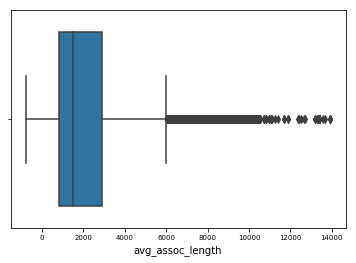

In [159]:
sns.boxplot(X_casted['avg_assoc_length'])

In [13]:
num_cols= X_casted.select_dtypes(exclude='O').columns.tolist()

In [14]:
num_cols

['avg_assoc_length',
 'max_assoc_length',
 'no_sales_dealer_assoc',
 'avg_zip3_vehicle_val',
 'total_vehicle_purchase_value',
 'new_vehicle_purchase_value',
 'cpo_vehicle_total_purchase_value',
 'used_vehicle_total_purchase_value',
 'first_purchase_vehicle_msrp',
 'last_purchase_vehicle_msrp',
 'first_purchase_age',
 'last_purchase_age',
 'second_last_purchase_age',
 'no_leased_vehicle',
 'last_sales_dealer_region',
 'seeking_cred',
 'max_value_vehicles_per_hh',
 'length_of_residence',
 'last_sales_osat_score',
 'avg_sales_osat_score',
 'last_service_osat_score',
 'avg_service_osat_score',
 'days_since_last_case_open',
 'avg_no_days_case_opened',
 'max_no_days_case_opened',
 'days_since_last_case_closed',
 'days_since_last_communication',
 'days_since_last_opened_campaign',
 'days_since_last_clicked_campaign',
 'lhr_max_days_between_leads',
 'no_lead',
 'days_since_first_lead',
 'days_since_last_lead',
 'days_since_first_handraiser',
 'days_since_last_handraiser',
 'days_since_last_bro

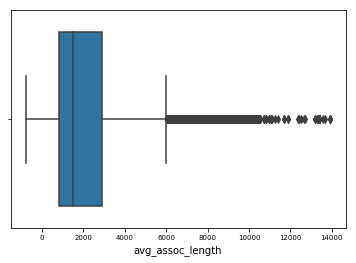

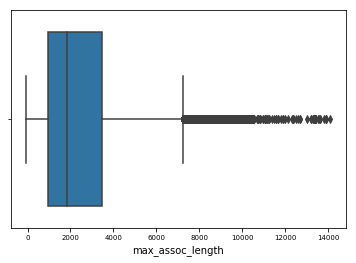

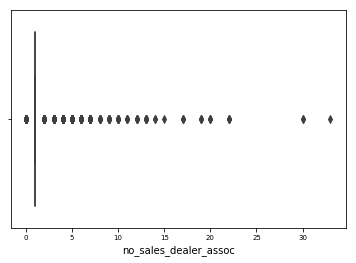

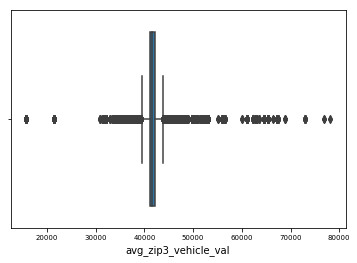

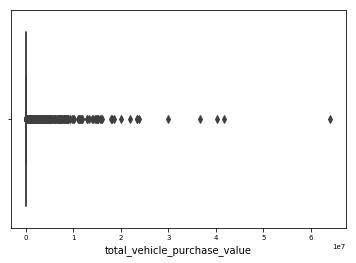

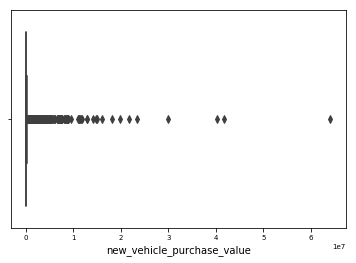

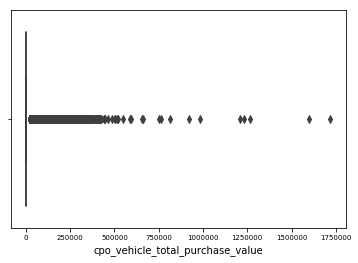

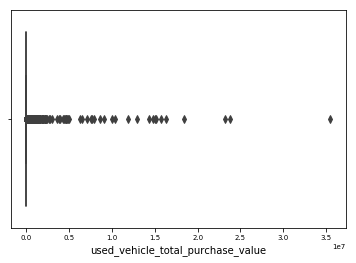

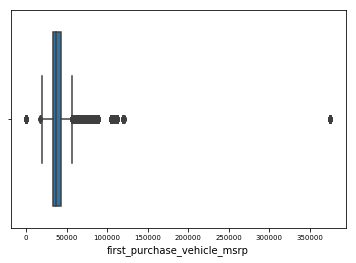

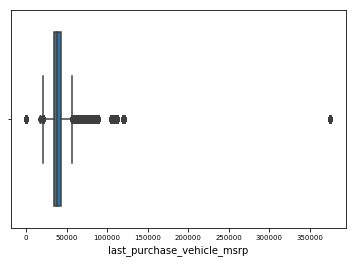

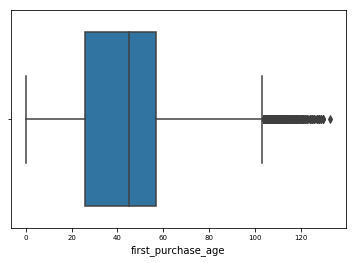

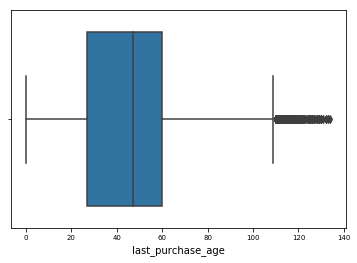

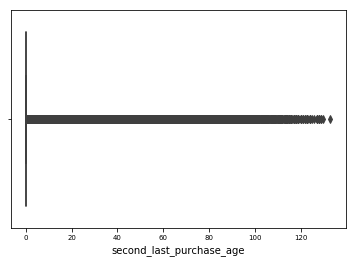

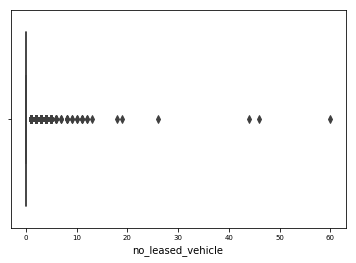

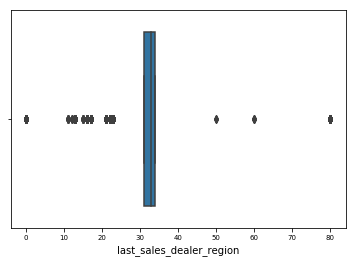

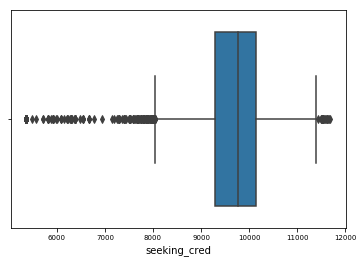

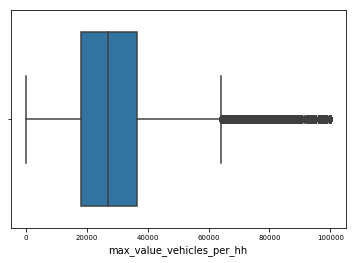

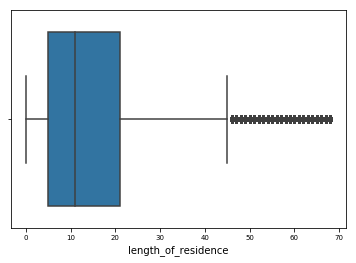

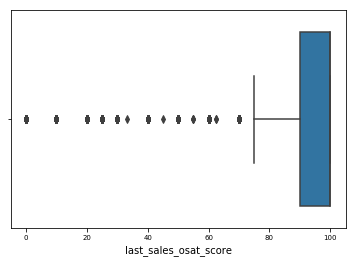

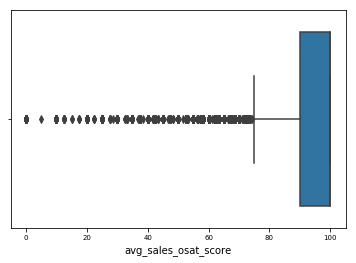

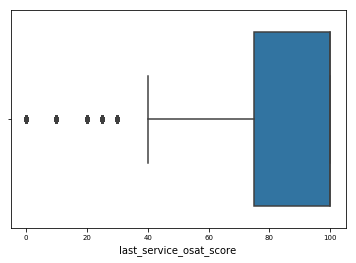

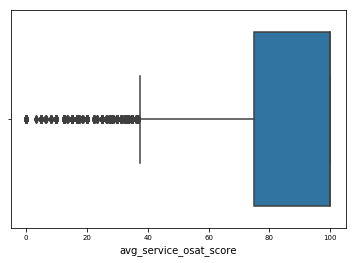

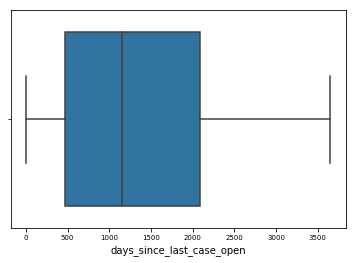

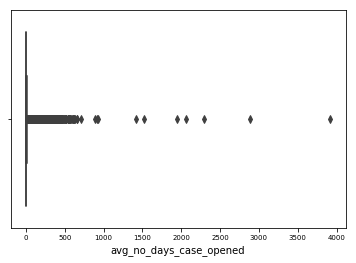

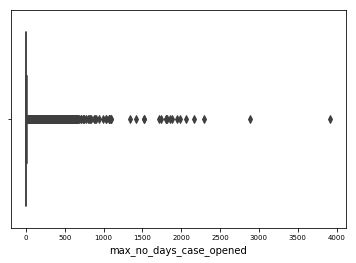

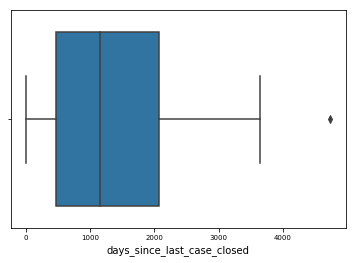

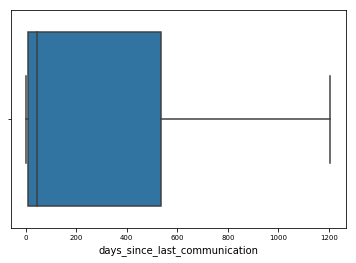

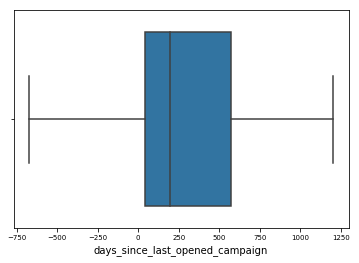

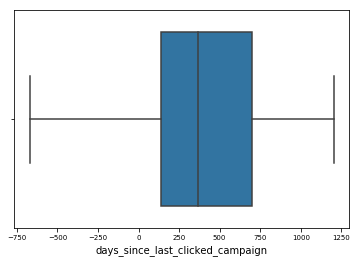

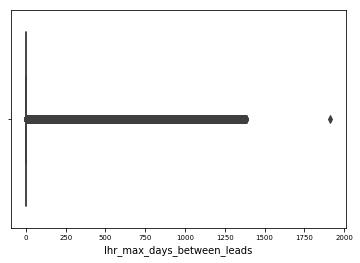

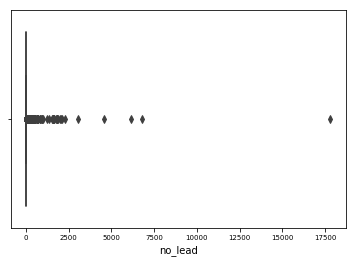

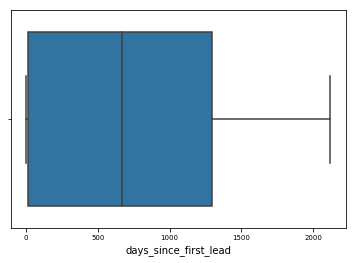

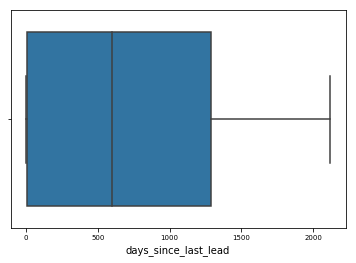

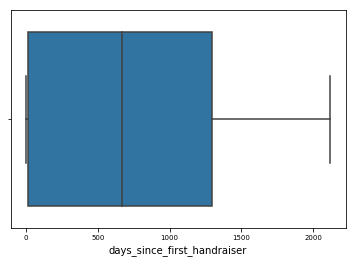

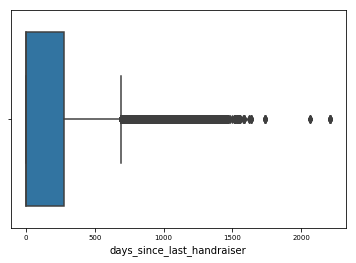

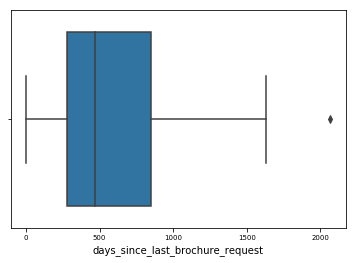

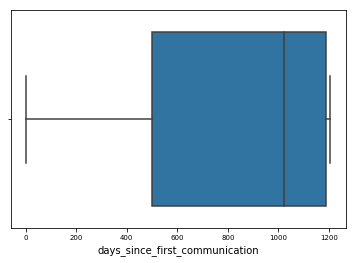

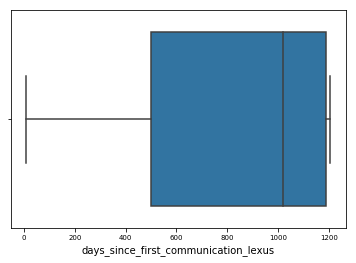

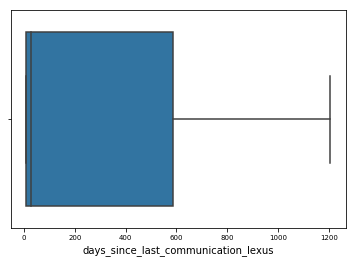

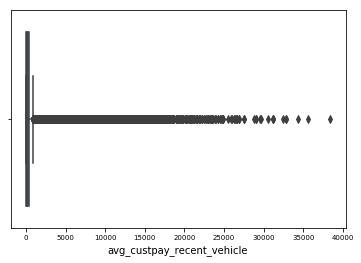

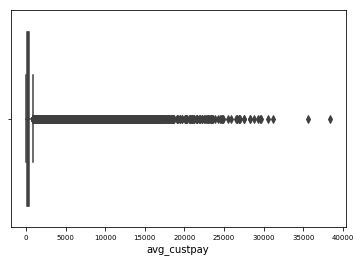

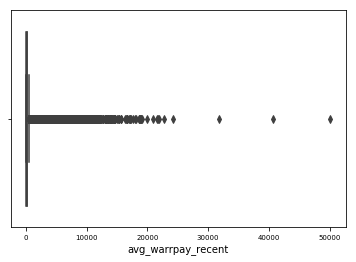

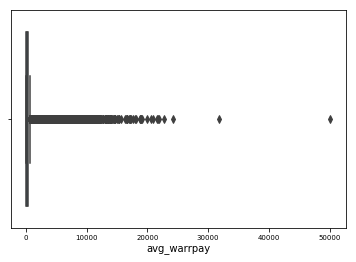

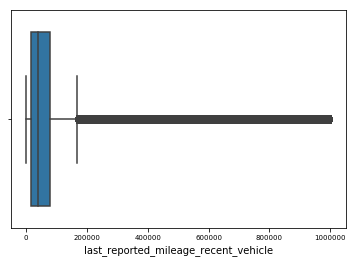

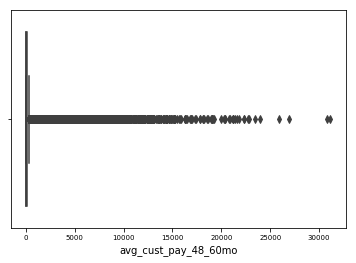

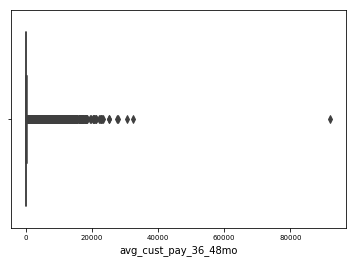

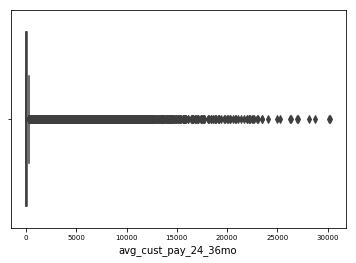

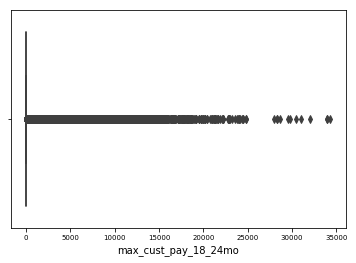

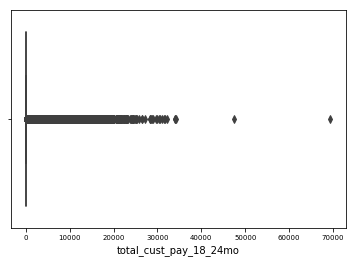

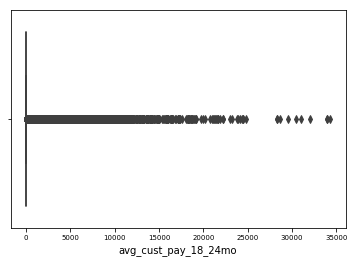

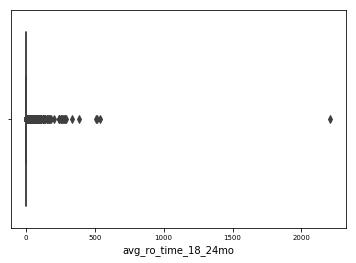

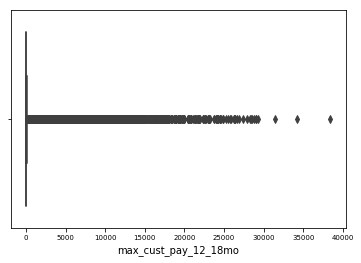

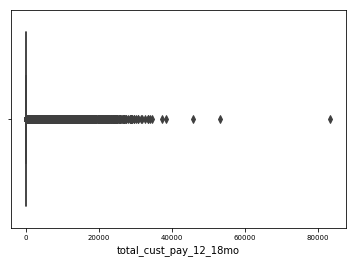

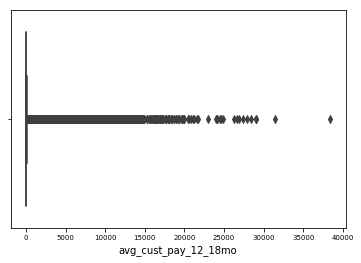

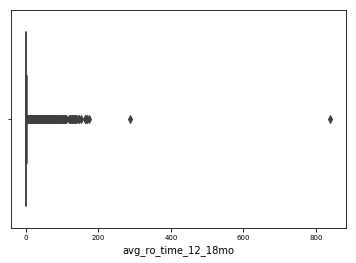

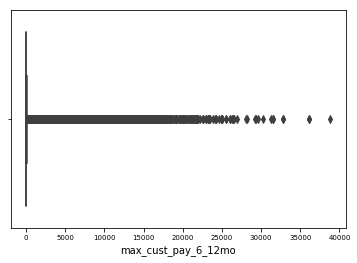

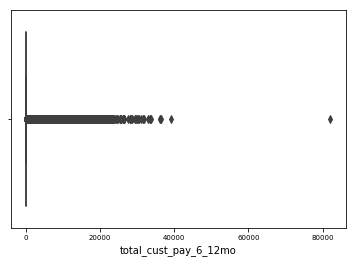

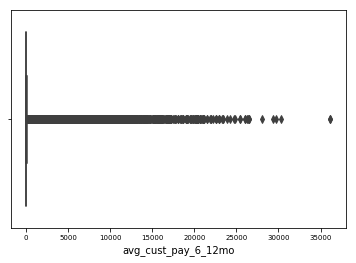

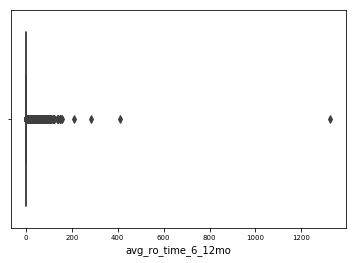

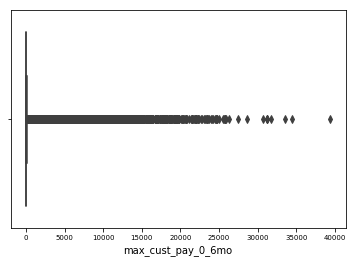

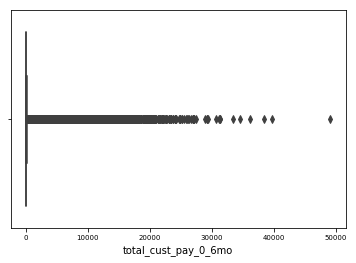

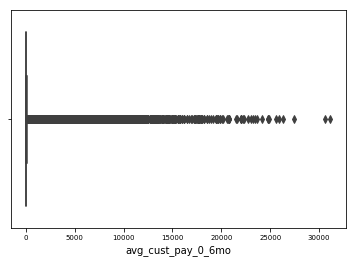

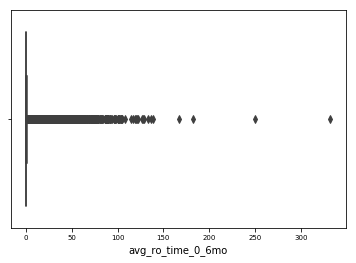

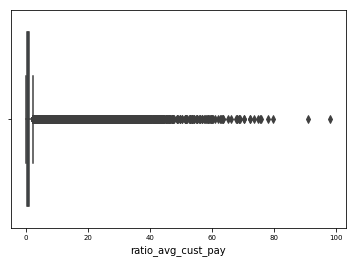

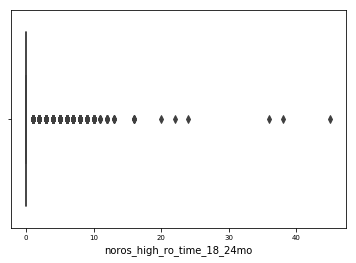

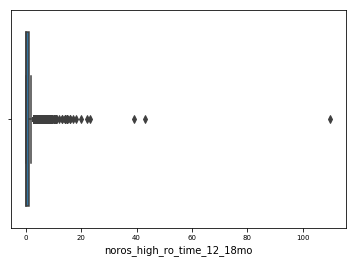

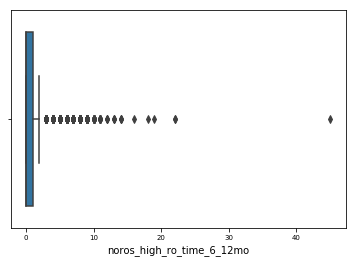

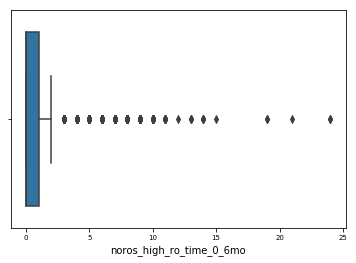

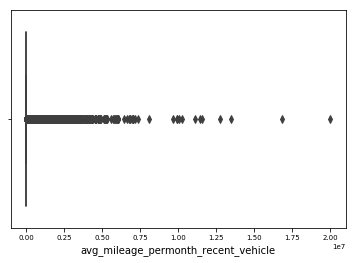

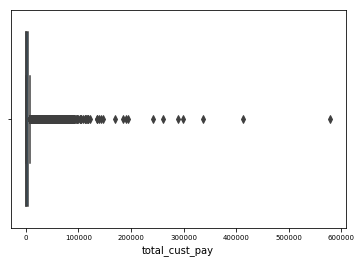

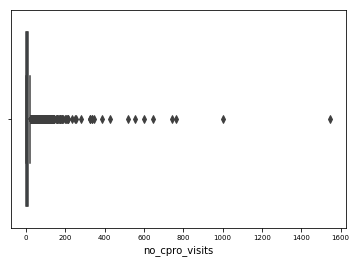

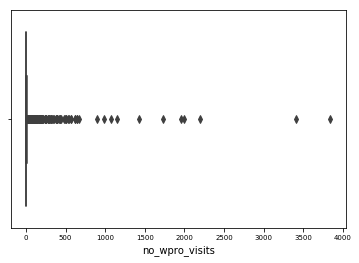

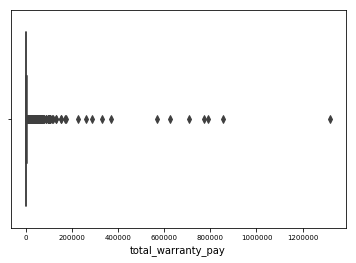

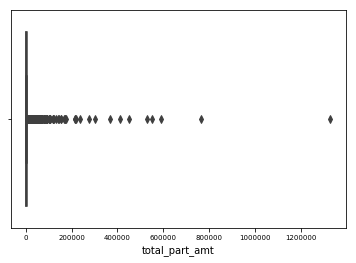

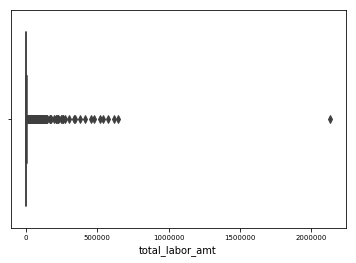

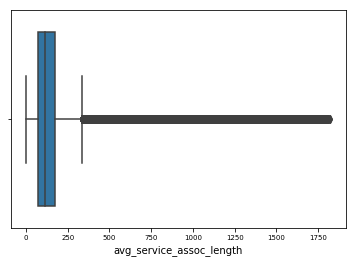

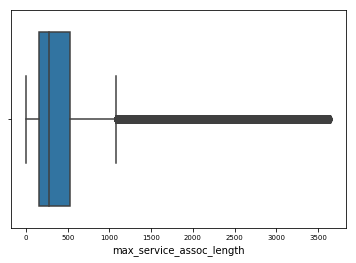

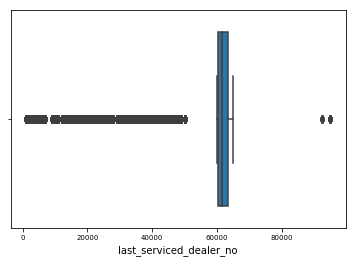

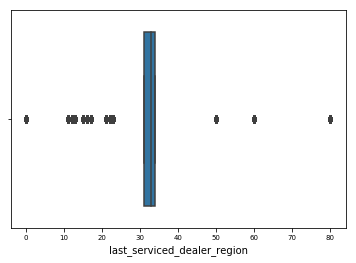

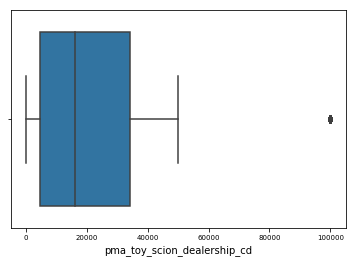

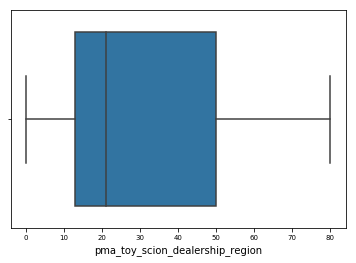

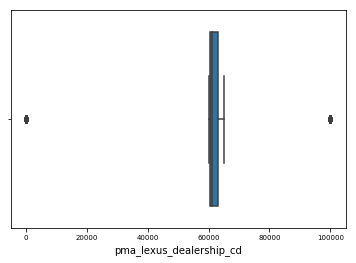

94.95682549476624


In [169]:
start= time.time()

"""
for col in X_removed_one.drop(cols,axis=1, inplace= False).select_dtypes(exclude='O'):

X_removed_one[col].plot(kind= 'box')
plt.show()
"""


#fig, ax = plt.subplots(len(num_cols), figsize=(8,40))

for col_val in num_cols:

    sns.boxplot(X_casted[col_val])#, ax=ax[i])
    #ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    #ax[i].set_xlabel(col_val, fontsize=8)

    plt.show()
            
#ax = sns.swarmplot(x="day", y="total_bill", data=tips, color=".25")
print(time.time() -start)

In [202]:
max_cust= list(X_casted.filter(regex='max_cust').columns)
avg_cust= list(X_casted.filter(regex='avg_cust').columns)
total_cust= list(X_casted.filter(regex='total_cust').columns)

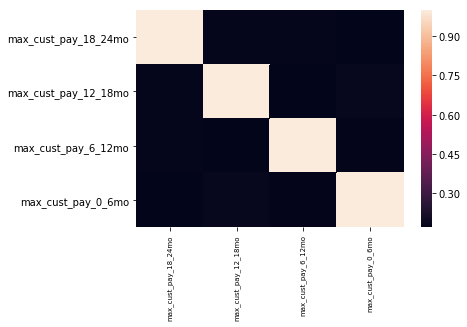

In [199]:
sns.heatmap(X_casted[max_cust].corr())

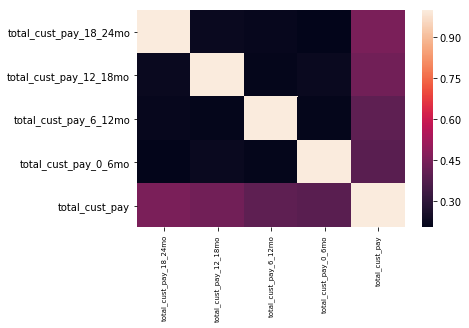

In [203]:
sns.heatmap(X_casted[total_cust].corr())

In [216]:
X_casted[total_cust].corr()

total_cust_pay_18_24mo  total_cust_pay_12_18mo  \
total_cust_pay_18_24mo                1.000000                0.225544   
total_cust_pay_12_18mo                0.225544                1.000000   
total_cust_pay_6_12mo                 0.219063                0.213270   
total_cust_pay_0_6mo                  0.203957                0.224699   
total_cust_pay                        0.449718                0.434078   

                        total_cust_pay_6_12mo  total_cust_pay_0_6mo  \
total_cust_pay_18_24mo               0.219063              0.203957   
total_cust_pay_12_18mo               0.213270              0.224699   
total_cust_pay_6_12mo                1.000000              0.213126   
total_cust_pay_0_6mo                 0.213126              1.000000   
total_cust_pay                       0.398868              0.389429   

                        total_cust_pay  
total_cust_pay_18_24mo        0.449718  
total_cust_pay_12_18mo        0.434078  
total_cust_pay_6_12mo         0.398868  
total_cust_pay_0_6mo          0.389429  
total_cust_pay                1.000000

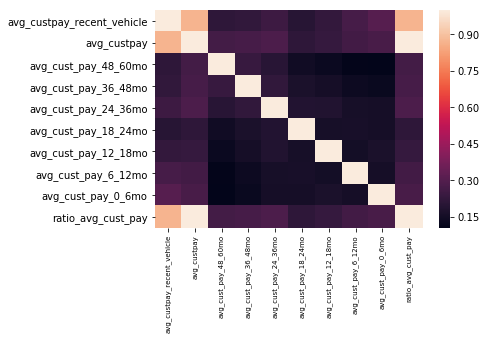

In [204]:
sns.heatmap(X_casted[avg_cust].corr())

In [205]:
X_casted[avg_cust].corr()

avg_custpay_recent_vehicle  avg_custpay  \
avg_custpay_recent_vehicle                    1.000000     0.870813   
avg_custpay                                   0.870813     1.000000   
avg_cust_pay_48_60mo                          0.214030     0.262208   
avg_cust_pay_36_48mo                          0.222342     0.269241   
avg_cust_pay_24_36mo                          0.249612     0.283172   
avg_cust_pay_18_24mo                          0.198030     0.213450   
avg_cust_pay_12_18mo                          0.225570     0.230875   
avg_cust_pay_6_12mo                           0.269864     0.261199   
avg_cust_pay_0_6mo                            0.304857     0.273224   
ratio_avg_cust_pay                            0.870813     1.000000   

                            avg_cust_pay_48_60mo  avg_cust_pay_36_48mo  \
avg_custpay_recent_vehicle              0.214030              0.222342   
avg_custpay                             0.262208              0.269241   
avg_cust_pay_48_60mo                    1.000000              0.234569   
avg_cust_pay_36_48mo                    0.234569              1.000000   
avg_cust_pay_24_36mo                    0.199858              0.220119   
avg_cust_pay_18_24mo                    0.144685              0.170909   
avg_cust_pay_12_18mo                    0.131029              0.155660   
avg_cust_pay_6_12mo                     0.111117              0.132573   
avg_cust_pay_0_6mo                      0.104511              0.126588   
ratio_avg_cust_pay                      0.262208              0.269241   

                            avg_cust_pay_24_36mo  avg_cust_pay_18_24mo  \
avg_custpay_recent_vehicle              0.249612              0.198030   
avg_custpay                             0.283172              0.213450   
avg_cust_pay_48_60mo                    0.199858              0.144685   
avg_cust_pay_36_48mo                    0.220119              0.170909   
avg_cust_pay_24_36mo                    1.000000              0.185396   
avg_cust_pay_18_24mo                    0.185396              1.000000   
avg_cust_pay_12_18mo                    0.183967              0.159056   
avg_cust_pay_6_12mo                     0.160403              0.163649   
avg_cust_pay_0_6mo                      0.155025              0.155932   
ratio_avg_cust_pay                      0.283172              0.213450   

                            avg_cust_pay_12_18mo  avg_cust_pay_6_12mo  \
avg_custpay_recent_vehicle              0.225570             0.269864   
avg_custpay                             0.230875             0.261199   
avg_cust_pay_48_60mo                    0.131029             0.111117   
avg_cust_pay_36_48mo                    0.155660             0.132573   
avg_cust_pay_24_36mo                    0.183967             0.160403   
avg_cust_pay_18_24mo                    0.159056             0.163649   
avg_cust_pay_12_18mo                    1.000000             0.153404   
avg_cust_pay_6_12mo                     0.153404             1.000000   
avg_cust_pay_0_6mo                      0.170055             0.154589   
ratio_avg_cust_pay                      0.230875             0.261199   

                            avg_cust_pay_0_6mo  ratio_avg_cust_pay  
avg_custpay_recent_vehicle            0.304857            0.870813  
avg_custpay                           0.273224            1.000000  
avg_cust_pay_48_60mo                  0.104511            0.262208  
avg_cust_pay_36_48mo                  0.126588            0.269241  
avg_cust_pay_24_36mo                  0.155025            0.283172  
avg_cust_pay_18_24mo                  0.155932            0.213450  
avg_cust_pay_12_18mo                  0.170055            0.230875  
avg_cust_pay_6_12mo                   0.154589            0.261199  
avg_cust_pay_0_6mo                    1.000000            0.273224  
ratio_avg_cust_pay                    0.273224            1.000000

In [207]:
# ratio_avg_cust_pay correlated to avg_custpay and avg_custpay_recent_vehicle hence keeping only ratio_avg_cust_pay
X_casted.drop(['avg_custpay', 'avg_custpay_recent_vehicle'],axis=1, inplace= True)

### Remove columns with less than 80%data

In [47]:
start= time.time()
rows=X_casted.shape[0]
thresh= np.round((rows*80)/100)
X_casted.dropna(axis=1, thresh=thresh, inplace=True)  # Time Taken is 137 s
print(time.time() - start)

137.07105827331543


In [50]:
X_casted.shape

(4742446, 216)

In [51]:
gc.collect()

913

In [184]:
X_casted.shape

(4742446, 423)

In [59]:
num_cols= X_casted.select_dtypes(exclude='O').columns.tolist()

In [60]:
num_cols

['avg_zip3_vehicle_val',
 'max_value_vehicles_per_hh',
 'length_of_residence',
 'pma_toy_scion_dealership_cd',
 'pma_toy_scion_dealership_region',
 'pma_lexus_dealership_cd']

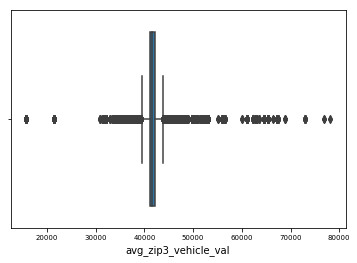

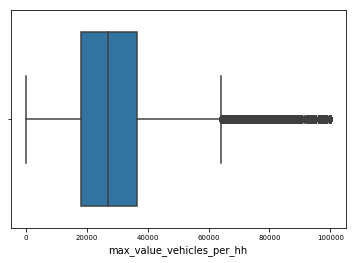

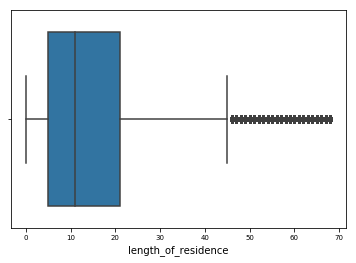

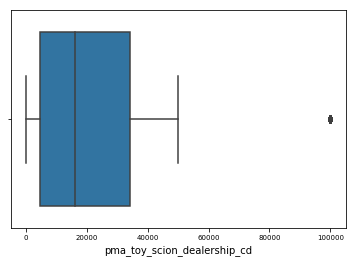

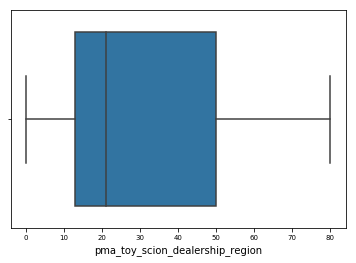

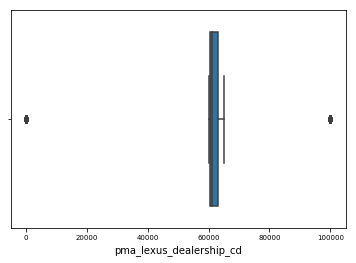

5.402909517288208


In [61]:
start= time.time()

"""
for col in X_removed_one.drop(cols,axis=1, inplace= False).select_dtypes(exclude='O'):

X_removed_one[col].plot(kind= 'box')
plt.show()
"""


#fig, ax = plt.subplots(len(num_cols), figsize=(8,40))

for col_val in num_cols:

    sns.boxplot(X_casted[col_val])#, ax=ax[i])
    #ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    #ax[i].set_xlabel(col_val, fontsize=8)

    plt.show()
            
#ax = sns.swarmplot(x="day", y="total_bill", data=tips, color=".25")
print(time.time() -start)

In [ ]:
sns.countplot(x=col, hue=target, data=df)
plt.xticks(rotation=45)
#i+=1
plt.show()

In [ ]:
gc.collect()

In [62]:
X_casted.filter(regex='age').columns.tolist()

['ethnicity_language_pref',
 'aged_parent_in_hh',
 'mortage_amt_ranges_cd',
 'customer_language_english_ind',
 'customer_language_spanish_ind']

In [64]:
X_casted.select_dtypes(exclude='O').isnull().sum()

avg_zip3_vehicle_val                20653
max_value_vehicles_per_hh          108309
length_of_residence                 71786
pma_toy_scion_dealership_cd         52682
pma_toy_scion_dealership_region         0
pma_lexus_dealership_cd             53205
dtype: int64

In [70]:
num_cols= X_casted.select_dtypes(exclude='O').columns.tolist()
cat_cols= X_casted.select_dtypes(include='O').columns.tolist()

In [72]:
X_casted.to_pickle(mlresult_dir + str(project_identifier) + '_' + str(datetime.datetime.now().day)+ 'X_cols_with_morethan_80perct.pkl')

In [73]:
X_cat_cols_before_encoding= X_casted.select_dtypes(include="O").copy()

In [74]:
X_cat_cols_before_encoding.to_pickle(mlresult_dir + str(project_identifier) + '_' + str(datetime.datetime.now().day)+ 'X_cat_cols_before_encoding.pkl')

In [76]:
cat_cols

['no_owned_vehicle',
 'no_new_purchase_vehicle',
 'no_used_purchase_vehicle',
 'no_cpo_purchase_vehicle',
 'state_residence',
 'owned_lexus_sedan_ind',
 'owned_lexus_LUV_ind',
 'owned_lexus_new_luv_ind',
 'owned_lexus_cpo_luv_ind',
 'owned_lexus_new_sedan_ind',
 'owned_lexus_cpo_sedan_ind',
 'owned_lexus_ind',
 'owned_corolla_ind',
 'owned_rav4_ind',
 'owned_prius_ind',
 'owned_suv_ind',
 'owned_hybrid_ind',
 'owned_big_engine_vehicle_ind',
 'owned_4wd_vehicle_ind',
 'multiple_vehicle_type_ind',
 'owned_lexus_sedan_no',
 'owned_lexus_LUV_no',
 'owned_is250_ind',
 'owned_is350_ind',
 'owned_is_ind',
 'owned_es_ind',
 'owned_rx_ind',
 'owned_ls_ind',
 'owned_gs_ind',
 'owned_highlander_ind',
 'owned_hs250h_ind',
 'owned_ct200h_ind',
 'owned_white_vehicle_ind',
 'owned_black_vehicle_ind',
 'owned_silver_gray_vehicle_ind',
 'owned_gold_brown_orange_vehicle_ind',
 'owned_yellow_vehicle_ind',
 'owned_green_vehicle_ind',
 'owned_aqua_vehicle_ind',
 'owned_blue_vehicle_ind',
 'owned_purple_veh

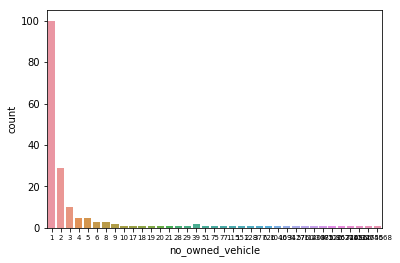

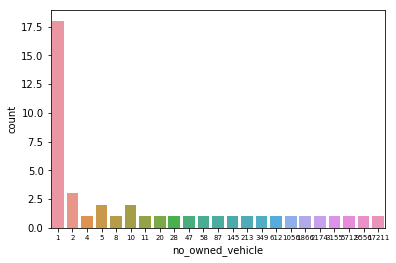

In [78]:
sns.countplot(X_casted['no_owned_vehicle'][y==0].value_counts())
plt.show()
sns.countplot(X_casted['no_owned_vehicle'][y==1].value_counts())
plt.show()


/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



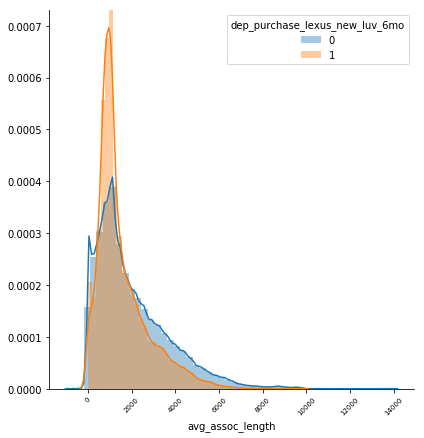

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



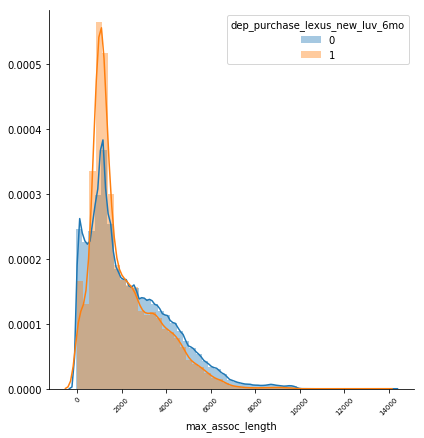

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



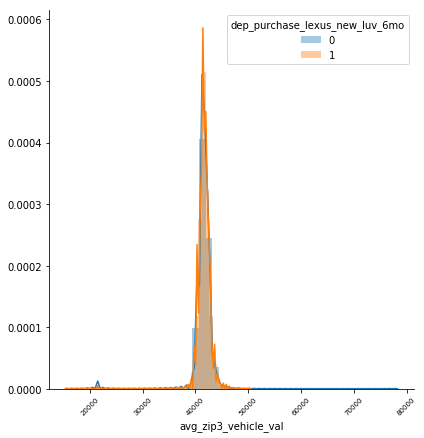

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



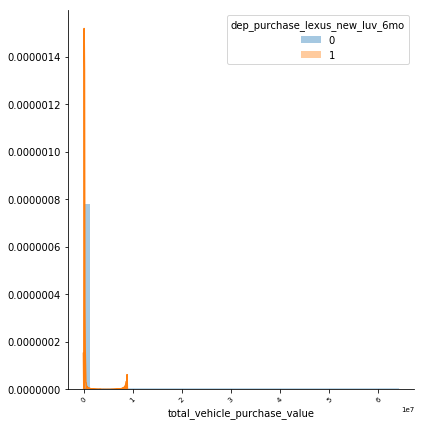

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



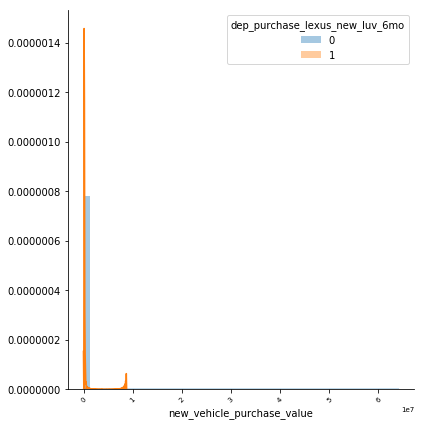

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



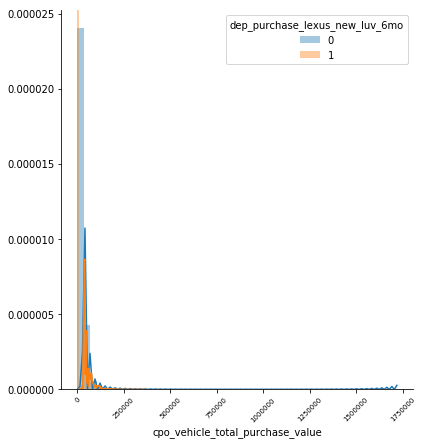

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



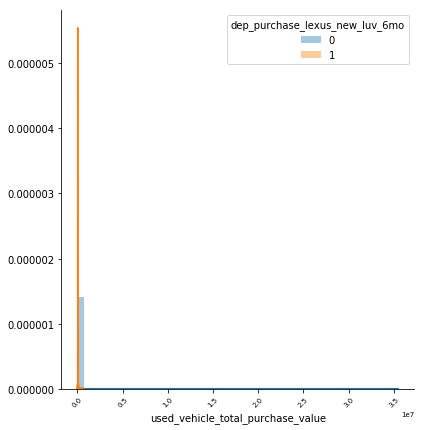

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



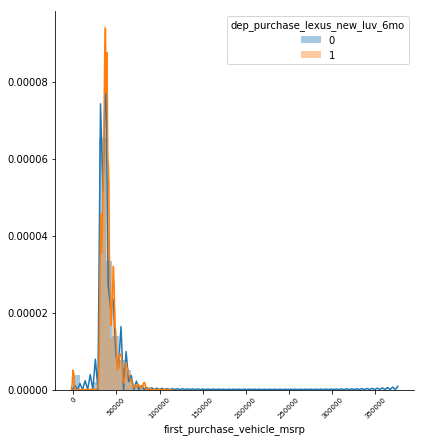

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



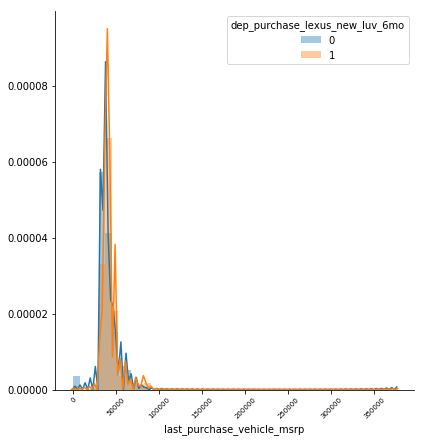

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



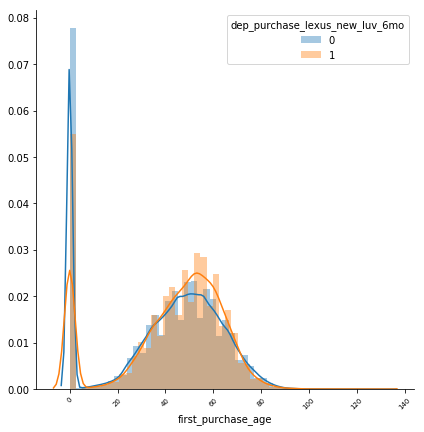

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



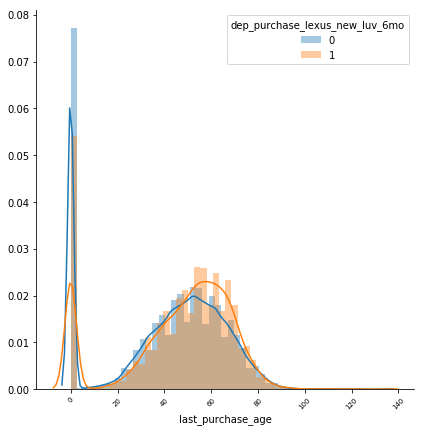

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



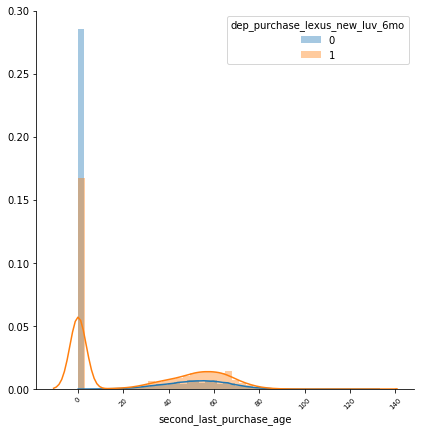

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



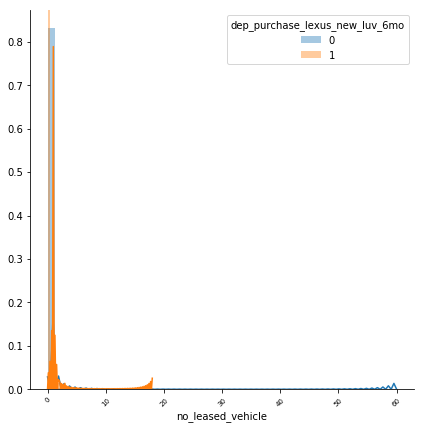

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



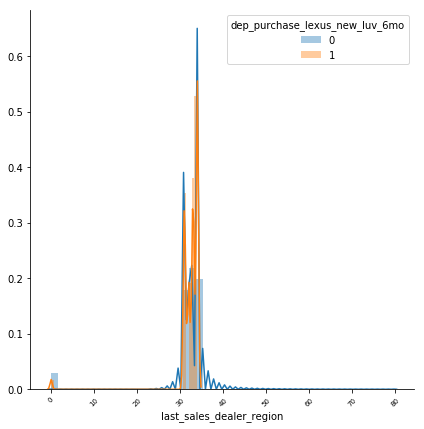

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



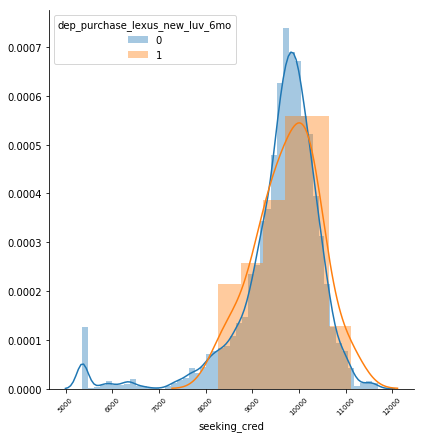

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



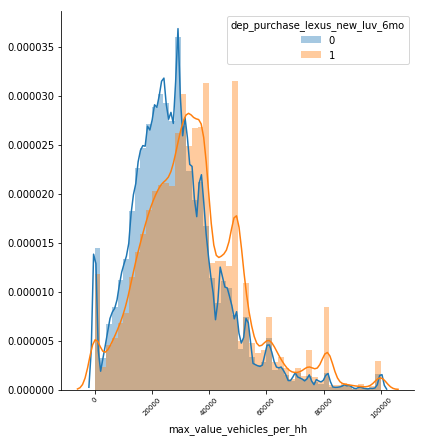

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



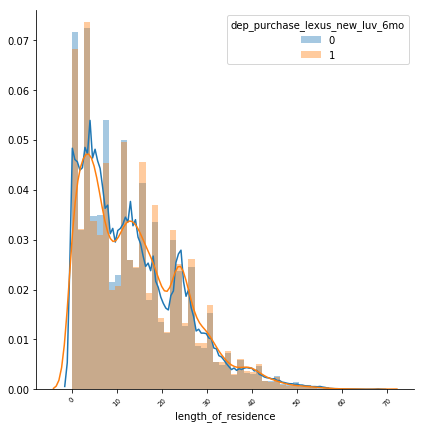

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



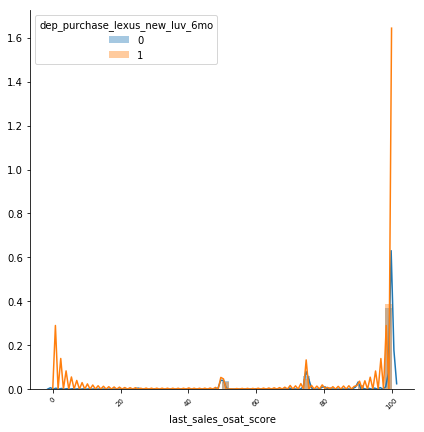

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



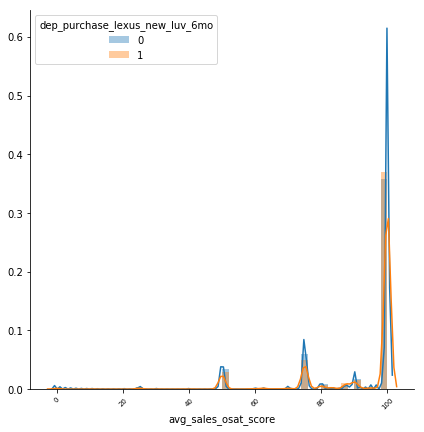

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



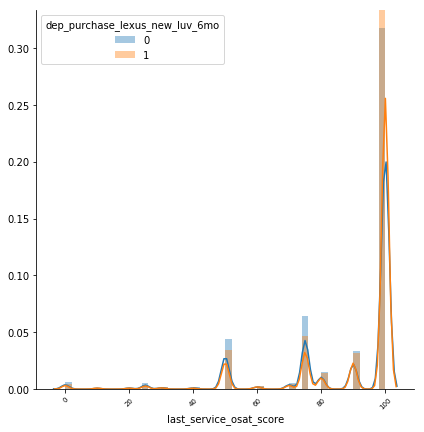

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



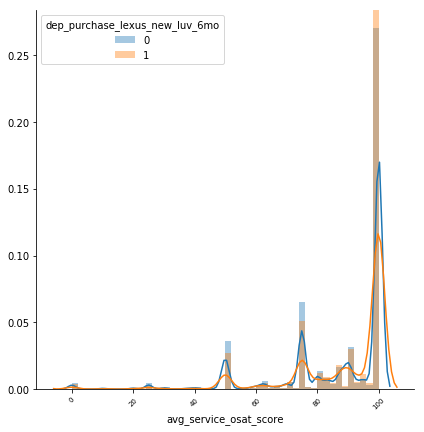

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



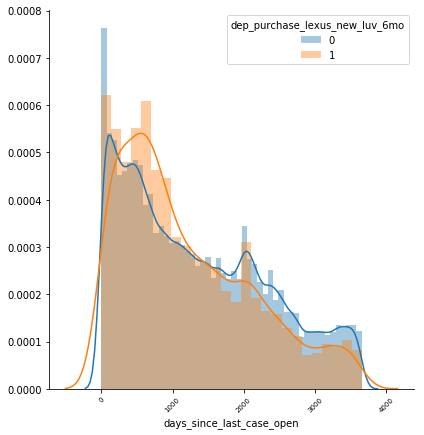

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



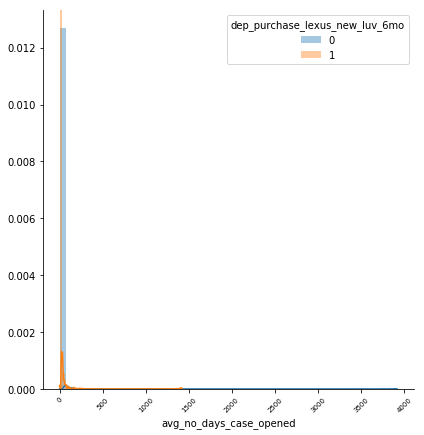

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



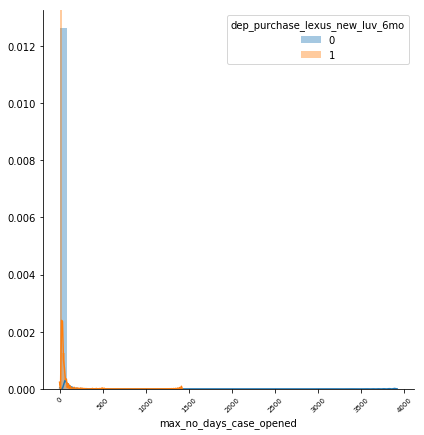

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



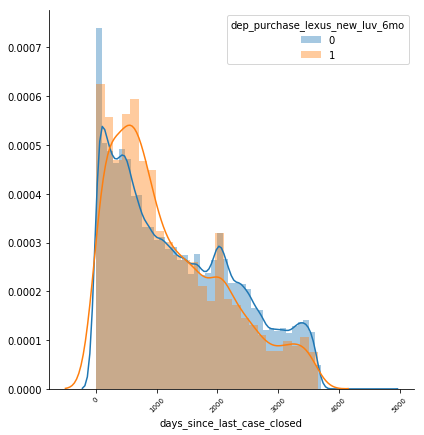

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



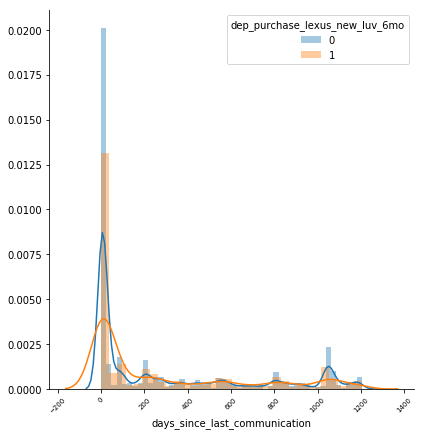

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



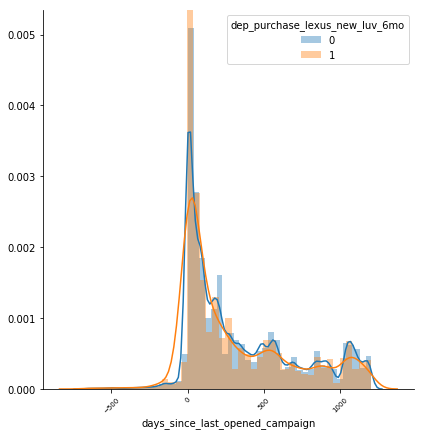

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



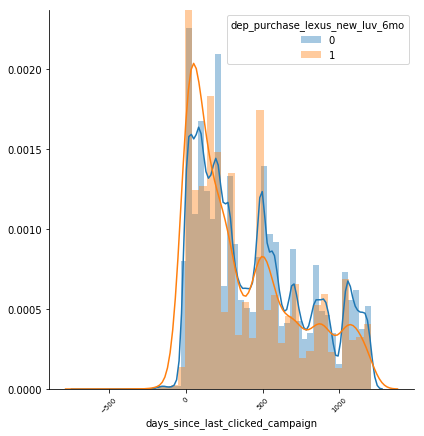

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



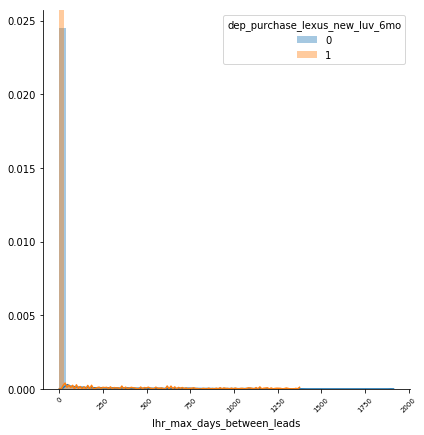

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



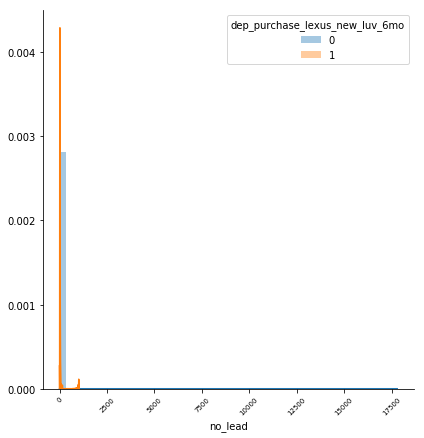

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



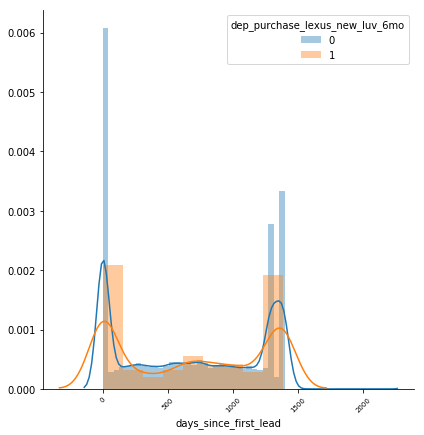

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



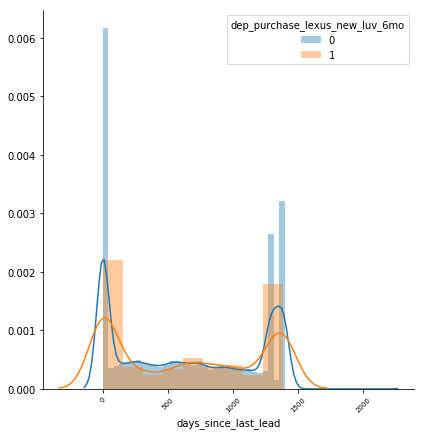

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



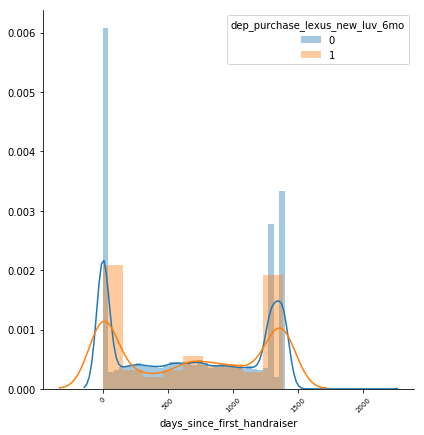

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



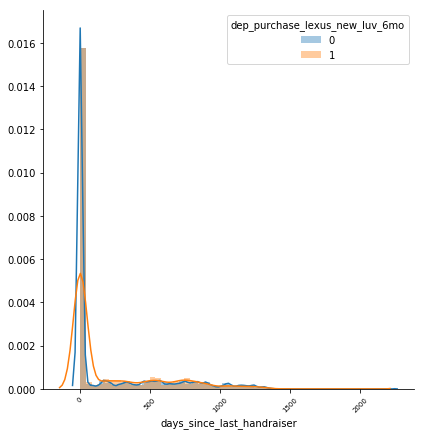

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



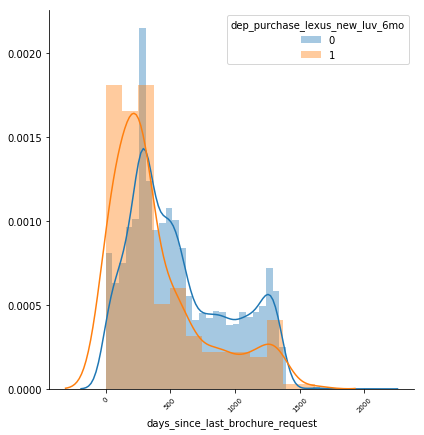

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



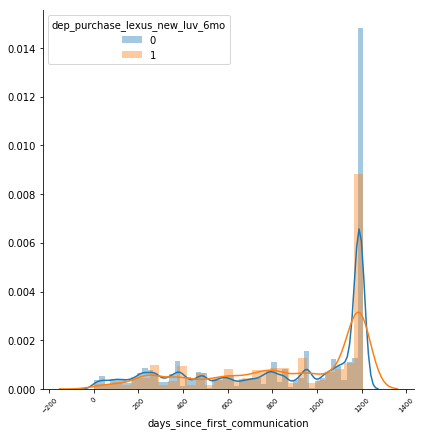

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



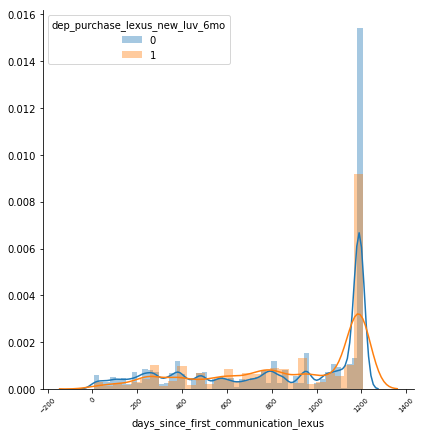

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



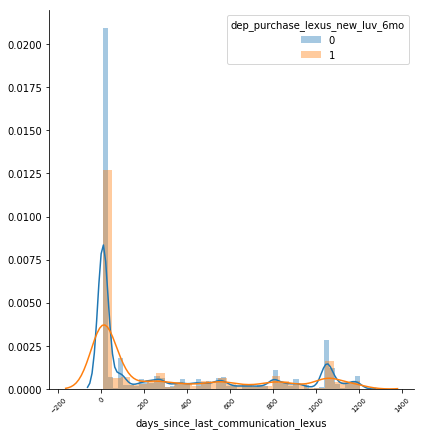

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



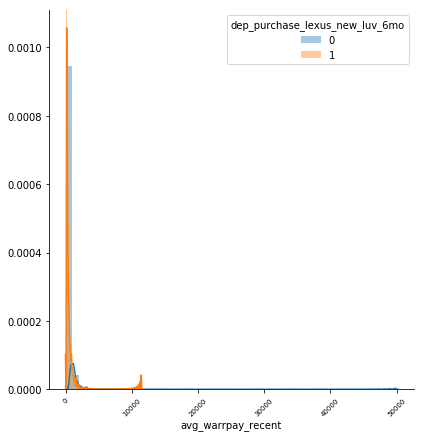

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



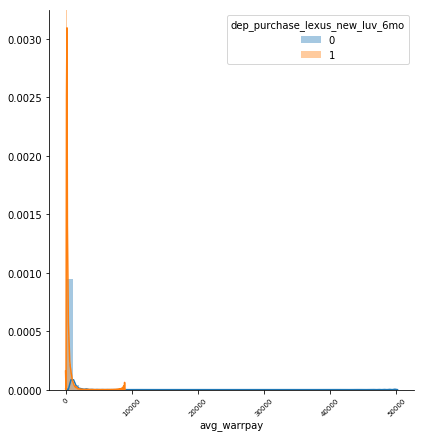

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



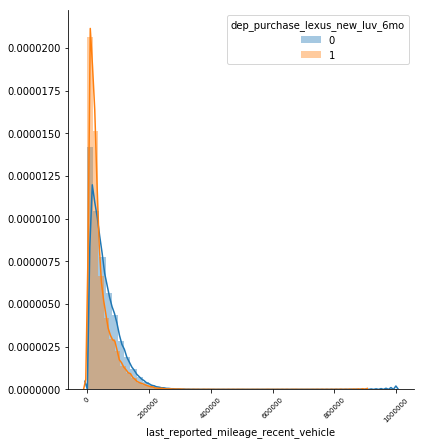

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



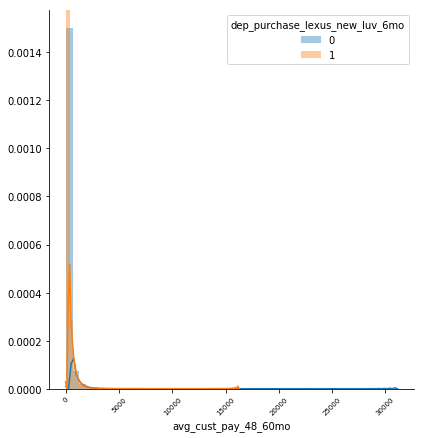

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



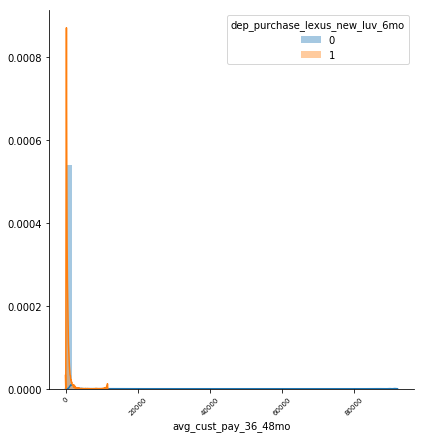

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



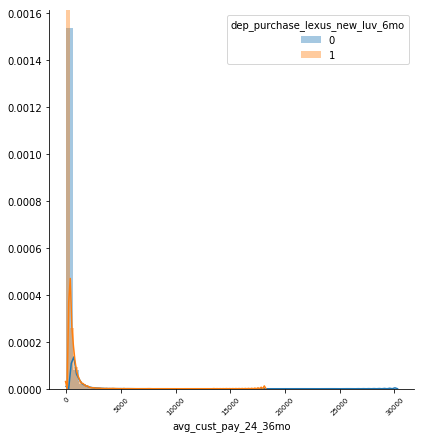

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



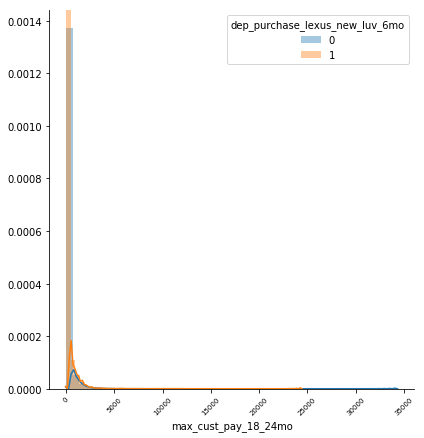

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



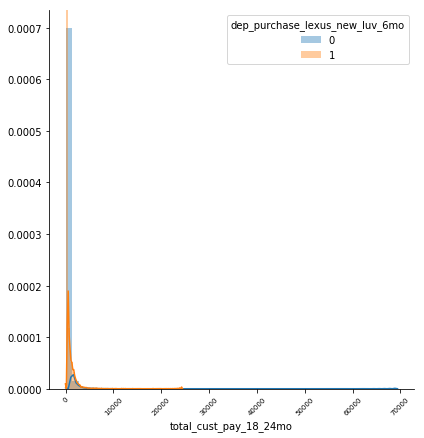

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



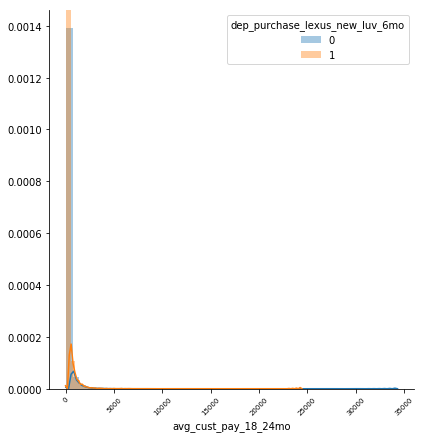

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



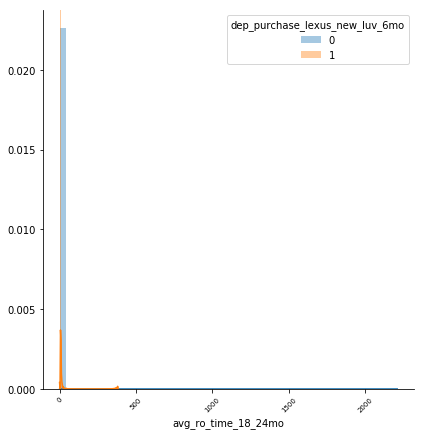

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



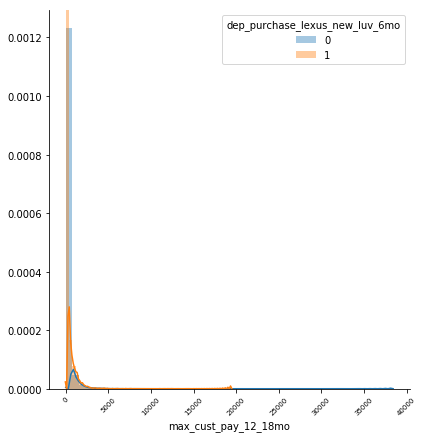

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



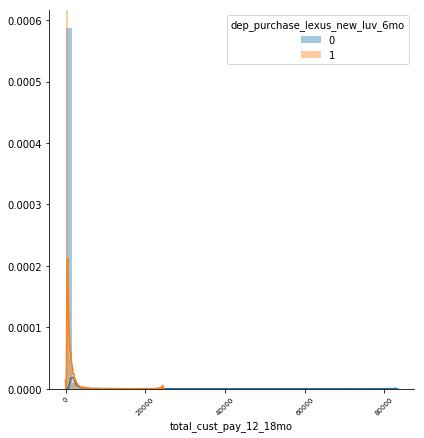

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



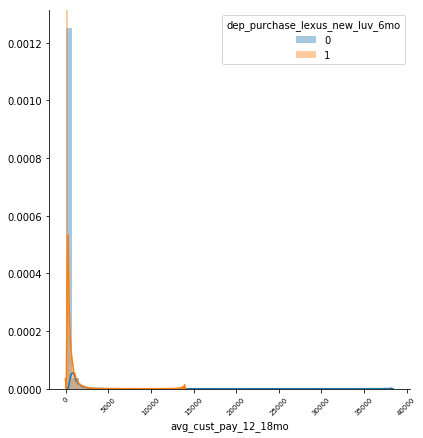

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



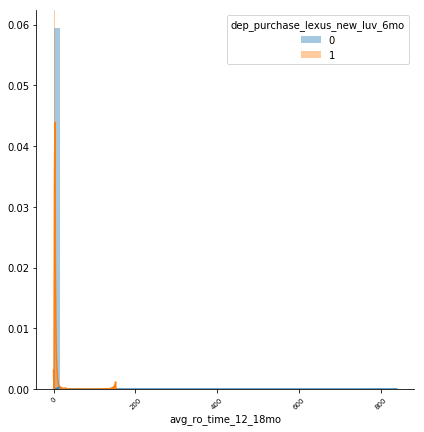

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



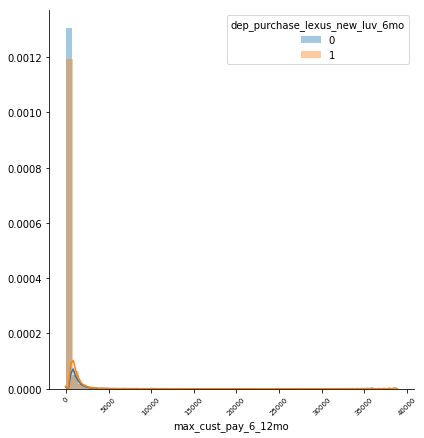

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



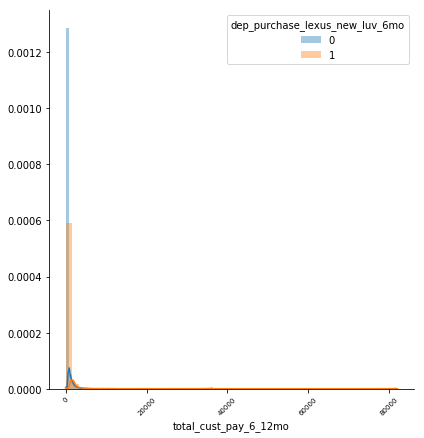

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



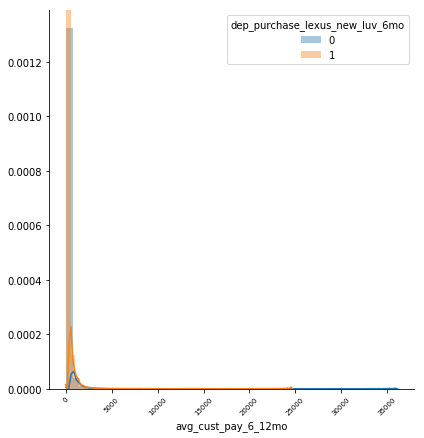

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



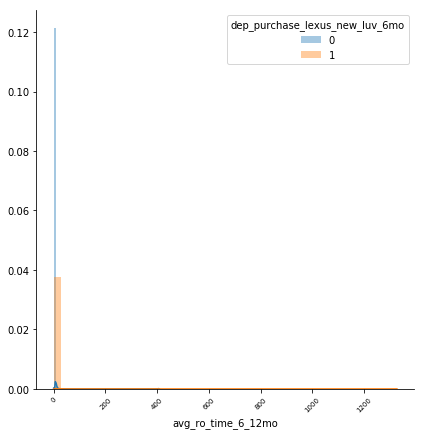

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



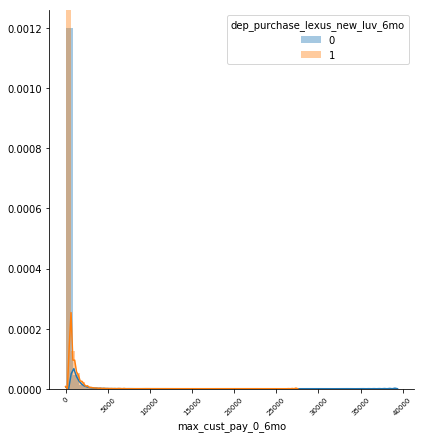

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



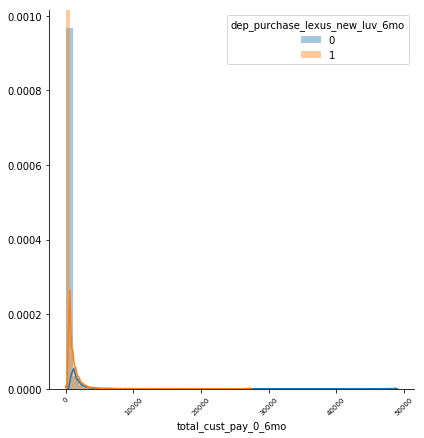

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



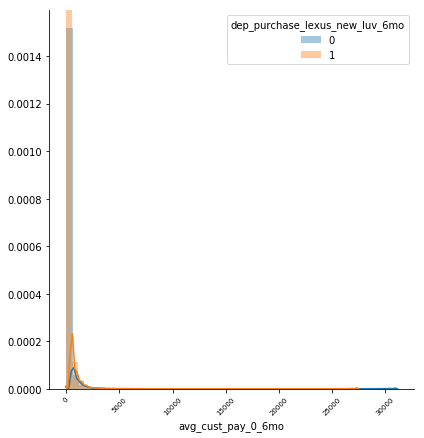

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



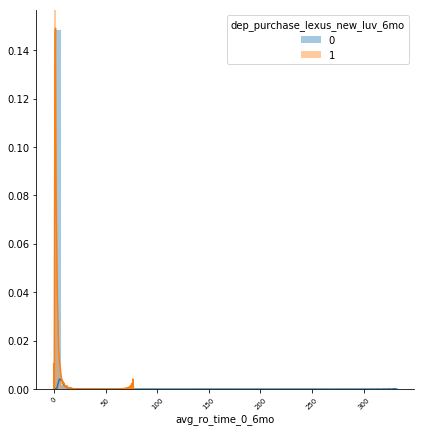

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



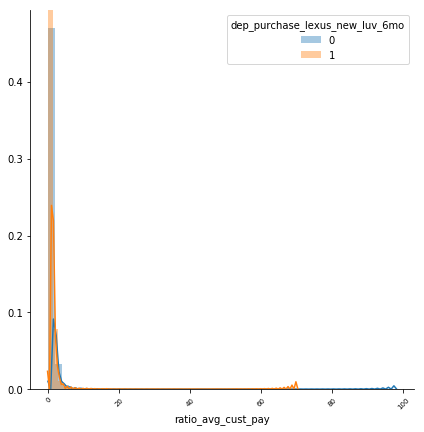

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



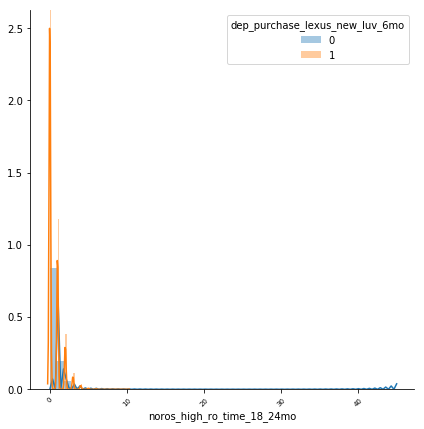

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



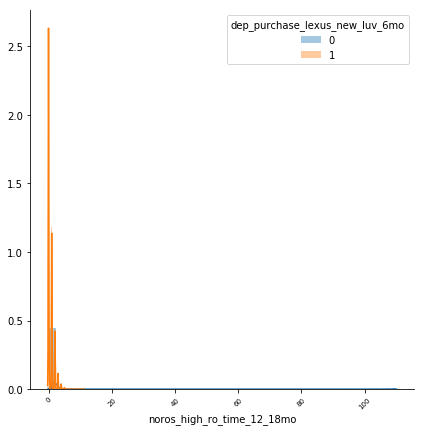

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



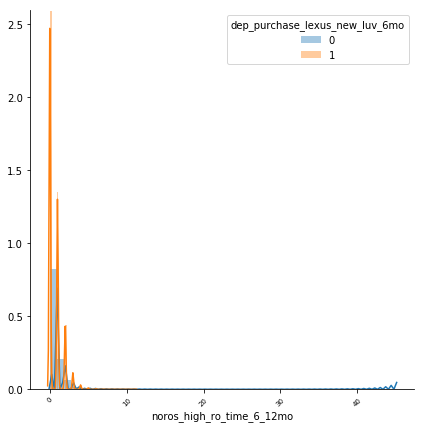

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



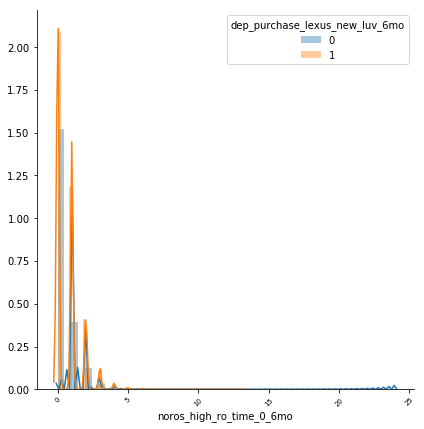

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



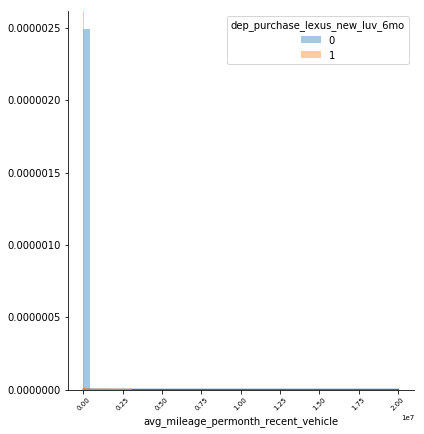

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



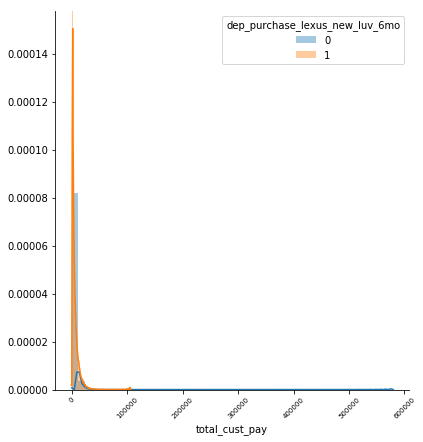

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



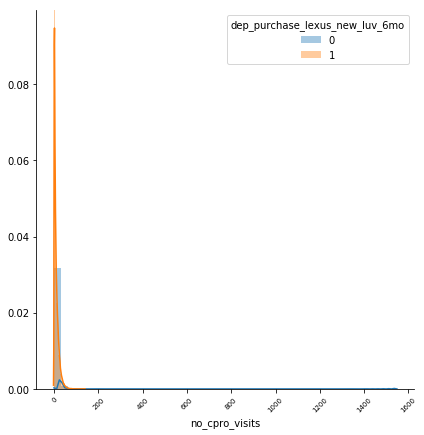

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



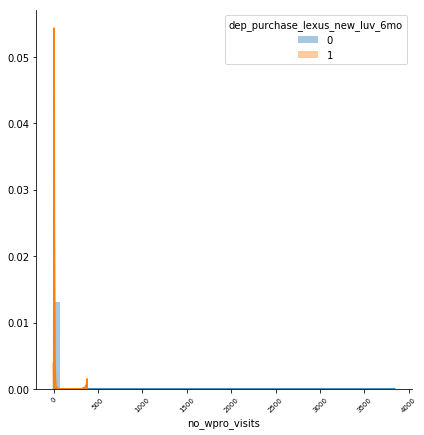

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



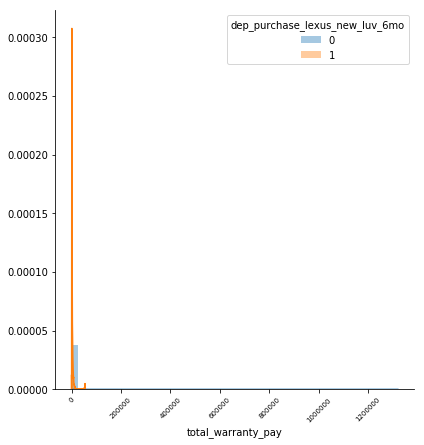

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



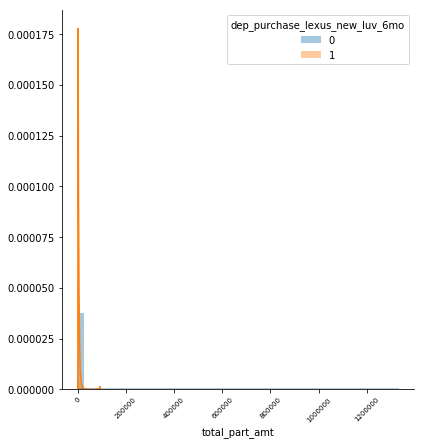

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



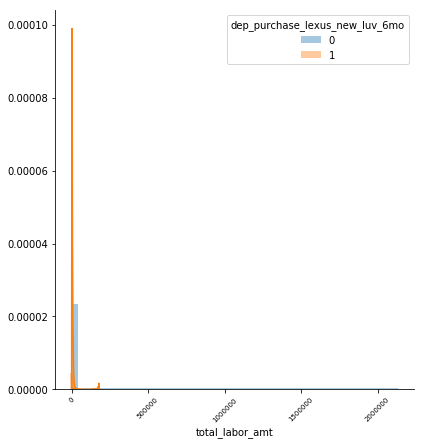

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



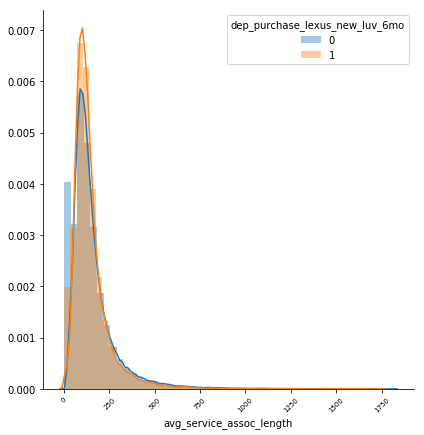

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



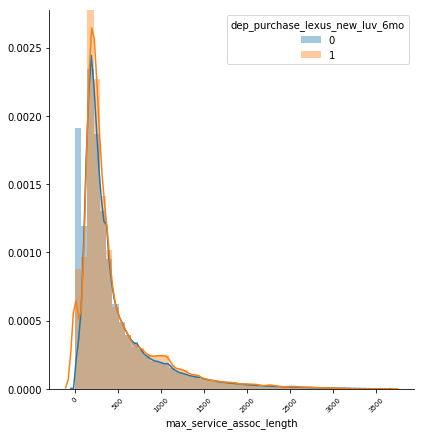

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



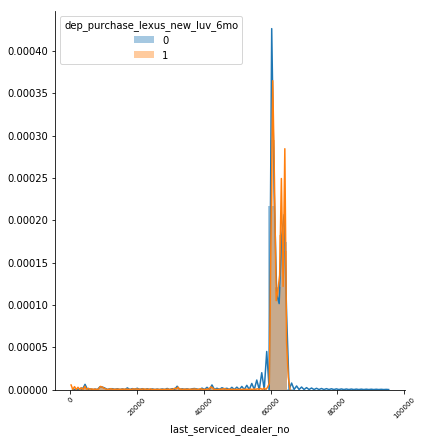

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



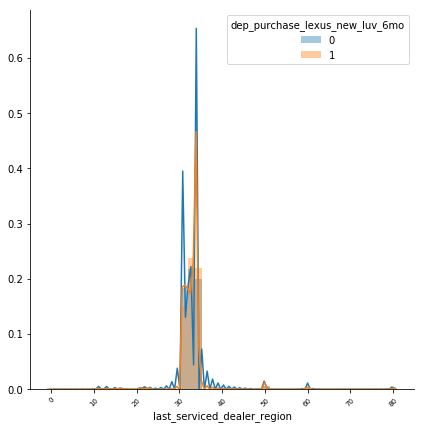

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



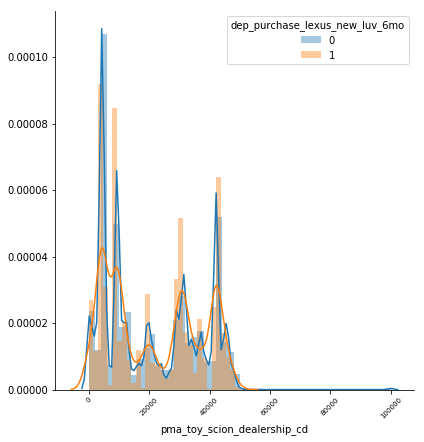

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



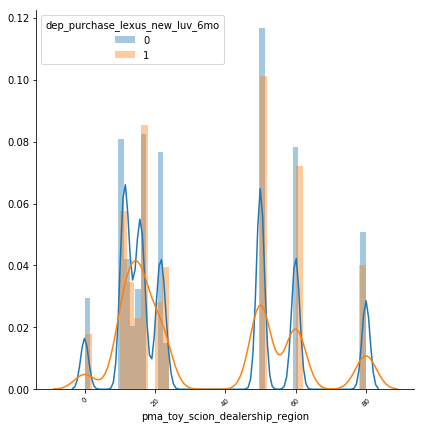

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



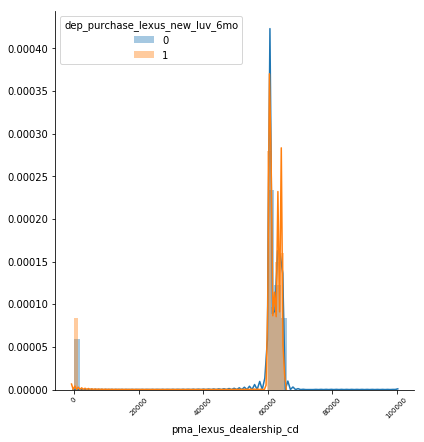

In [217]:
plot_dist_on_all_num(pd.concat([X_casted.select_dtypes(exclude='O'), y], axis=1), y.name, X_casted.select_dtypes(exclude='O').columns.tolist())

In [79]:
X_casted['no_owned_vehicle']= np.where(X_casted['no_owned_vehicle']==0,0, (np.where(X_casted['no_owned_vehicle']==1,1, (np.where(X_casted['no_owned_vehicle']==2,2, (np.where(X_casted['no_owned_vehicle']==3,3, np.where(X_casted['no_owned_vehicle']==5,5,'6+'))))))))

In [84]:
X_casted['no_owned_vehicle'].value_counts()

1     2491779
0     1034830
2      734422
3      268177
6+     162852
5       50386
Name: no_owned_vehicle, dtype: int64

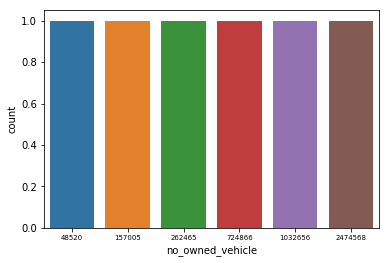

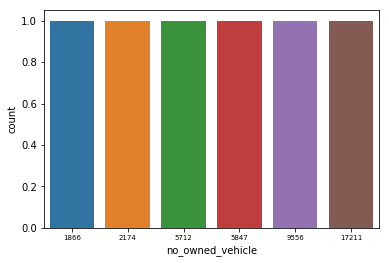

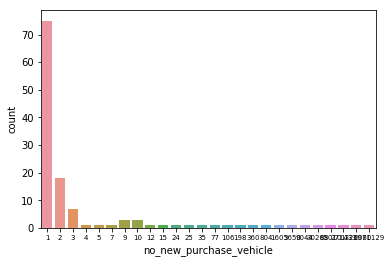

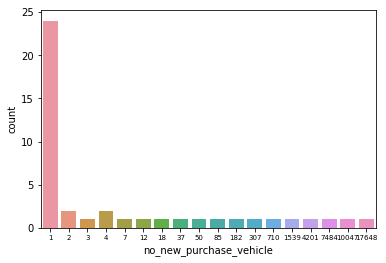

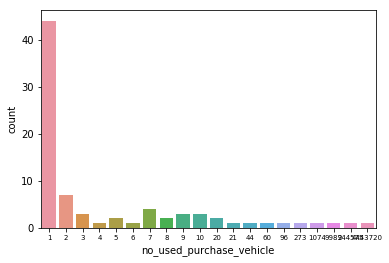

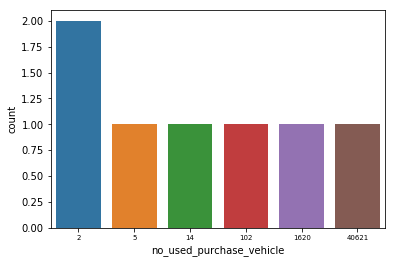

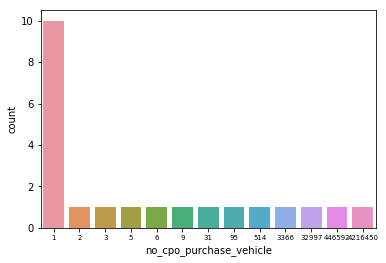

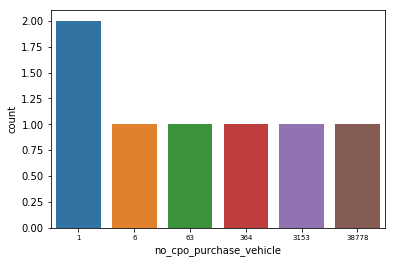

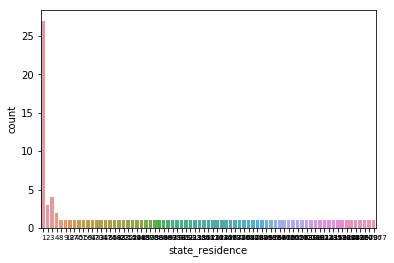

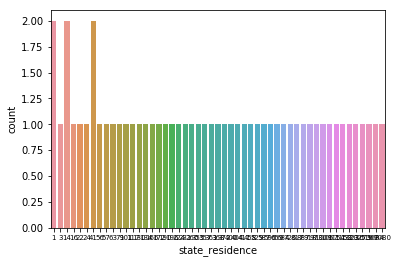

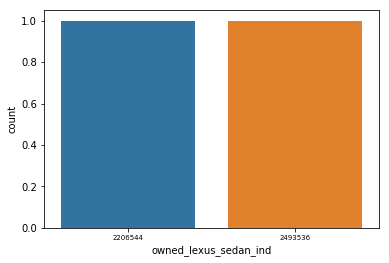

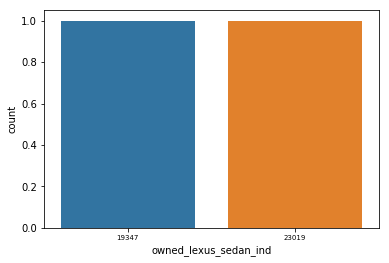

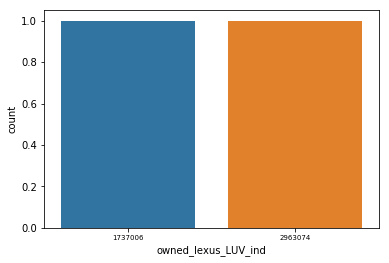

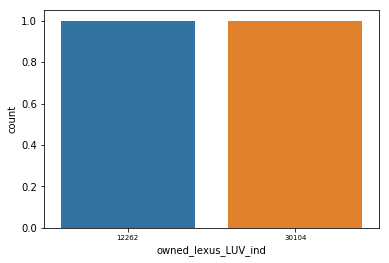

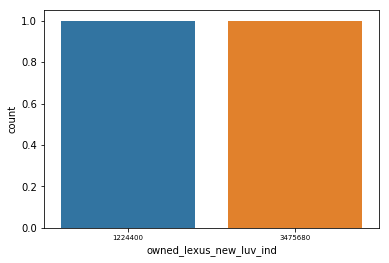

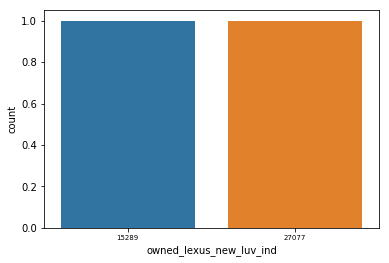

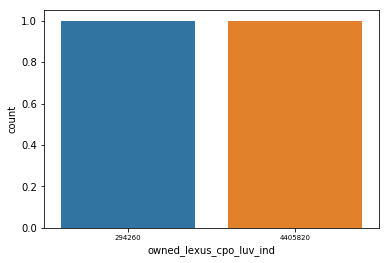

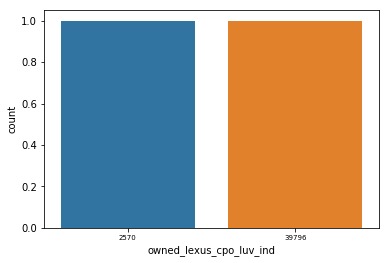

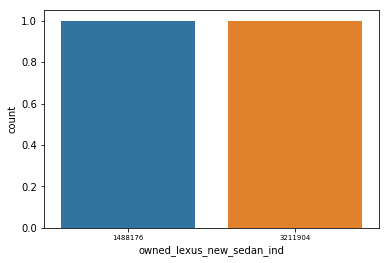

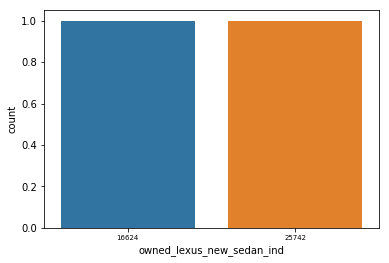

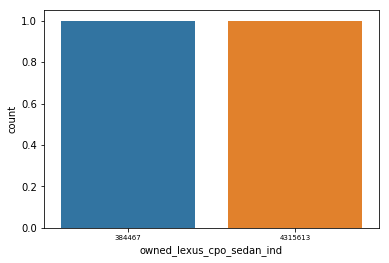

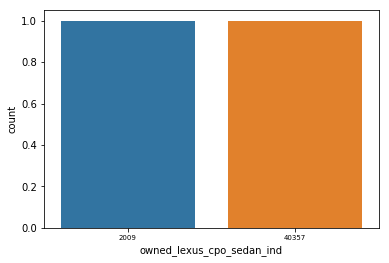

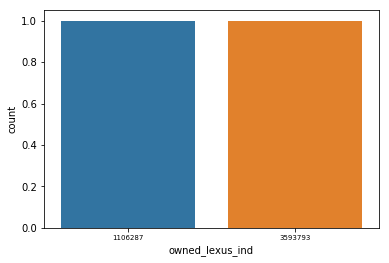

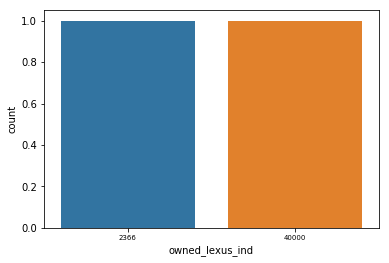

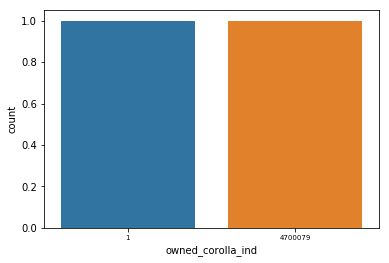

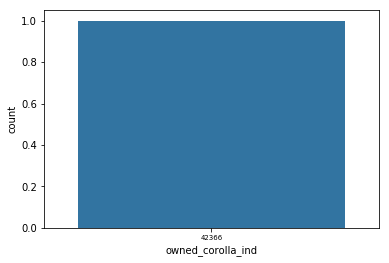

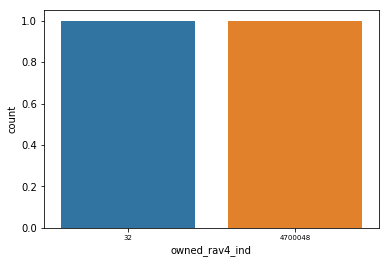

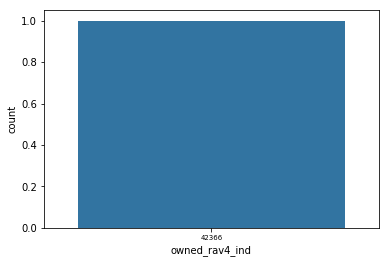

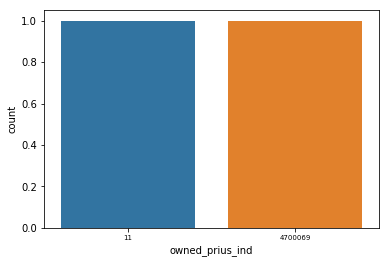

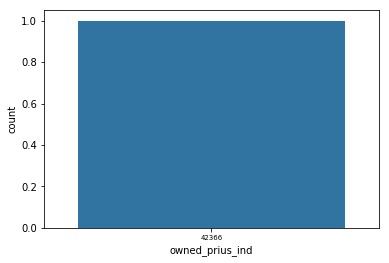

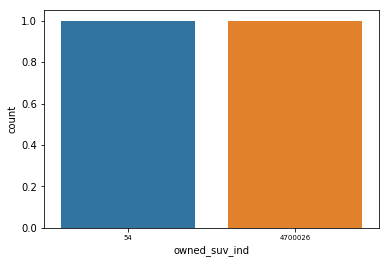

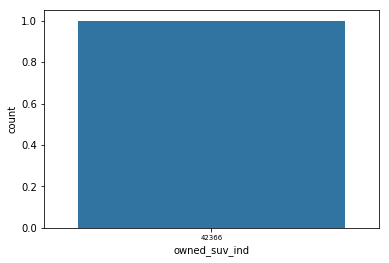

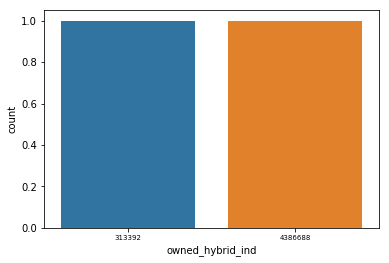

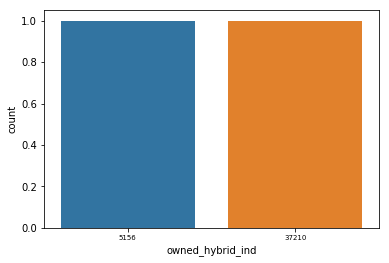

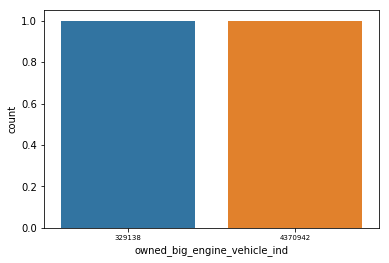

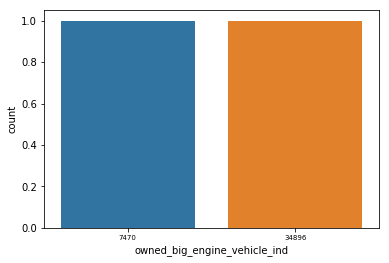

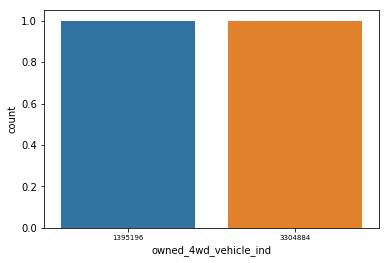

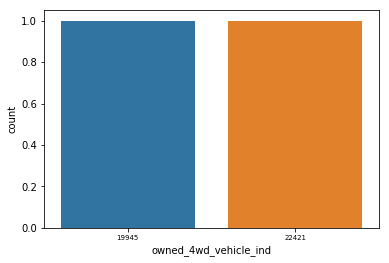

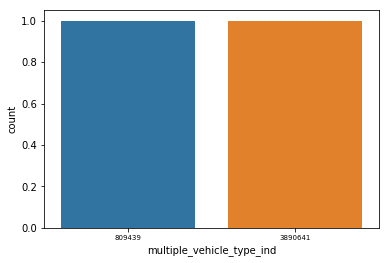

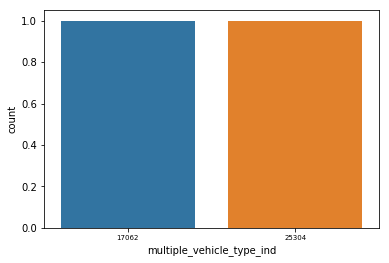

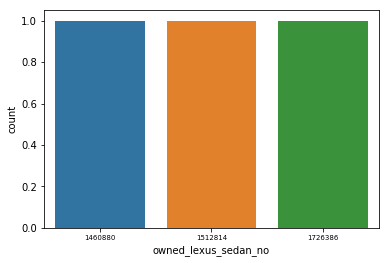

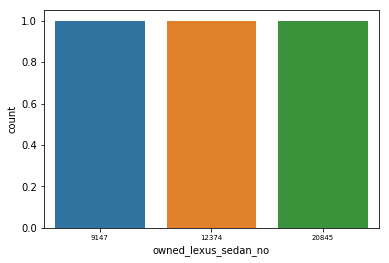

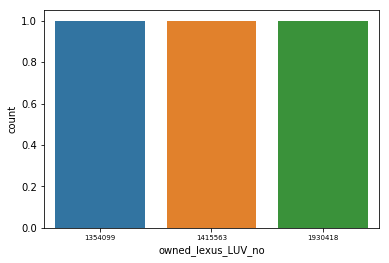

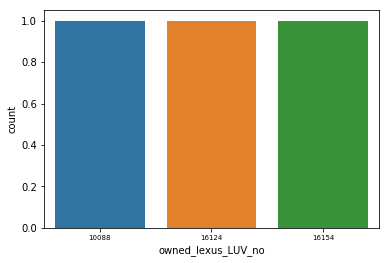

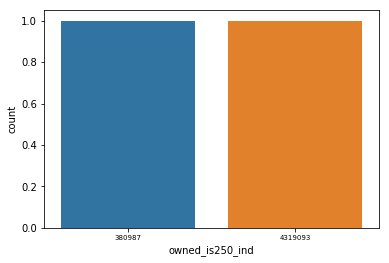

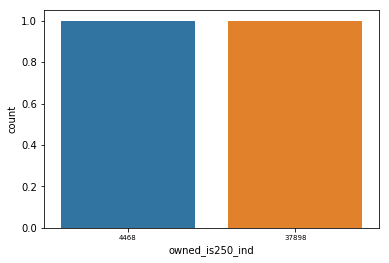

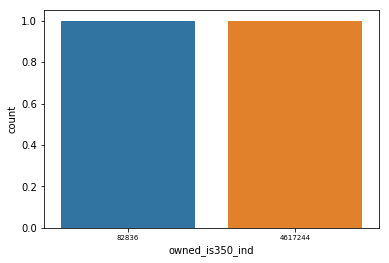

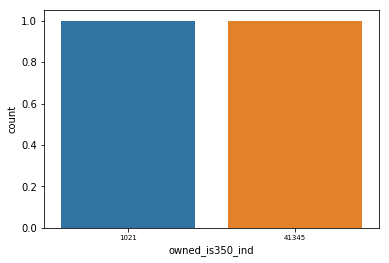

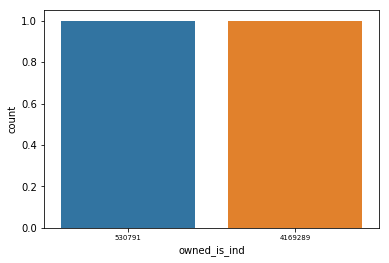

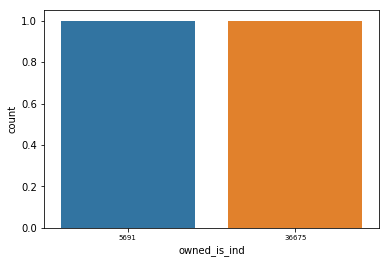

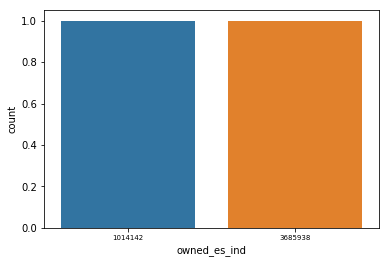

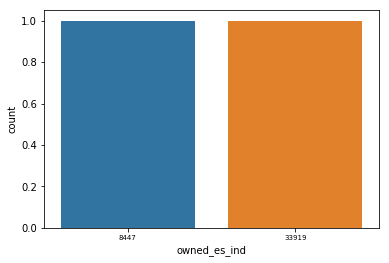

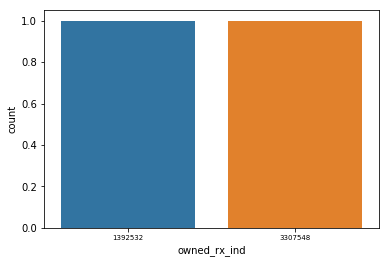

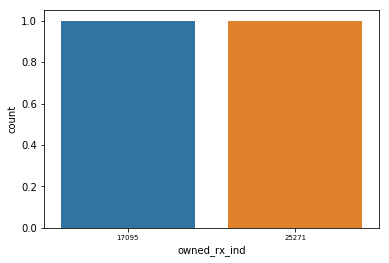

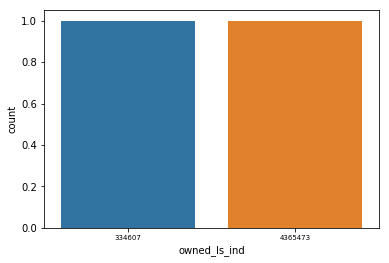

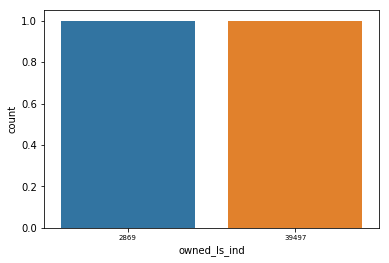

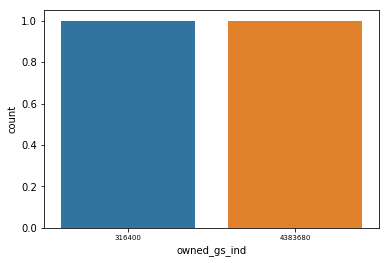

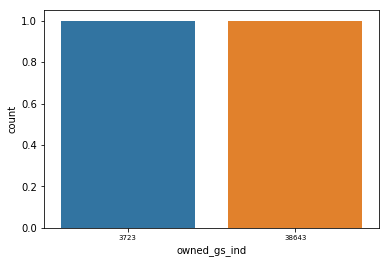

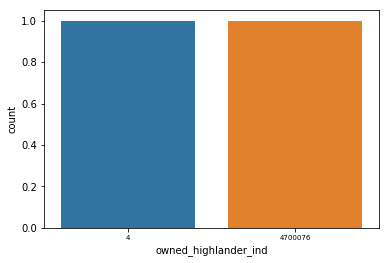

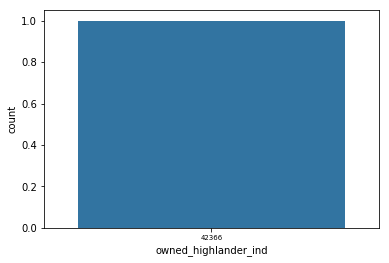

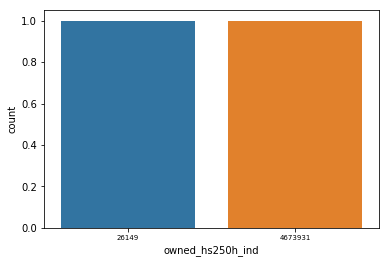

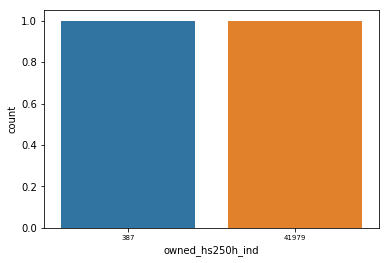

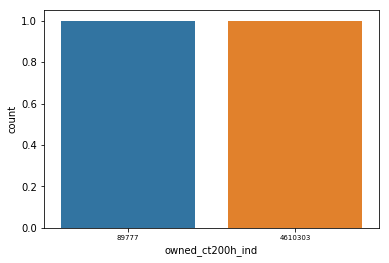

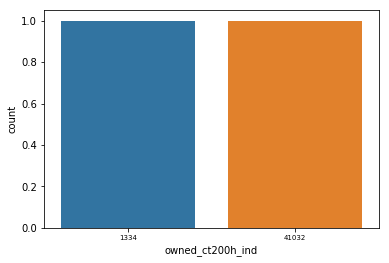

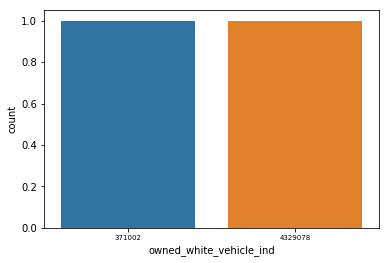

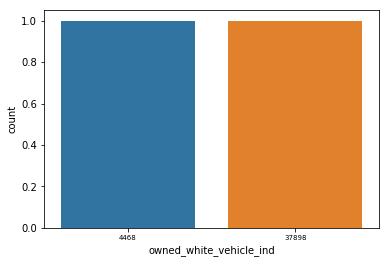

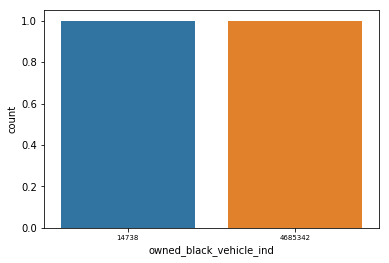

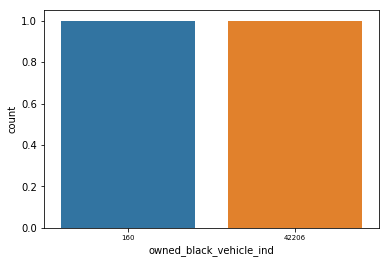

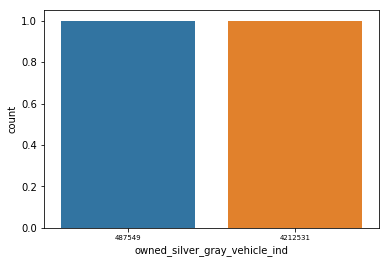

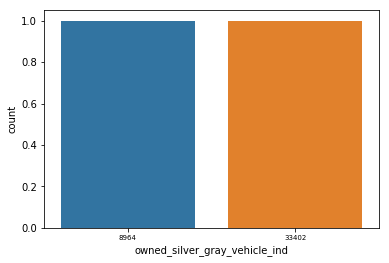

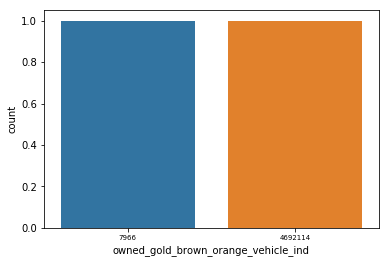

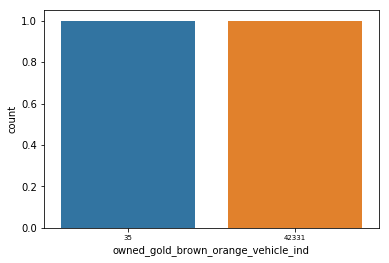

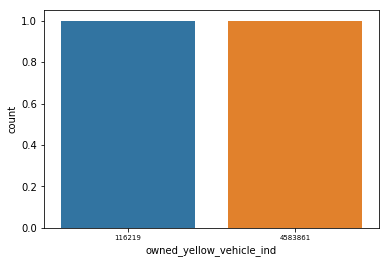

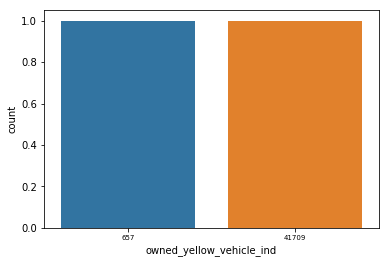

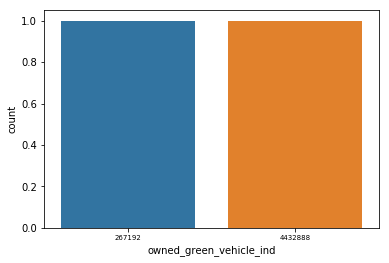

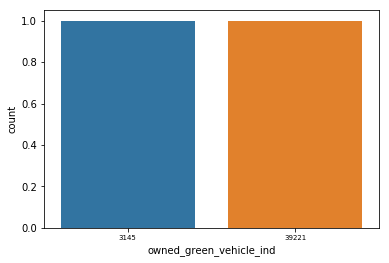

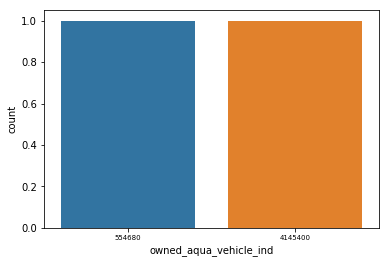

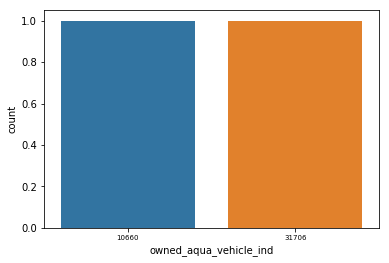

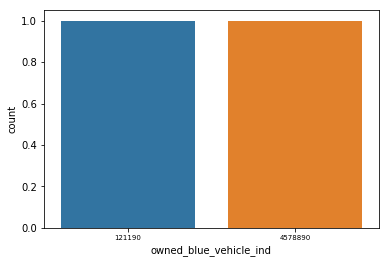

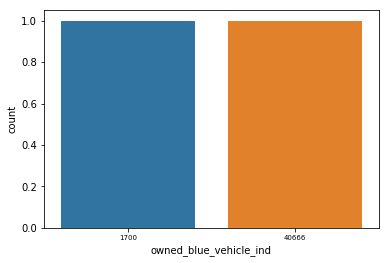

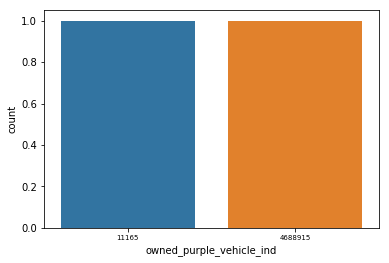

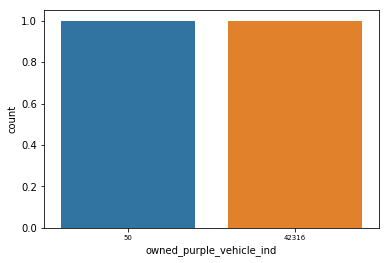

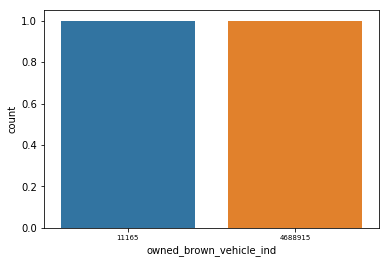

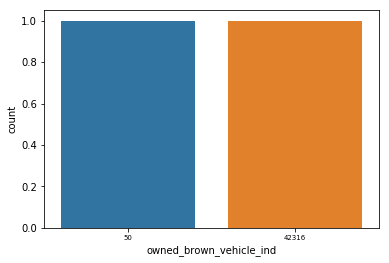

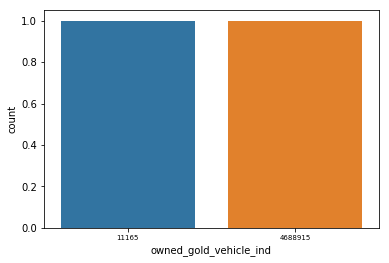

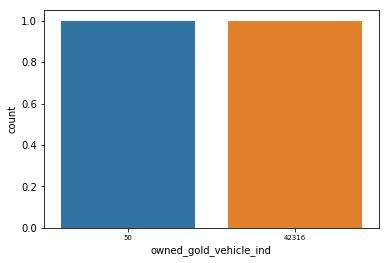

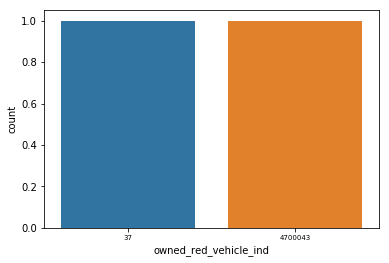

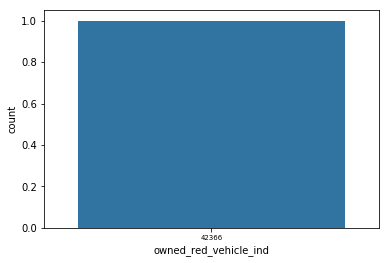

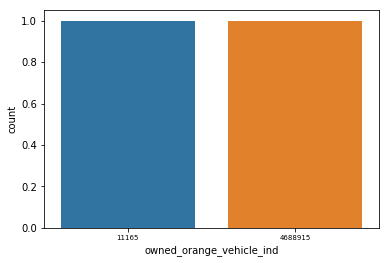

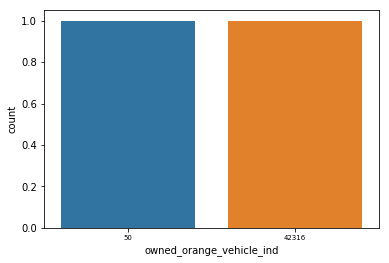

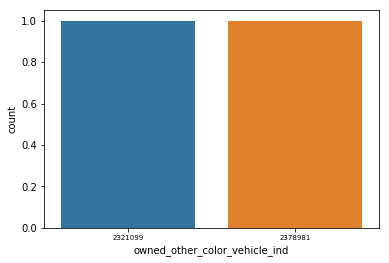

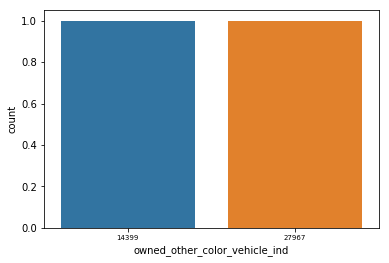

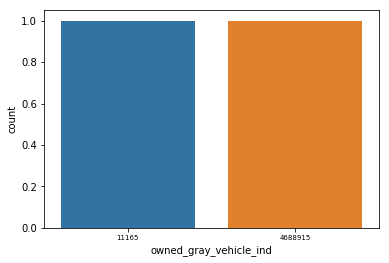

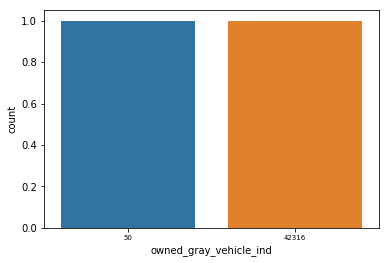

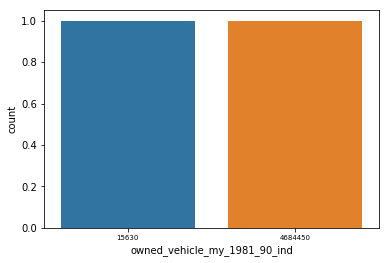

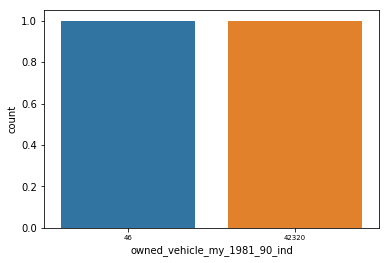

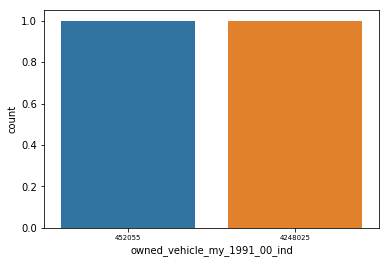

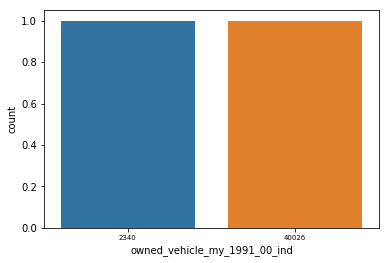

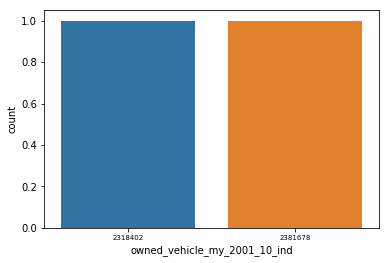

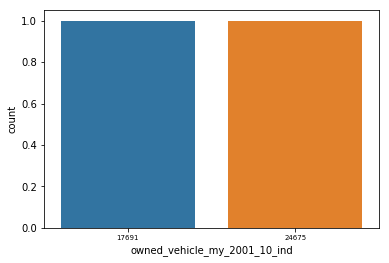

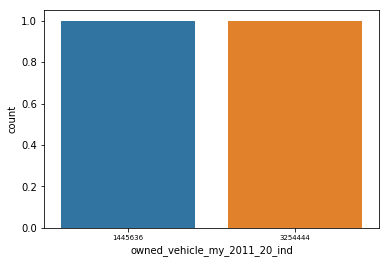

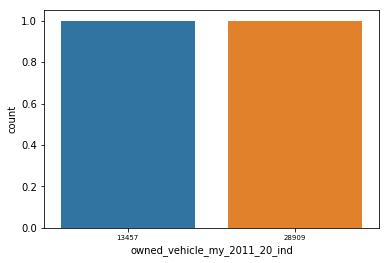

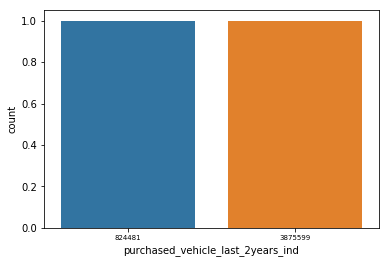

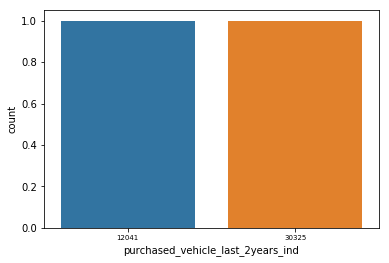

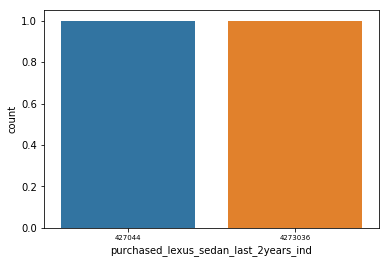

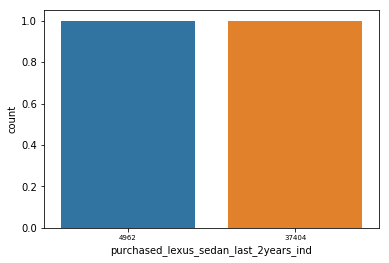

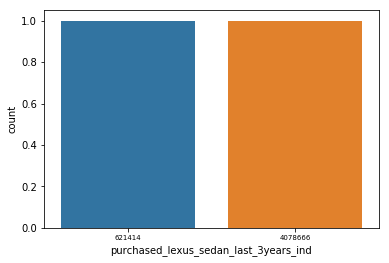

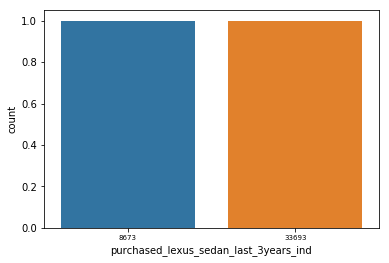

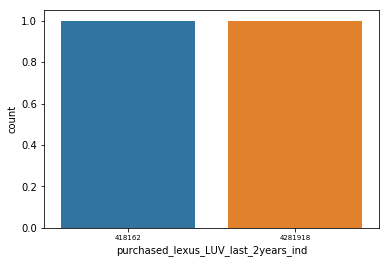

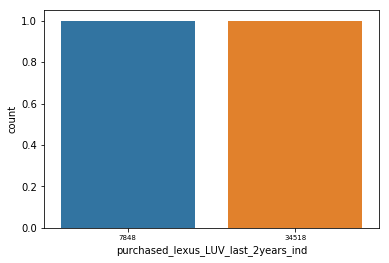

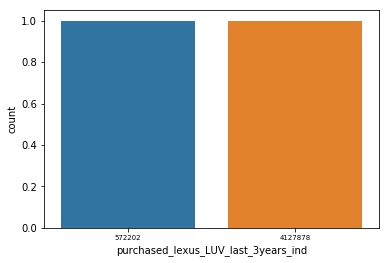

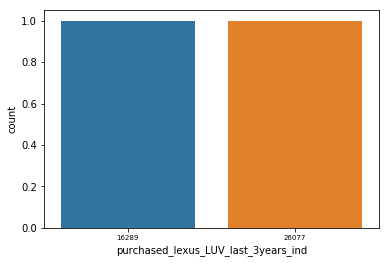

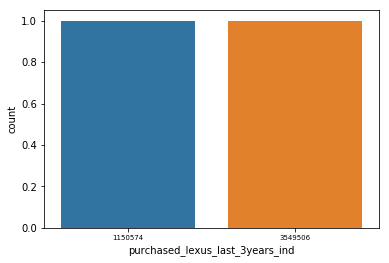

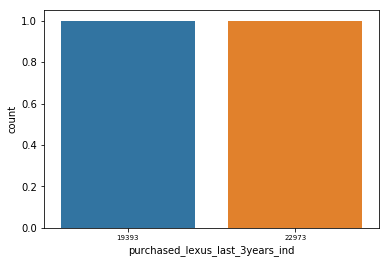

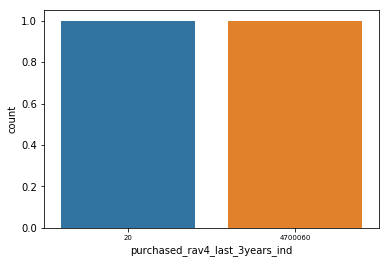

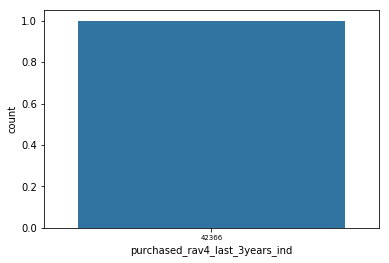

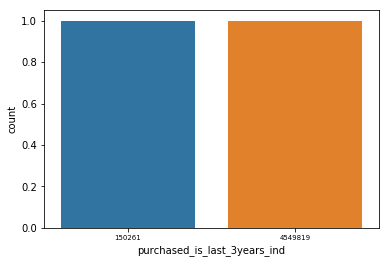

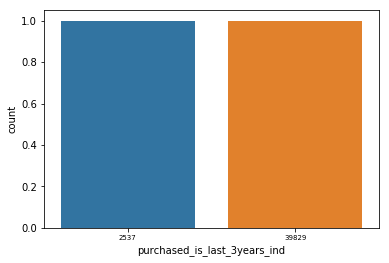

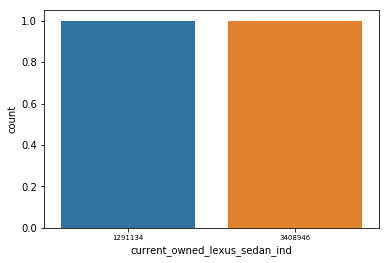

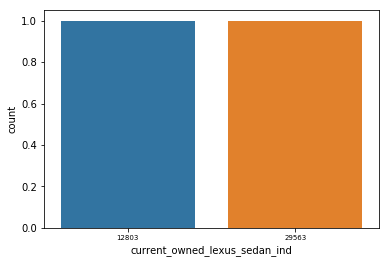

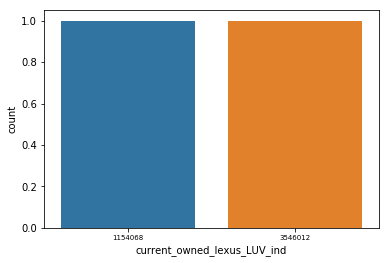

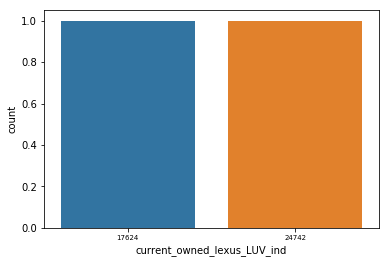

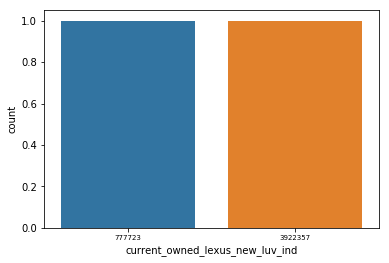

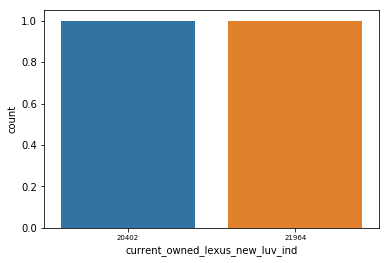

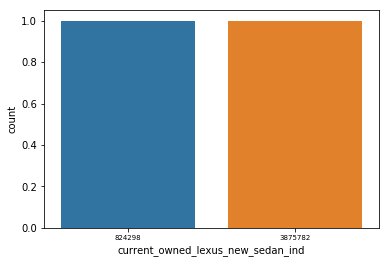

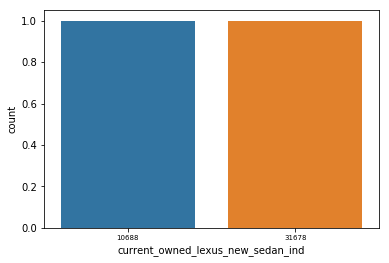

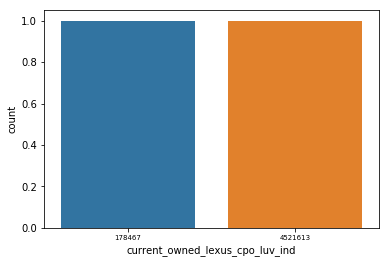

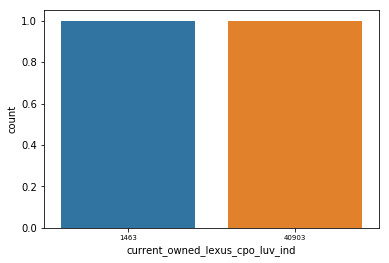

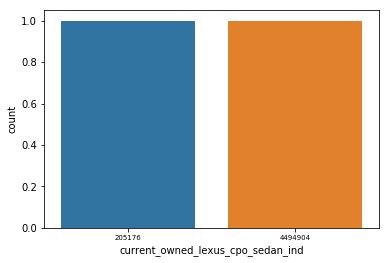

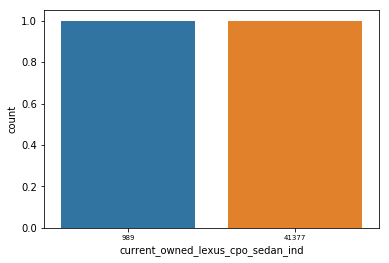

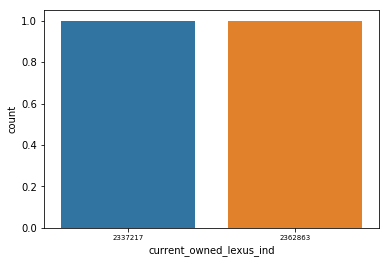

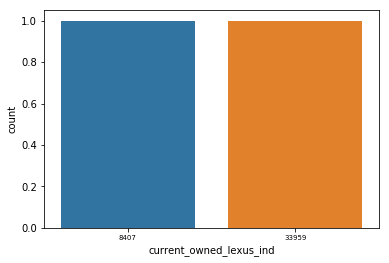

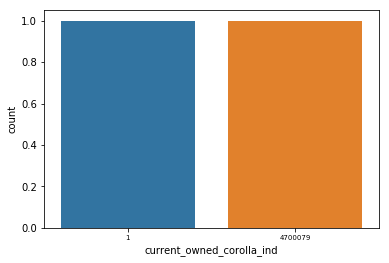

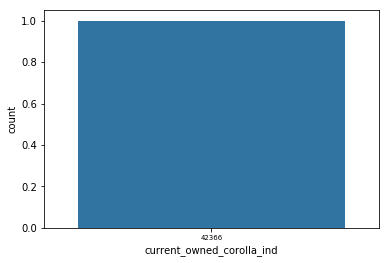

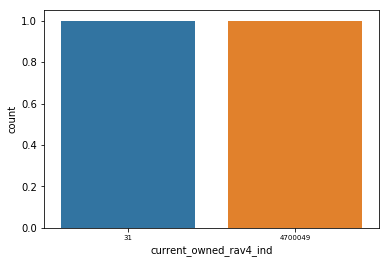

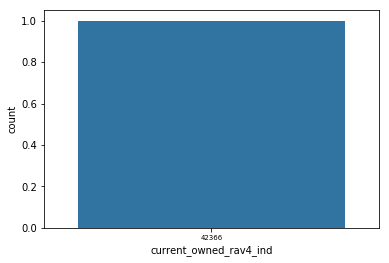

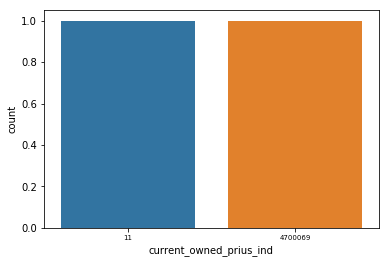

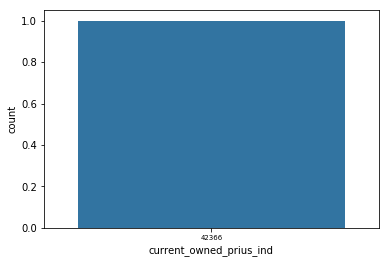

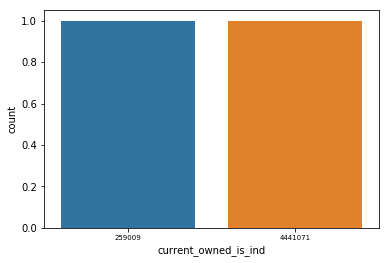

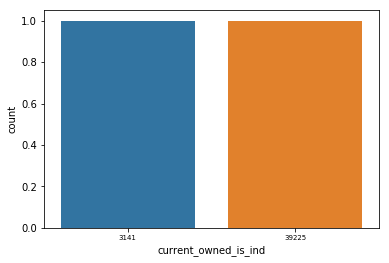

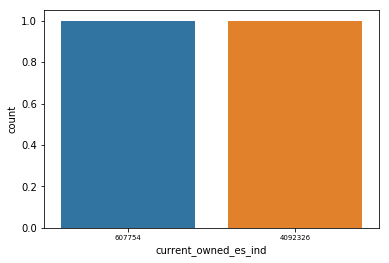

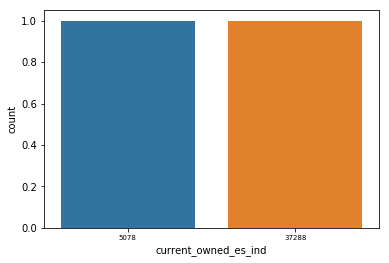

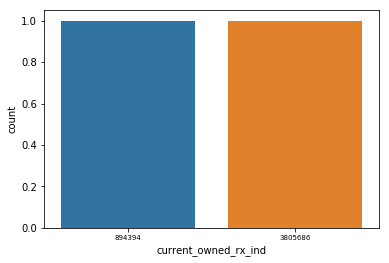

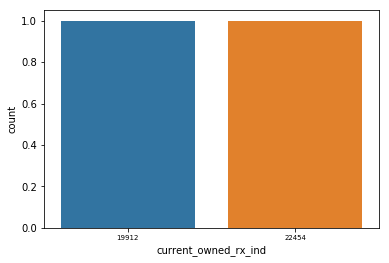

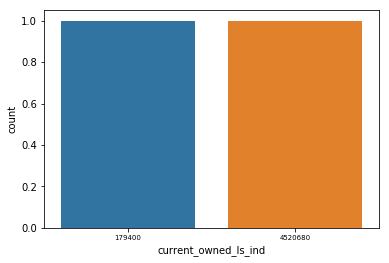

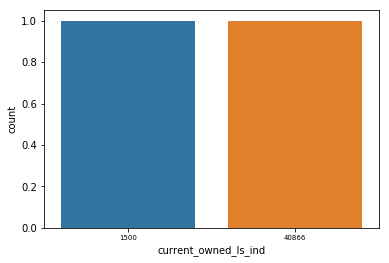

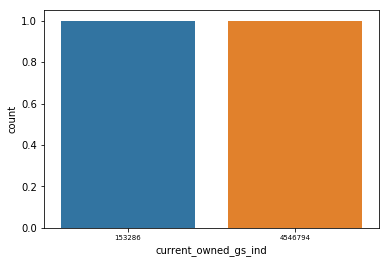

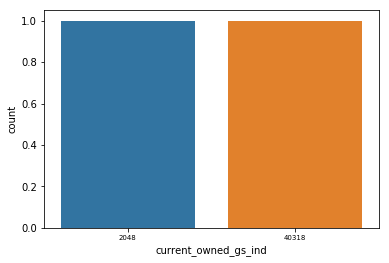

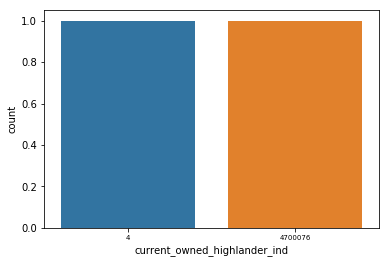

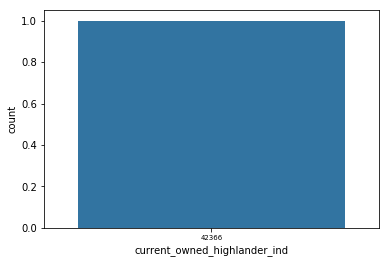

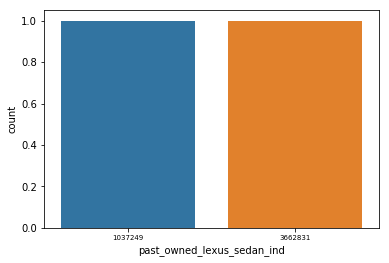

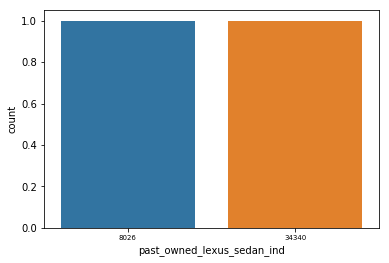

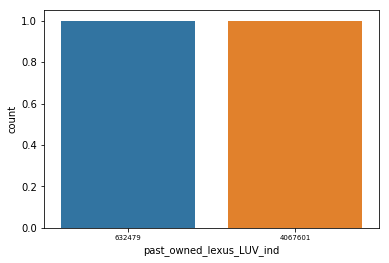

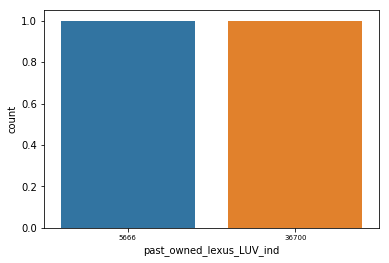

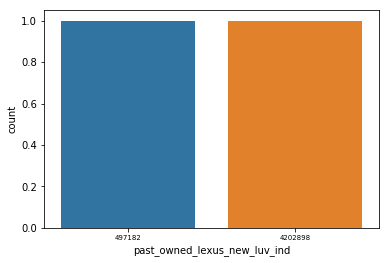

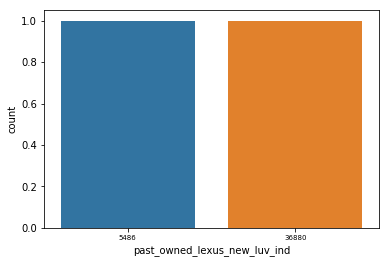

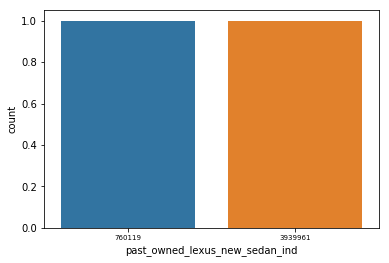

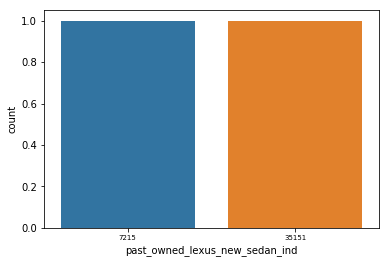

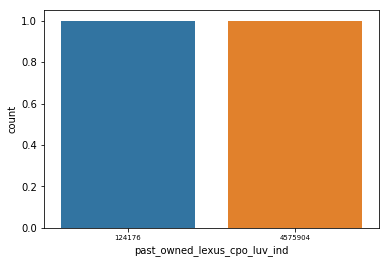

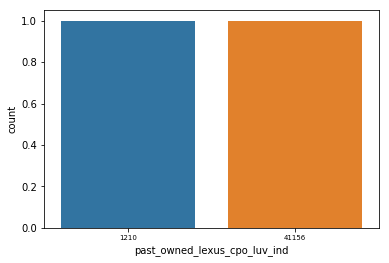

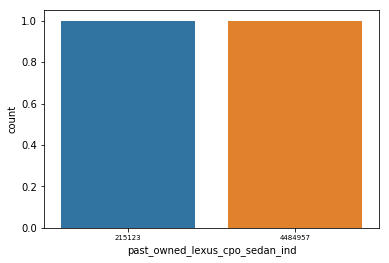

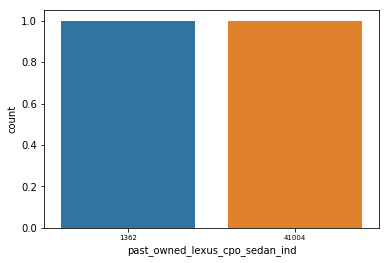

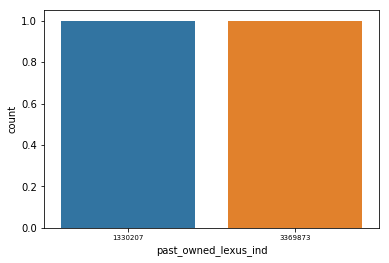

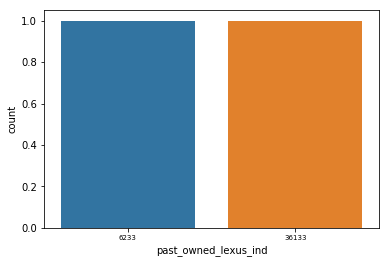

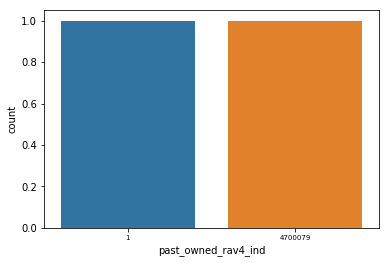

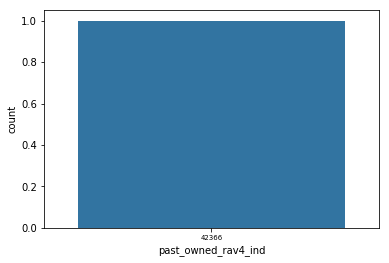

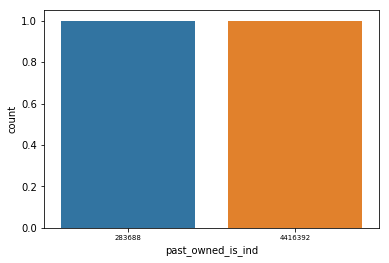

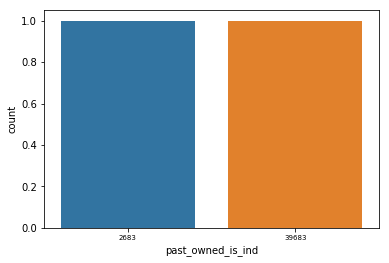

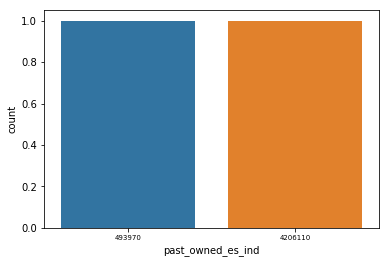

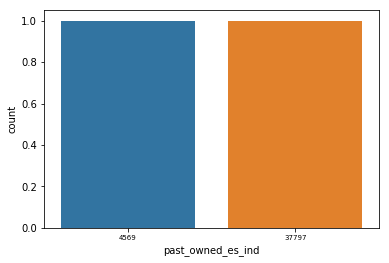

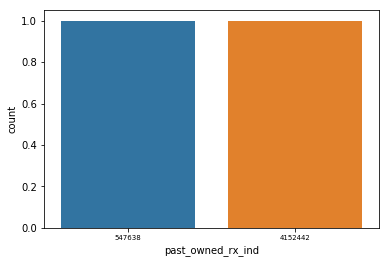

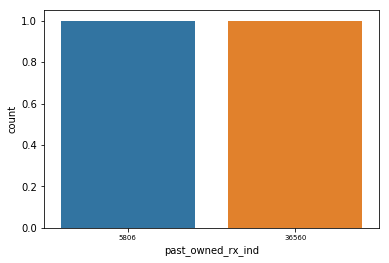

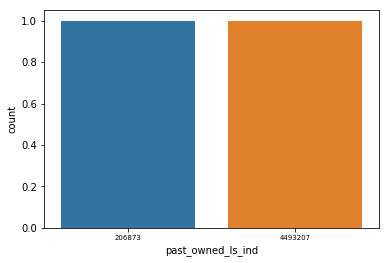

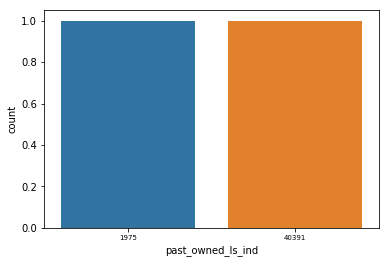

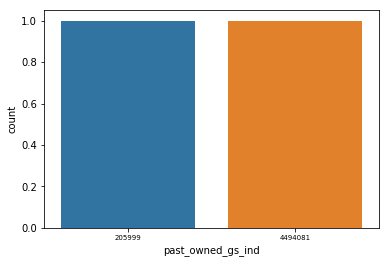

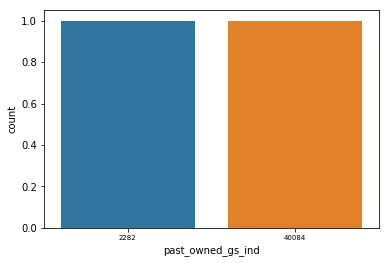

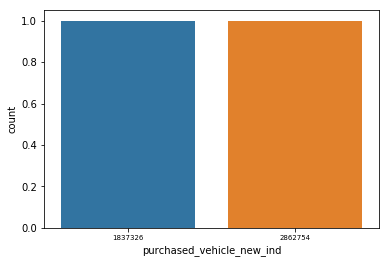

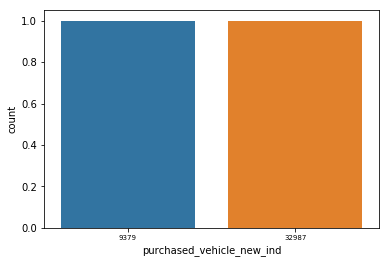

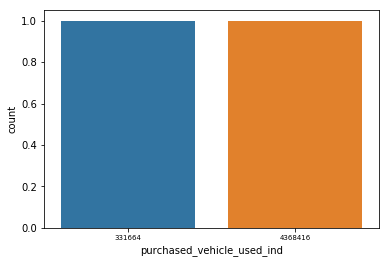

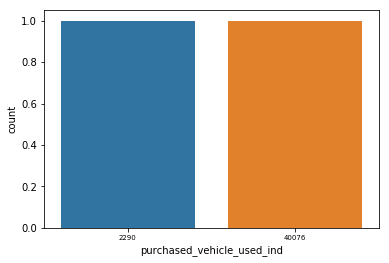

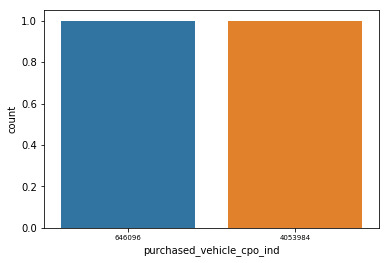

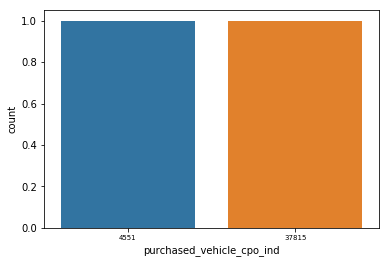

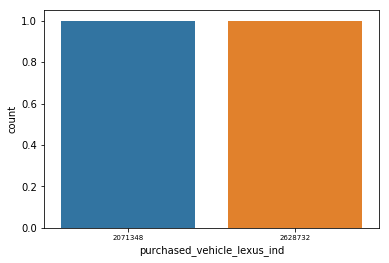

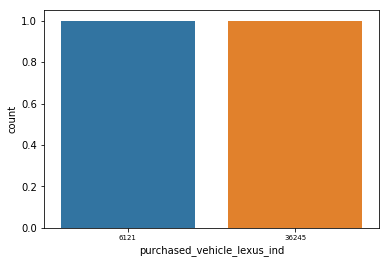

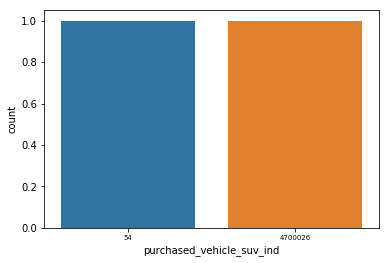

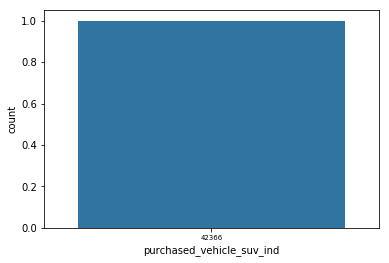

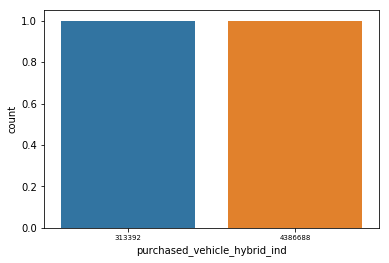

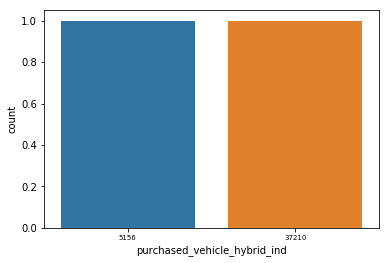

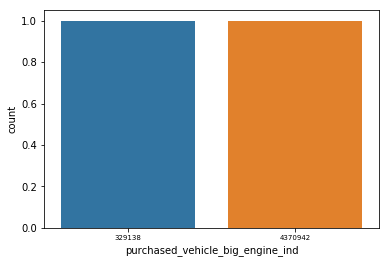

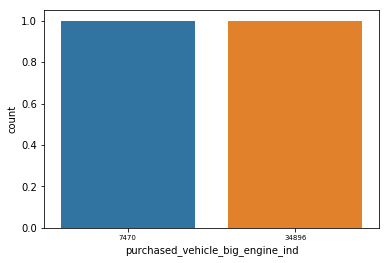

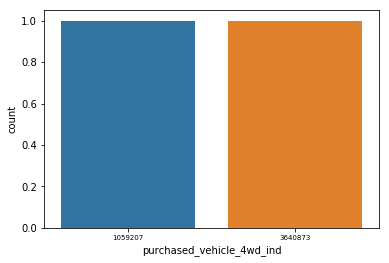

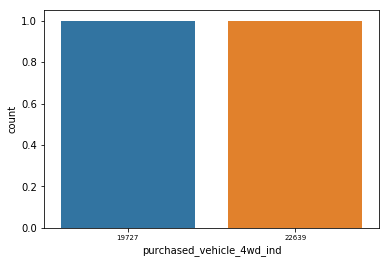

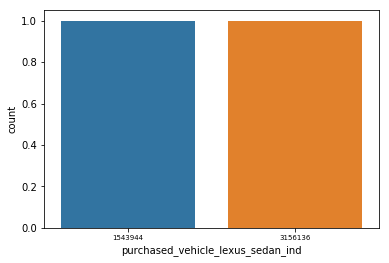

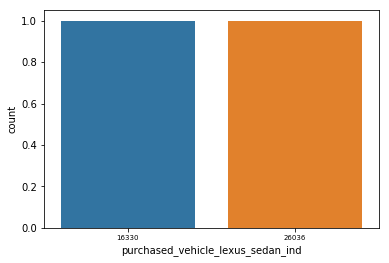

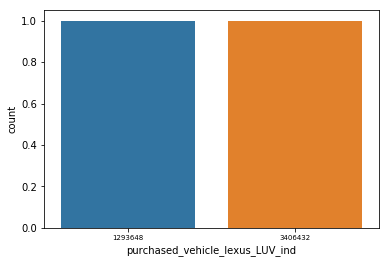

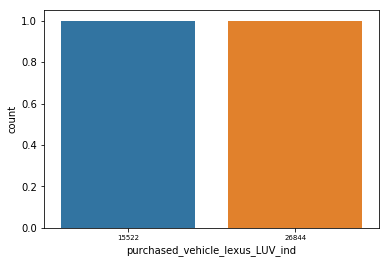

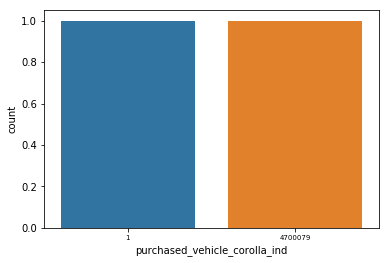

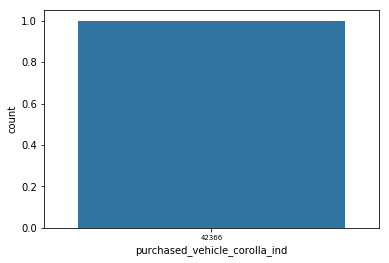

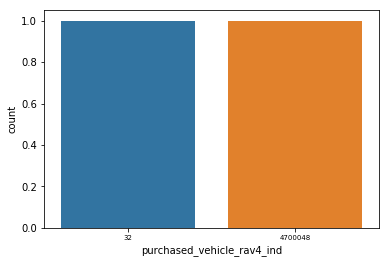

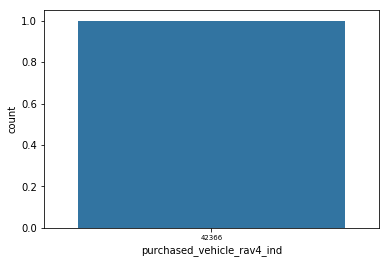

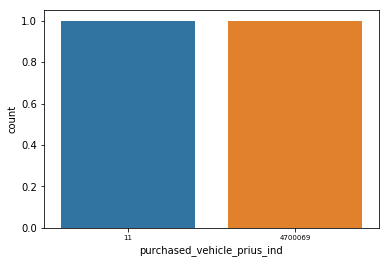

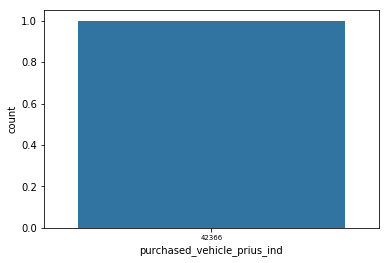

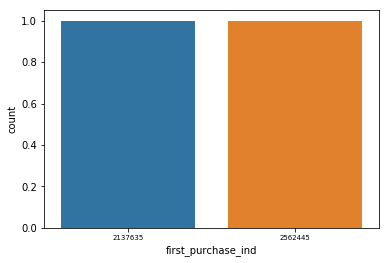

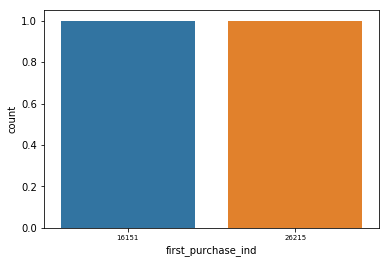

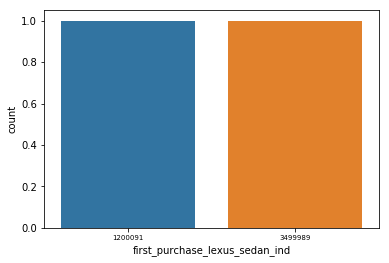

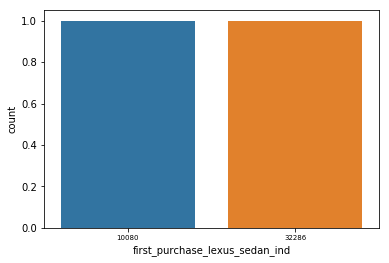

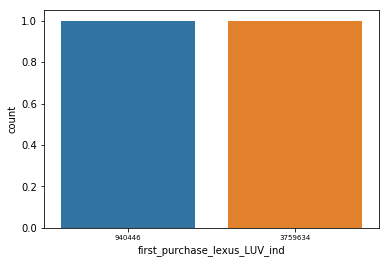

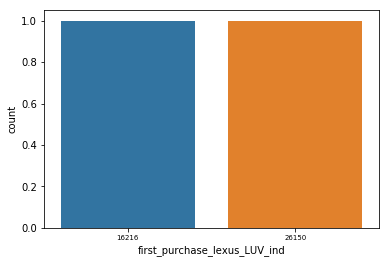

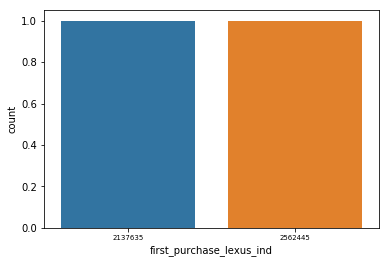

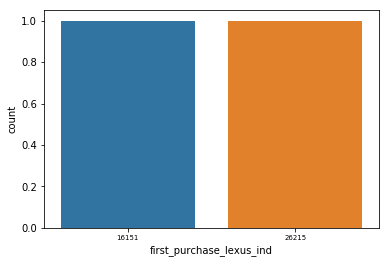

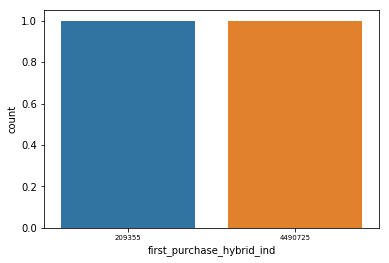

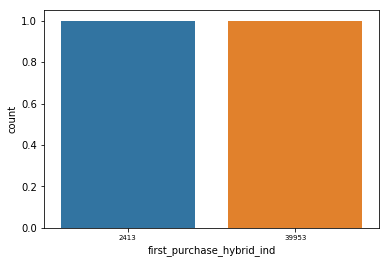

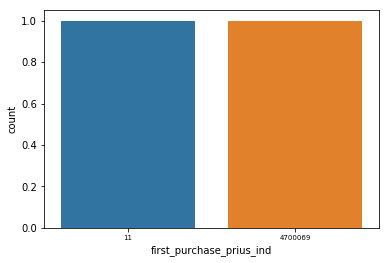

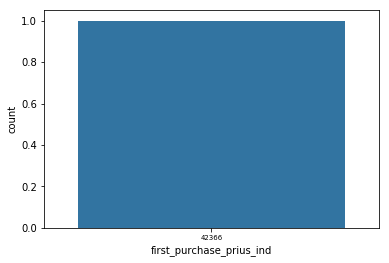

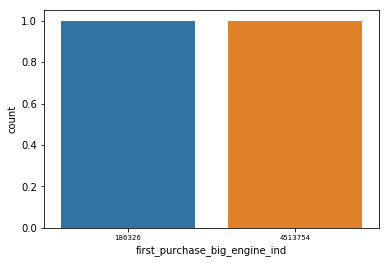

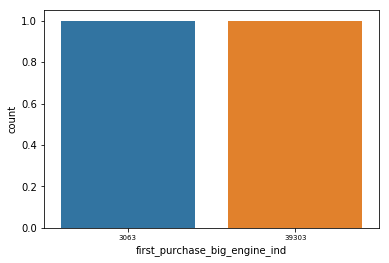

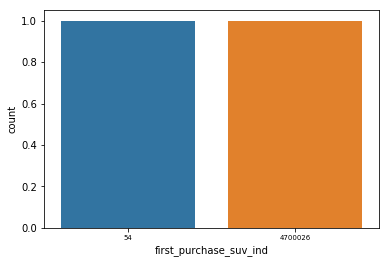

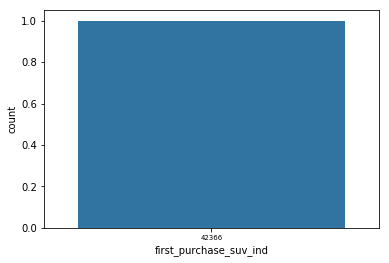

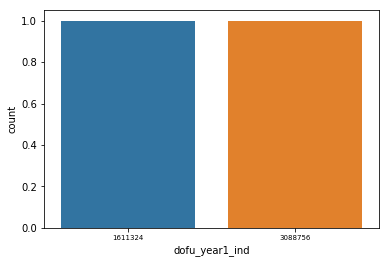

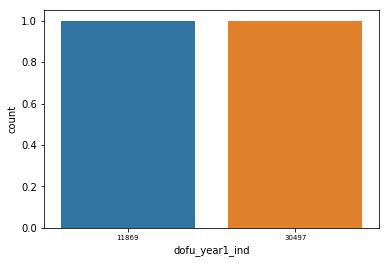

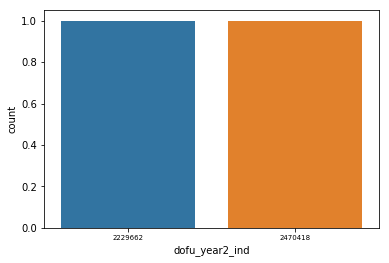

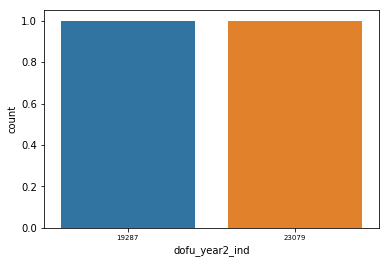

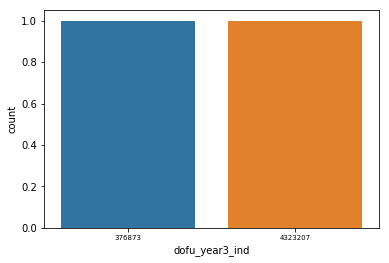

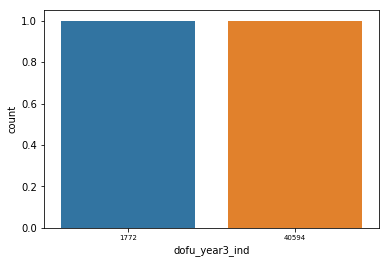

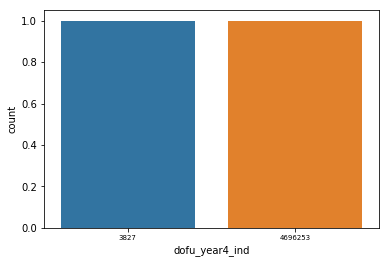

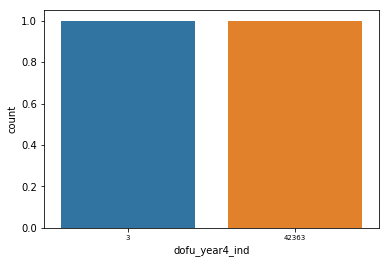

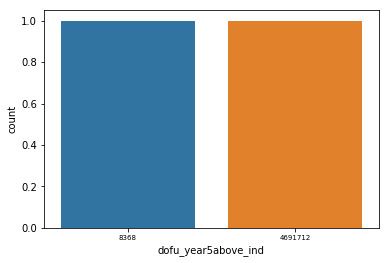

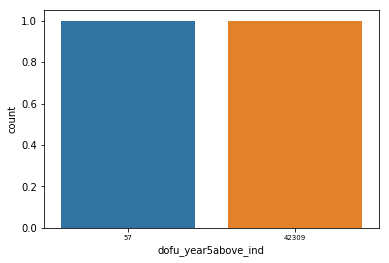

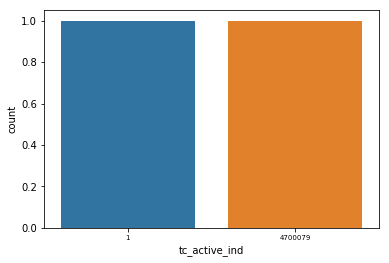

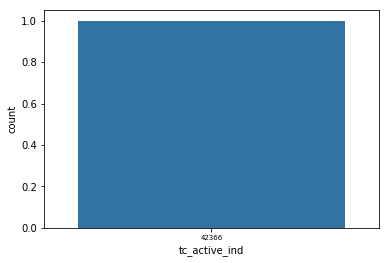

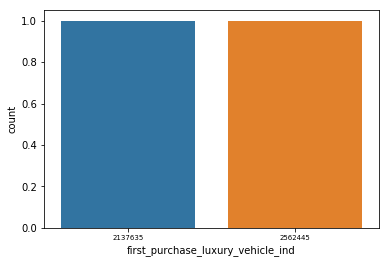

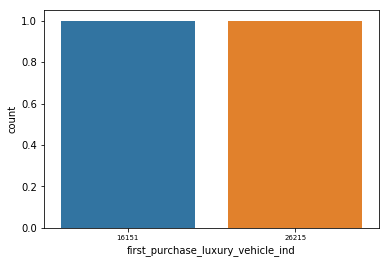

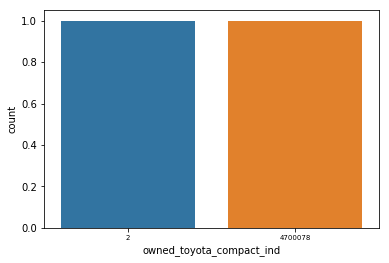

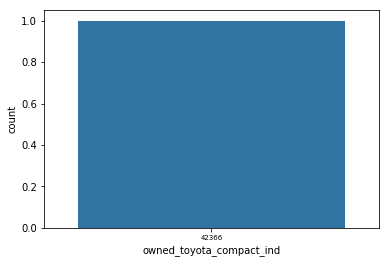

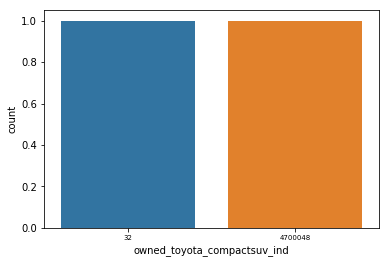

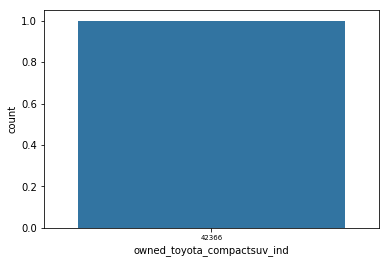

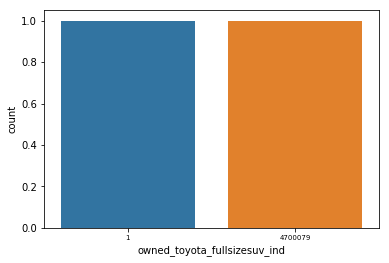

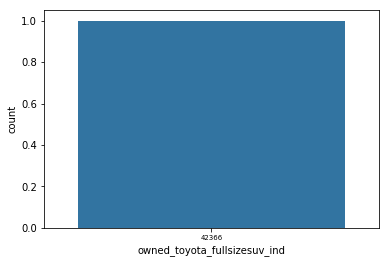

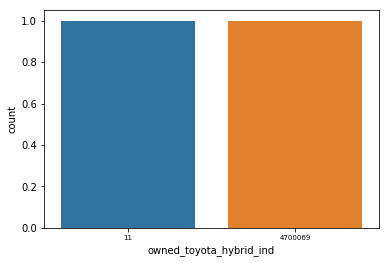

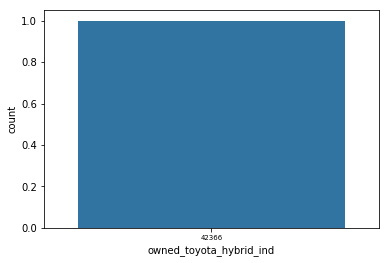

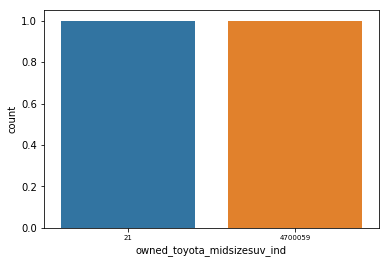

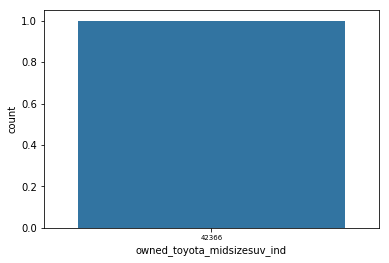

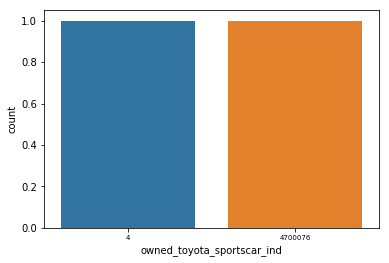

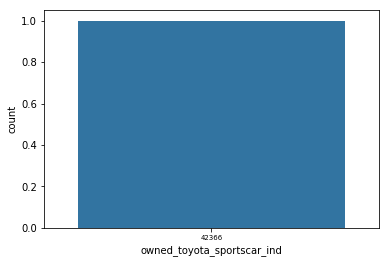

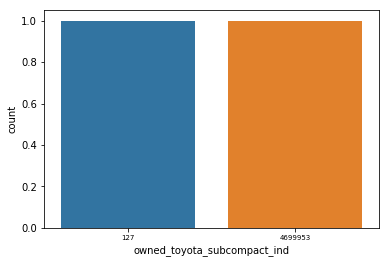

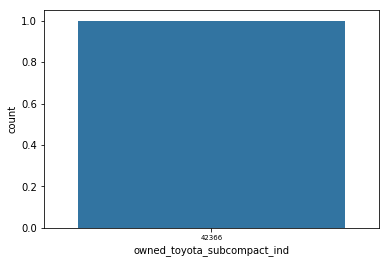

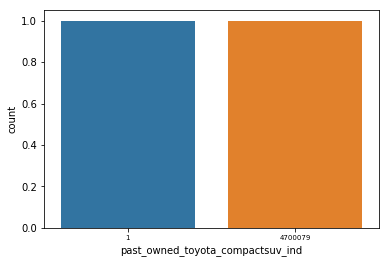

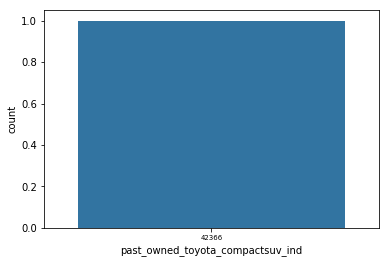

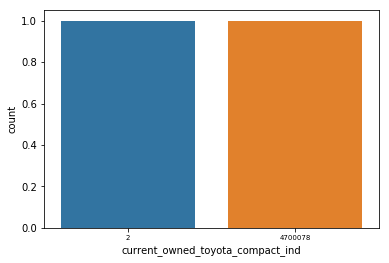

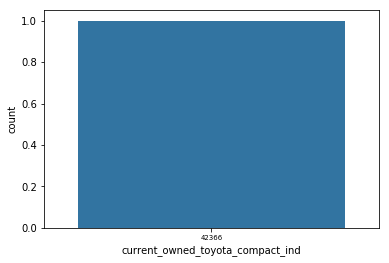

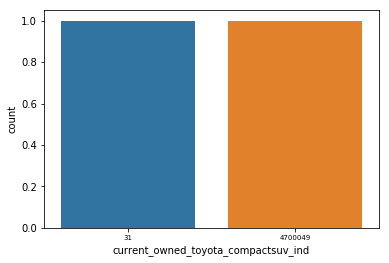

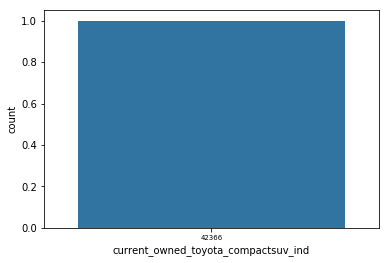

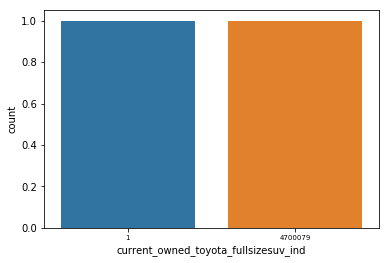

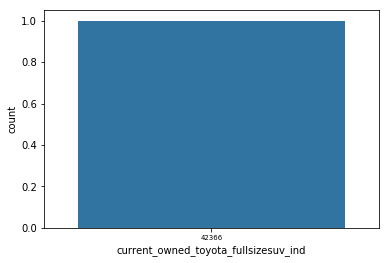

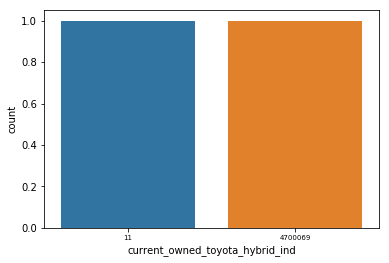

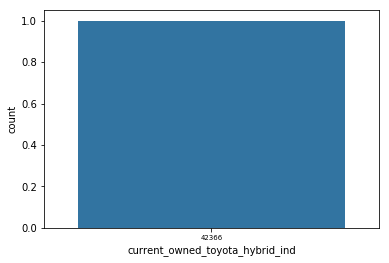

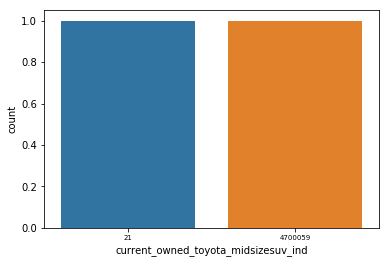

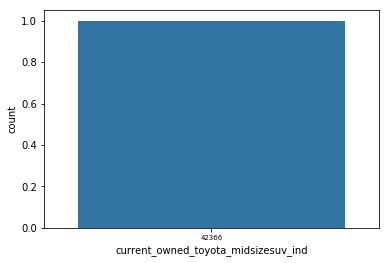

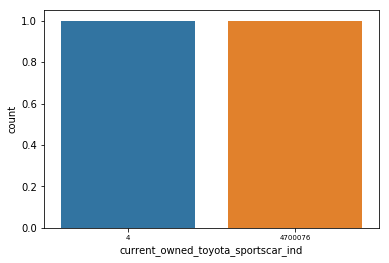

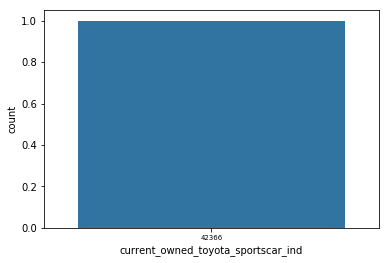

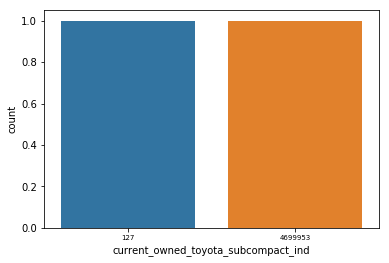

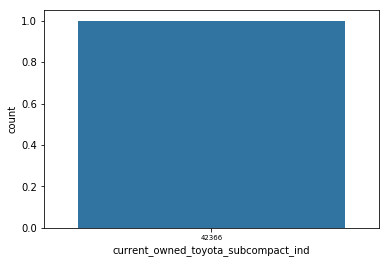

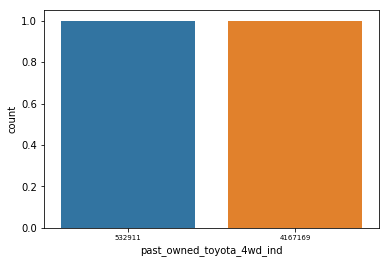

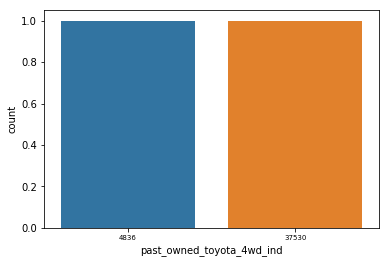

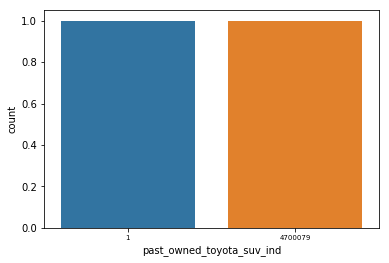

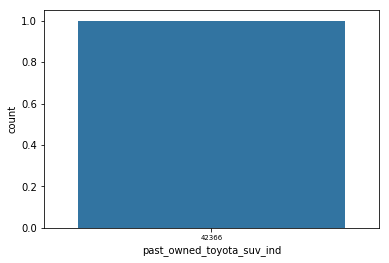

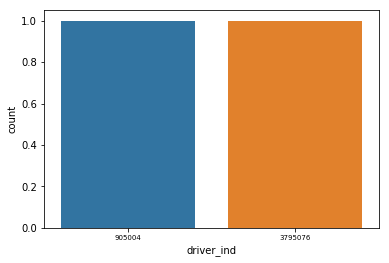

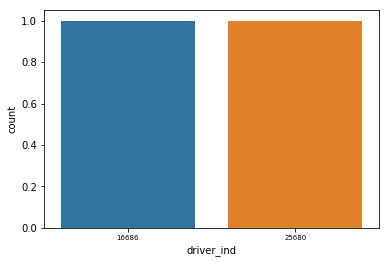

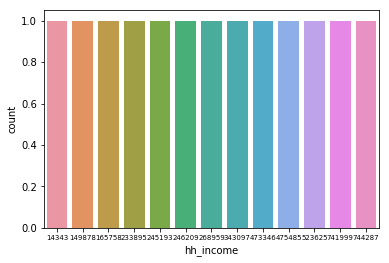

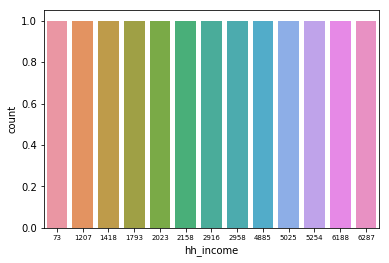

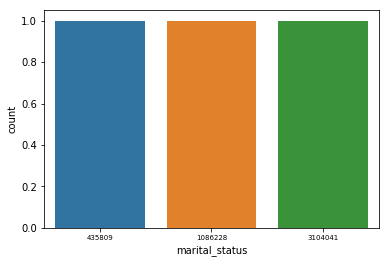

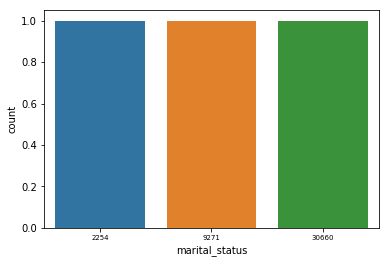

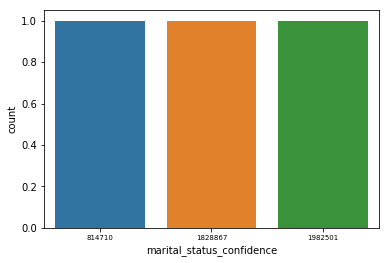

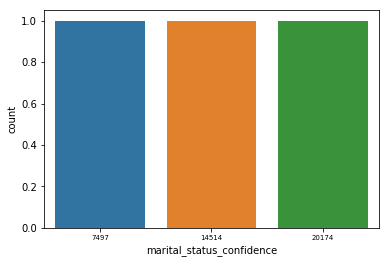

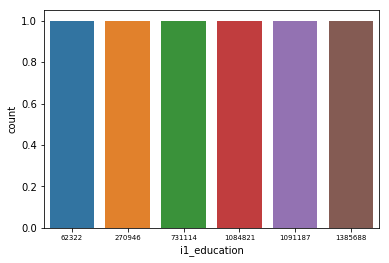

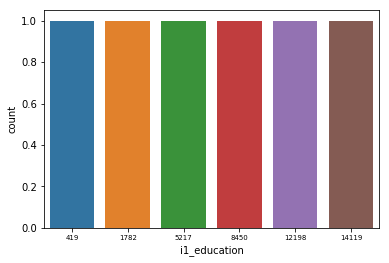

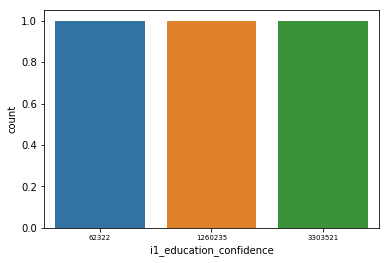

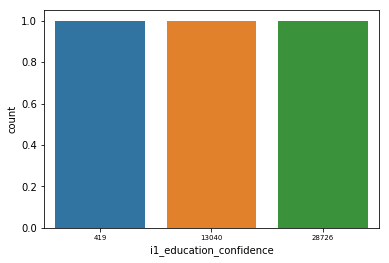

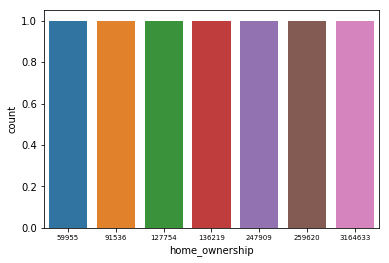

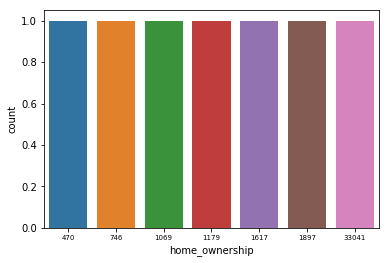

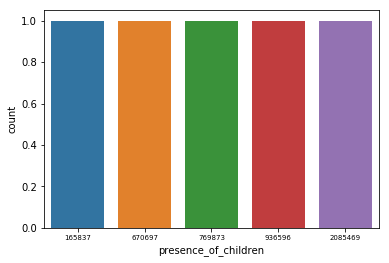

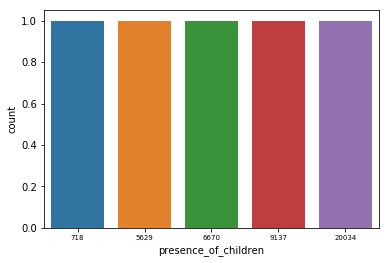

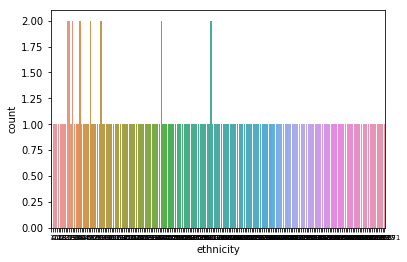

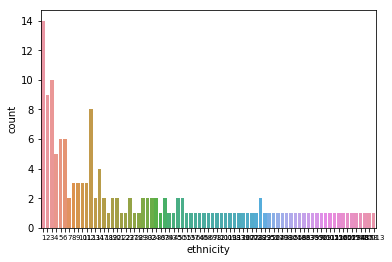

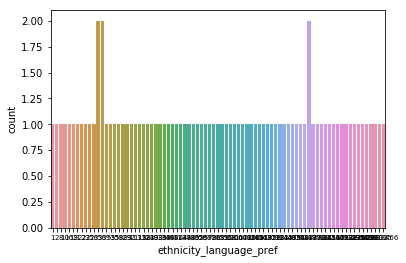

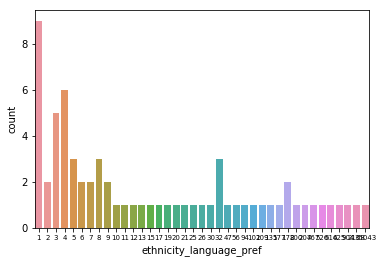

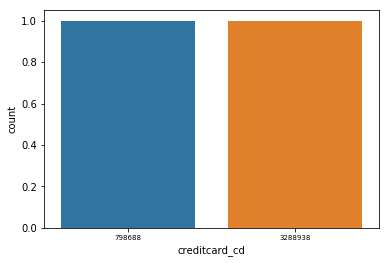

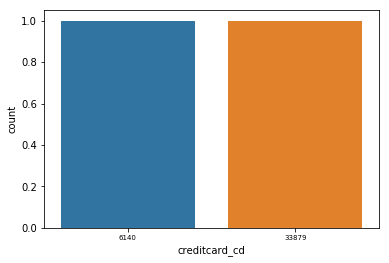

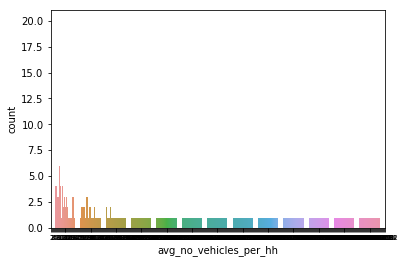

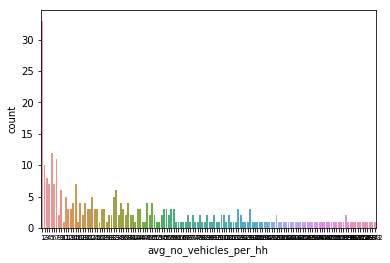

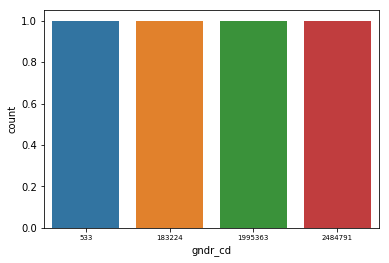

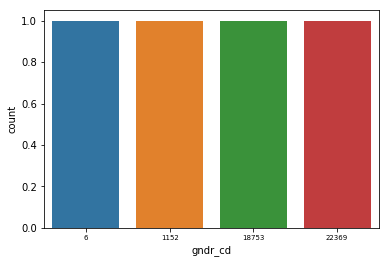

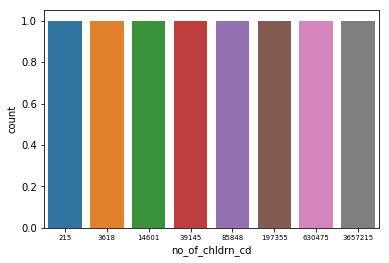

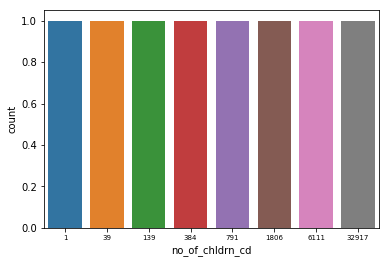

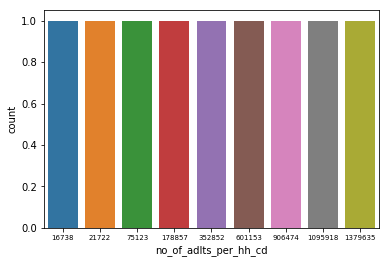

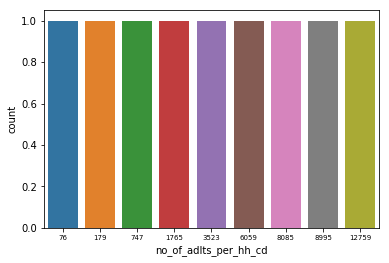

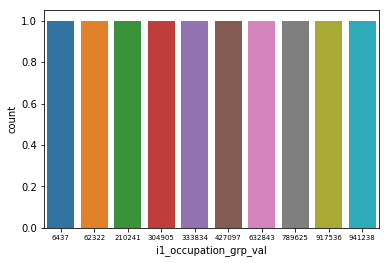

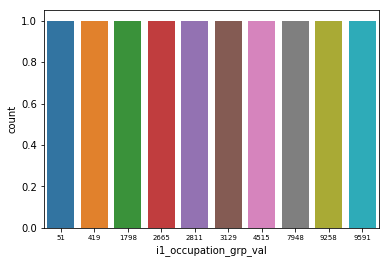

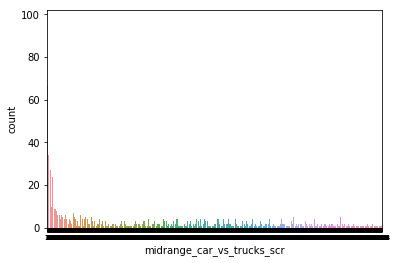

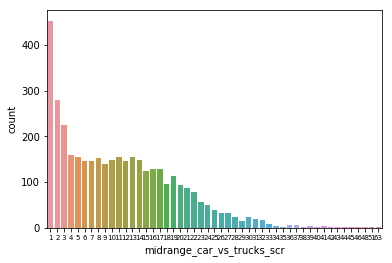

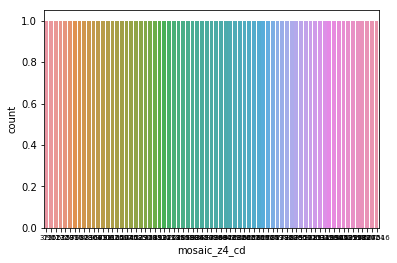

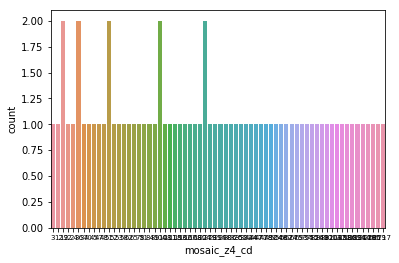

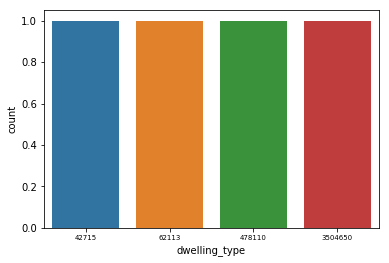

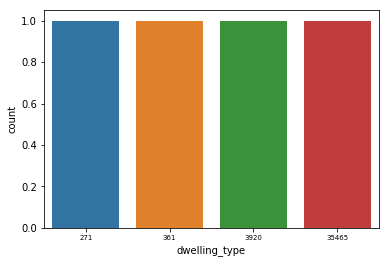

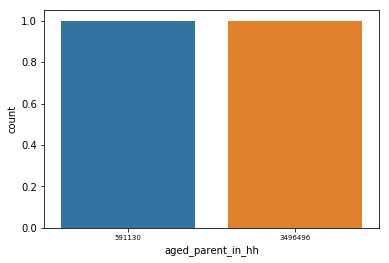

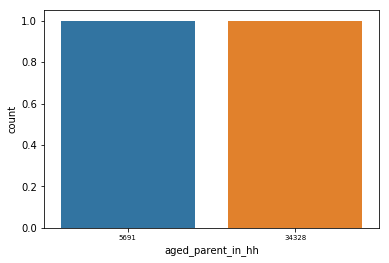

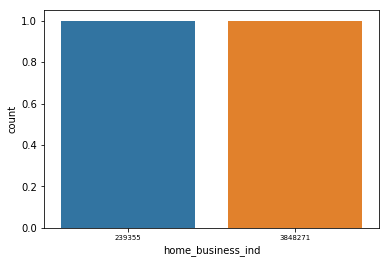

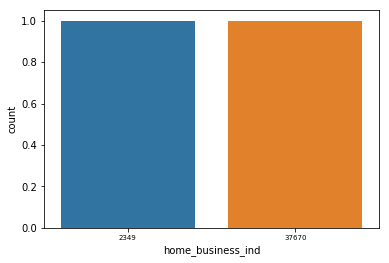

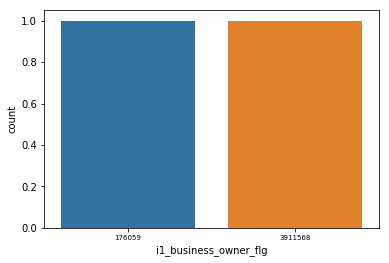

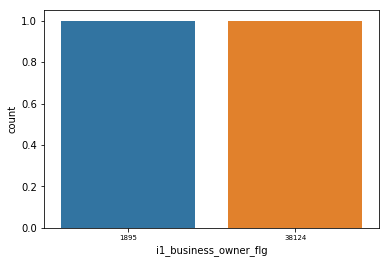

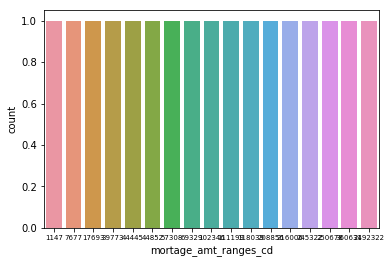

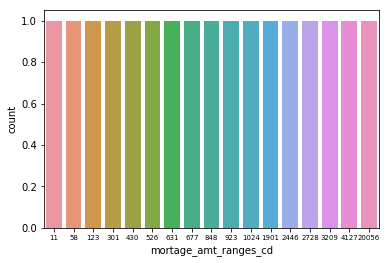

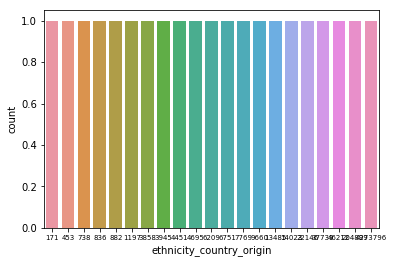

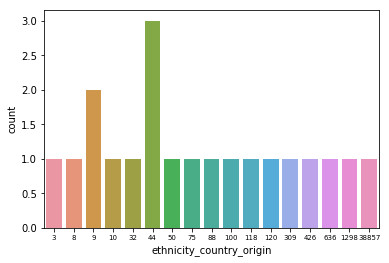

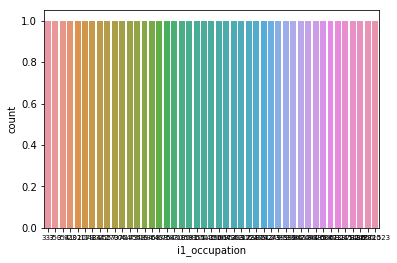

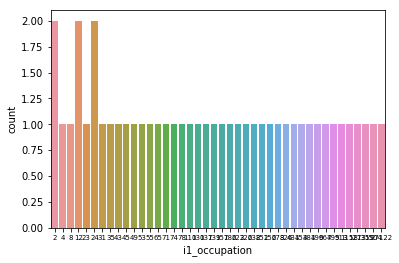

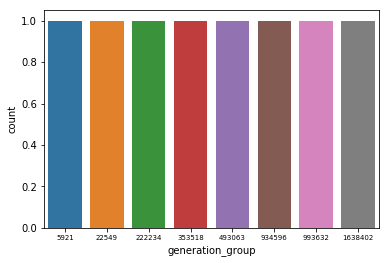

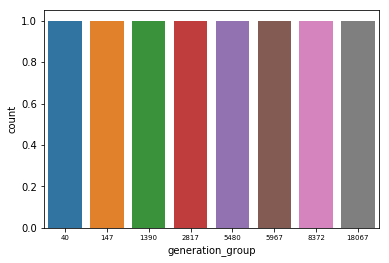

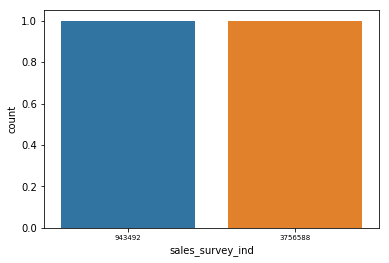

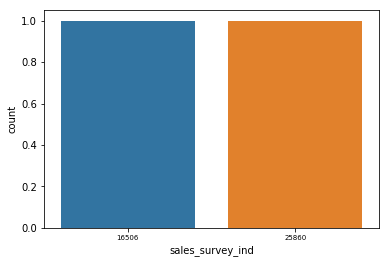

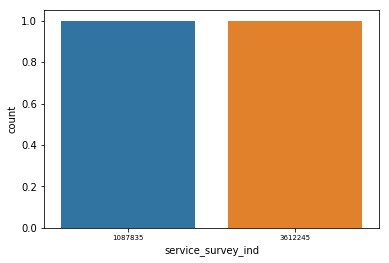

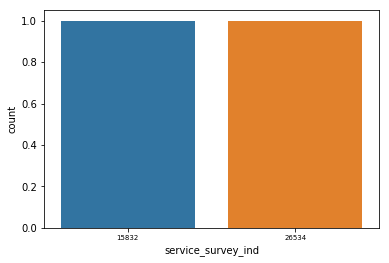

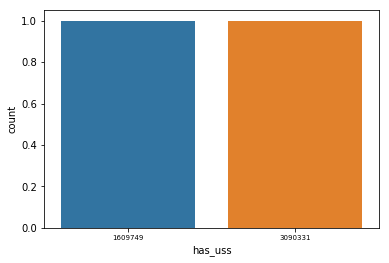

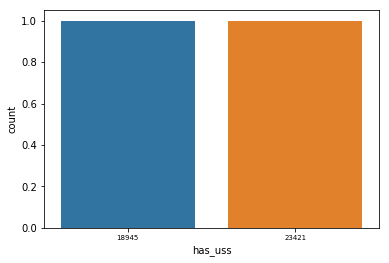

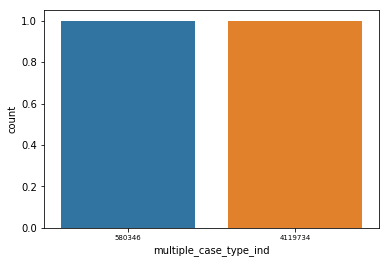

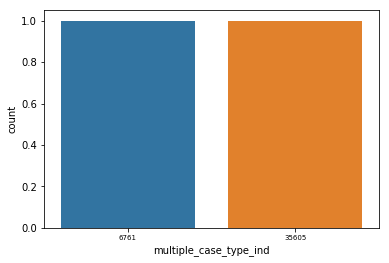

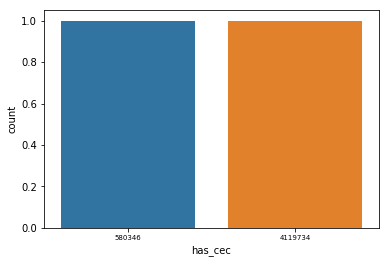

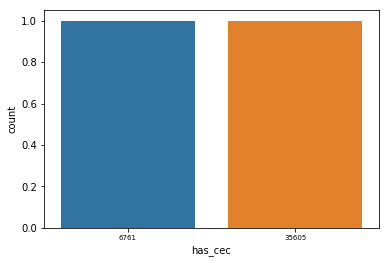

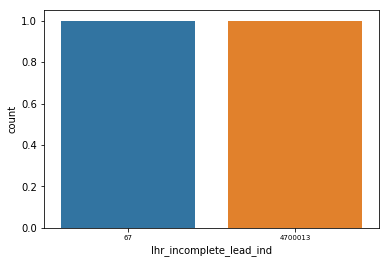

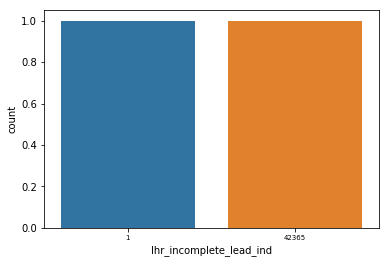

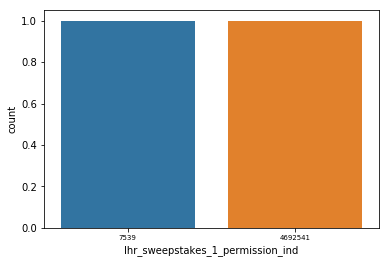

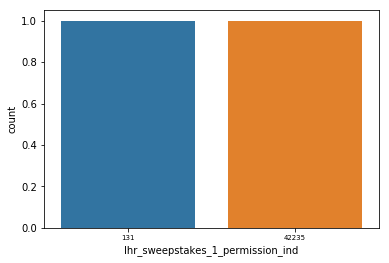

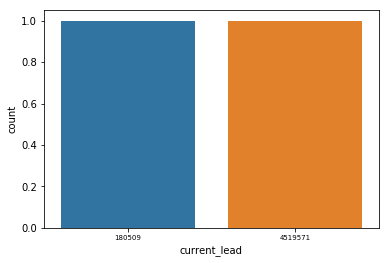

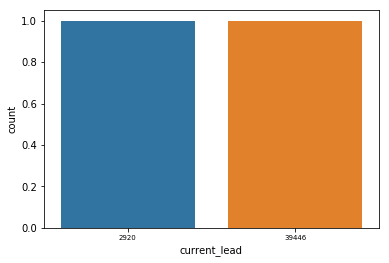

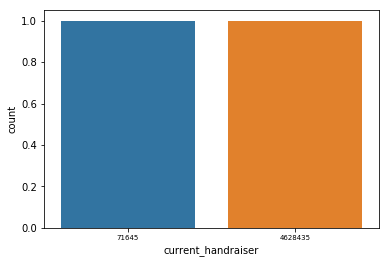

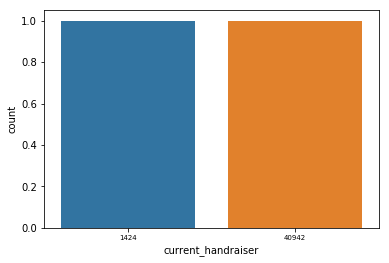

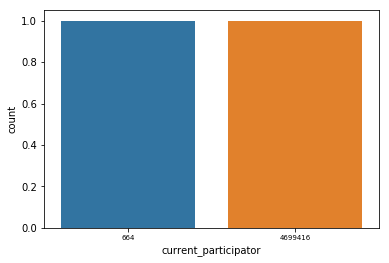

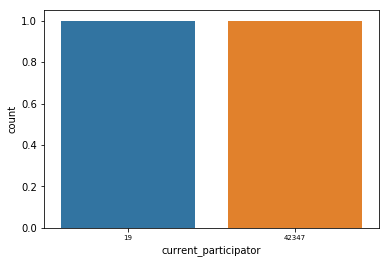

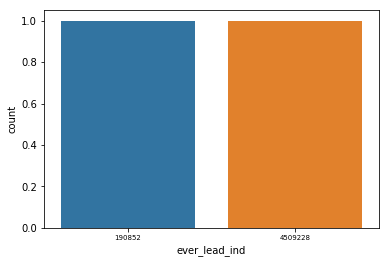

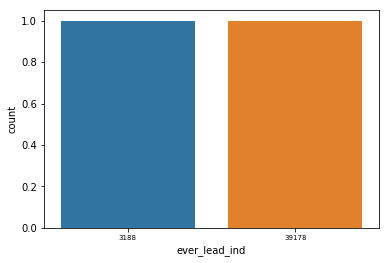

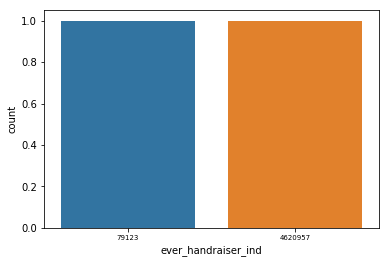

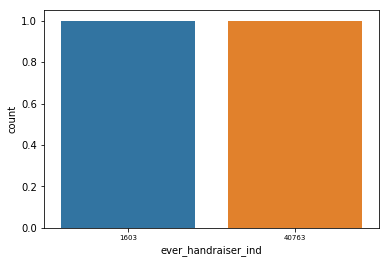

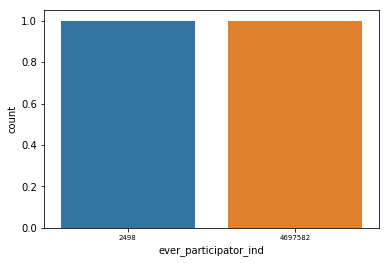

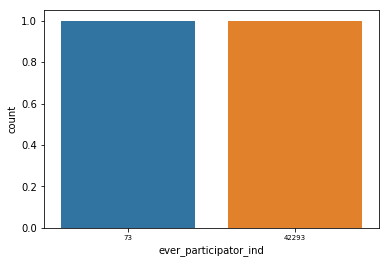

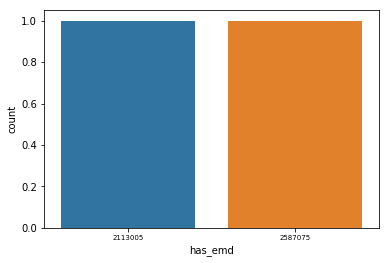

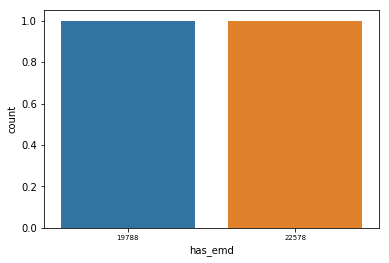

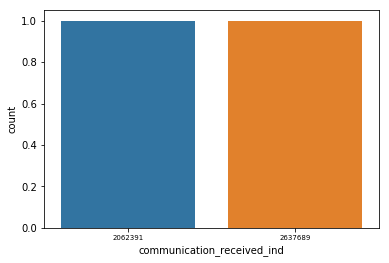

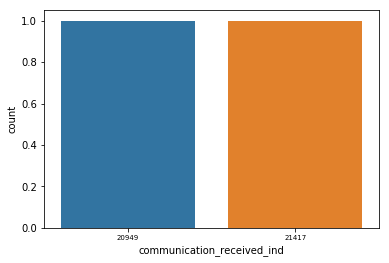

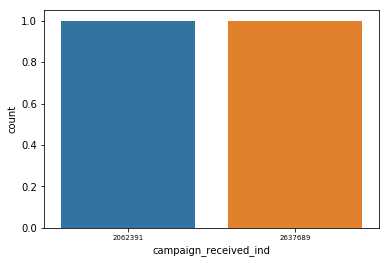

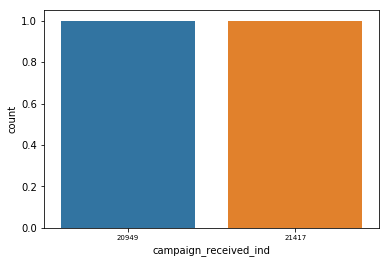

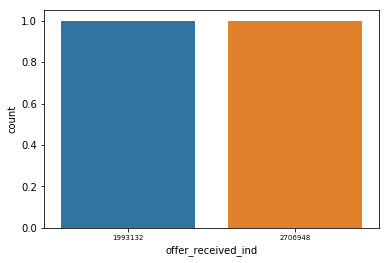

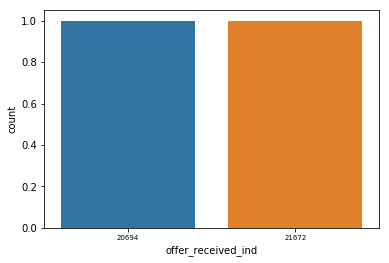

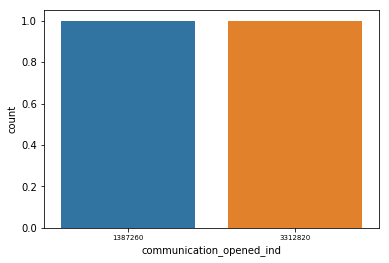

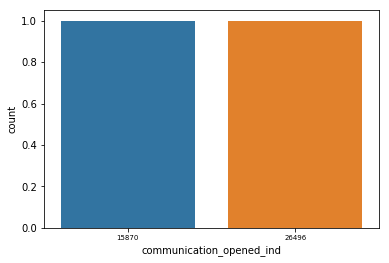

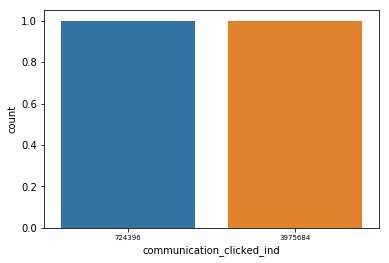

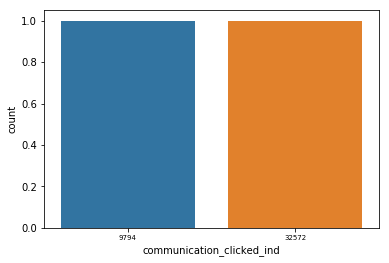

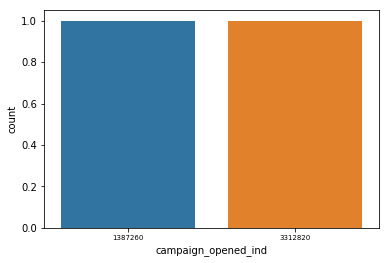

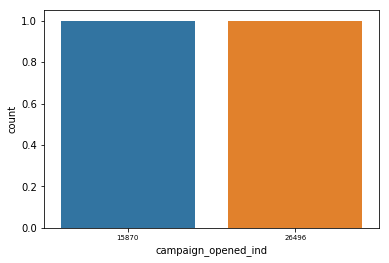

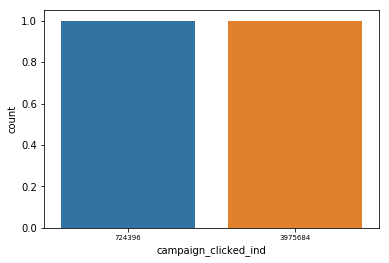

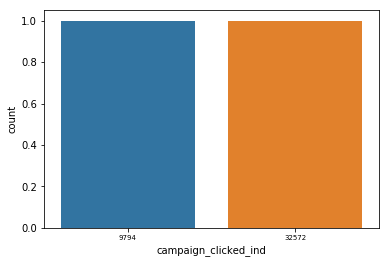

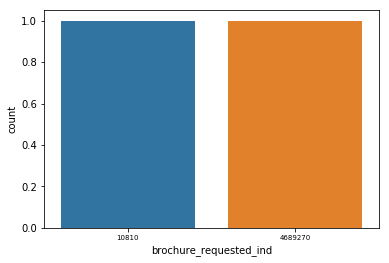

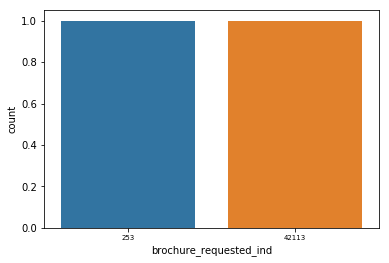

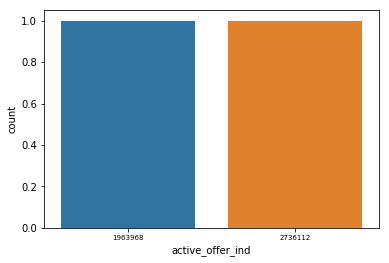

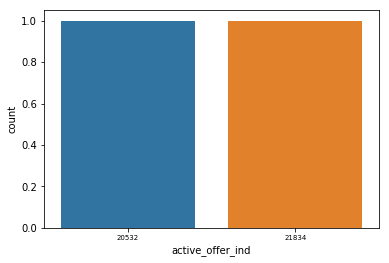

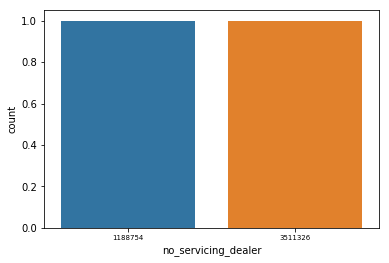

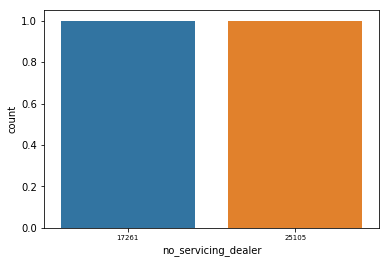

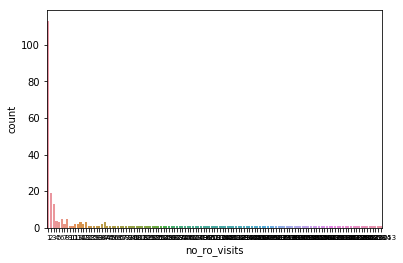

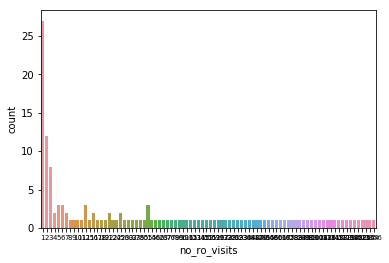

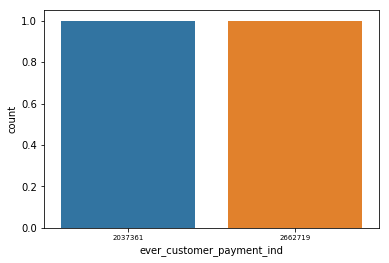

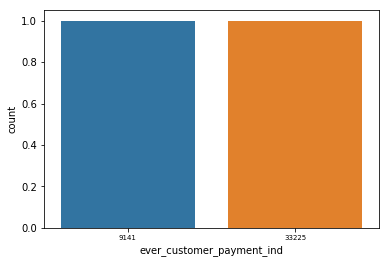

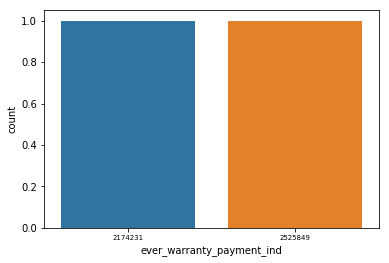

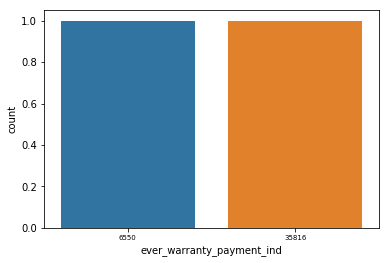

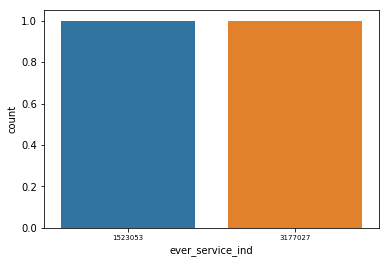

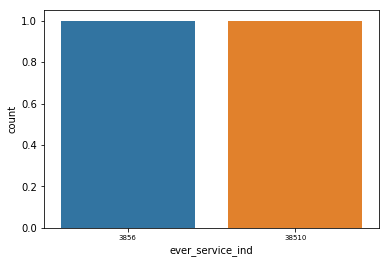

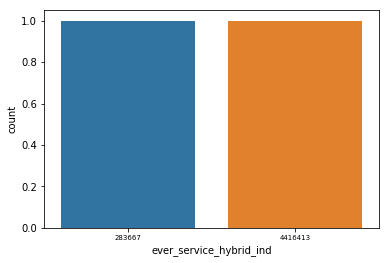

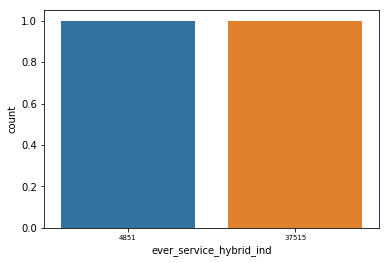

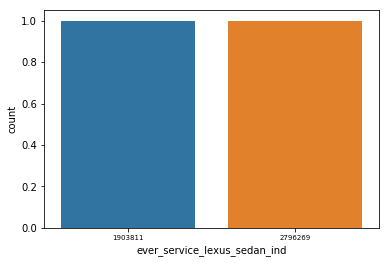

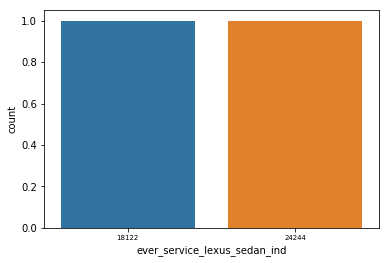

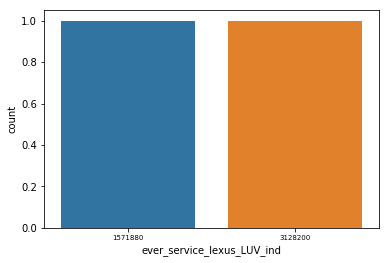

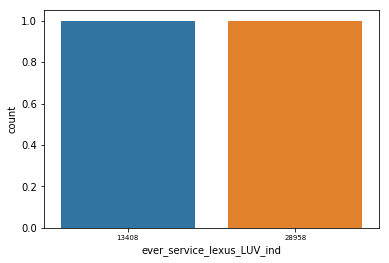

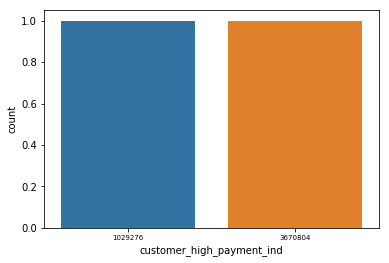

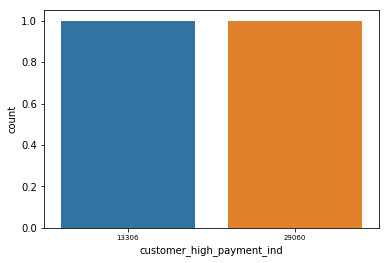

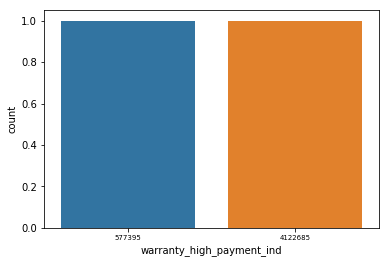

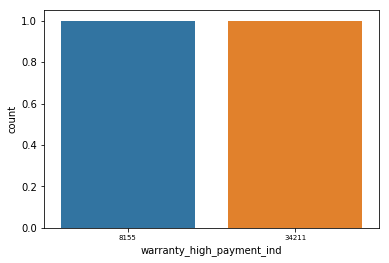

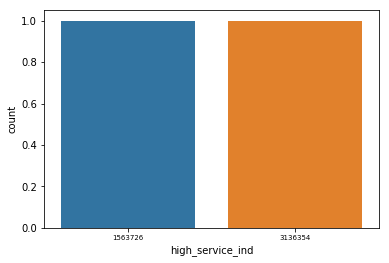

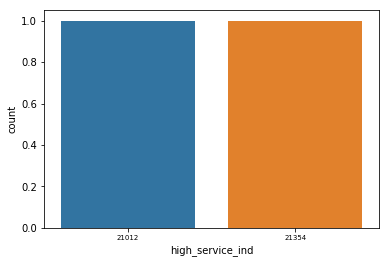

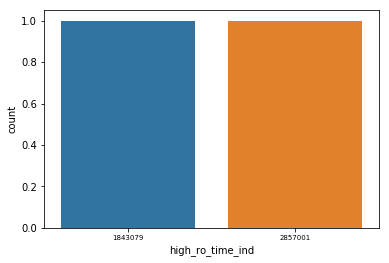

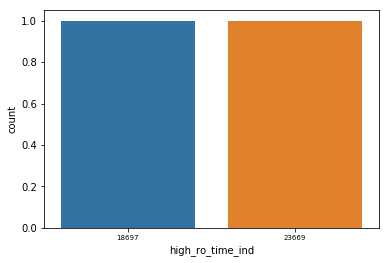

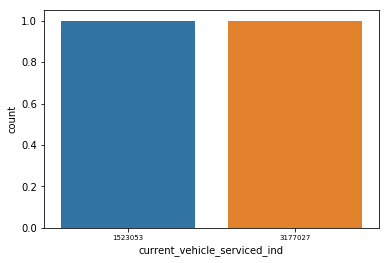

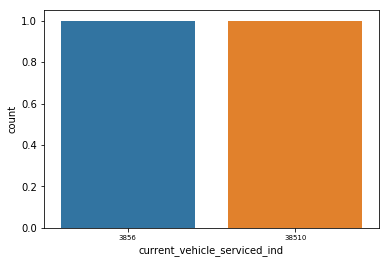

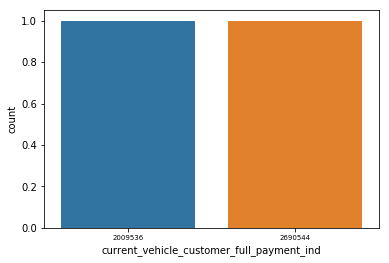

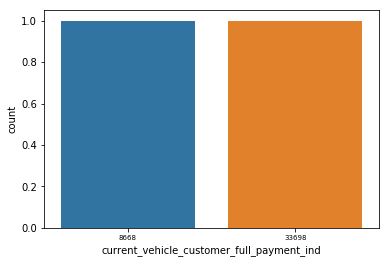

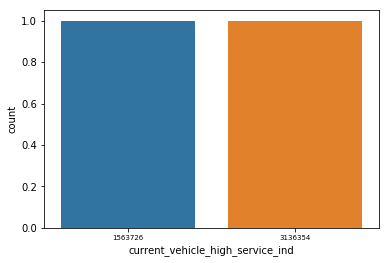

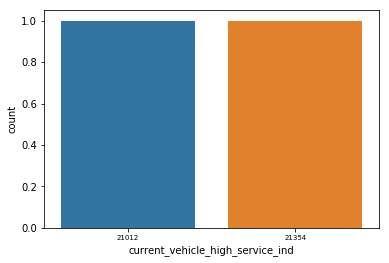

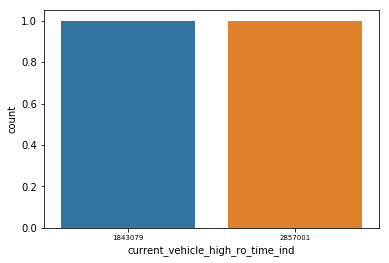

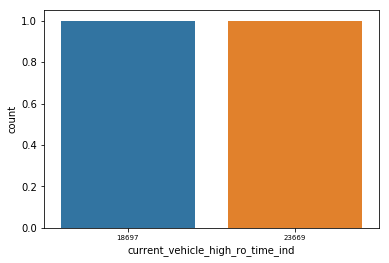

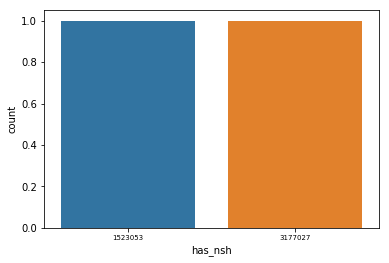

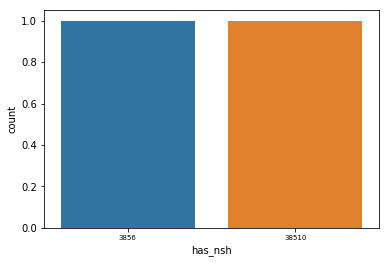

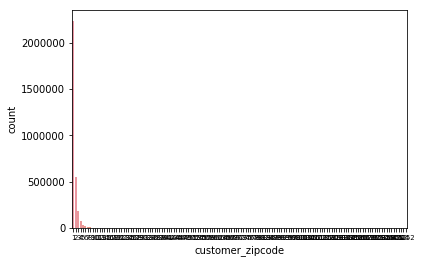

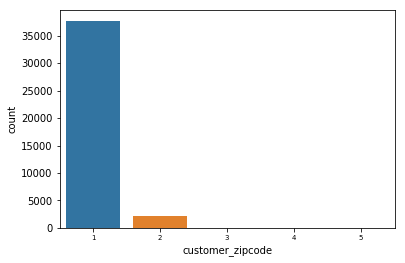

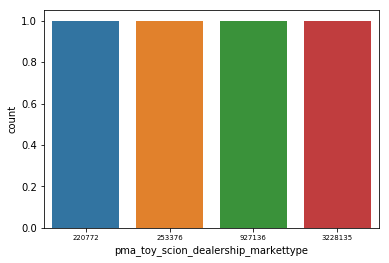

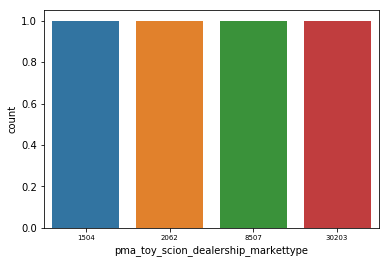

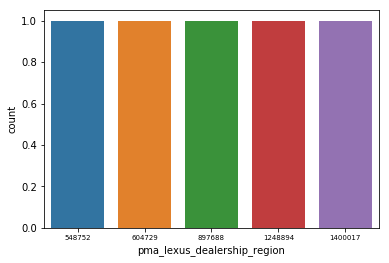

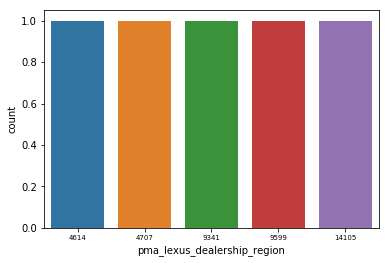

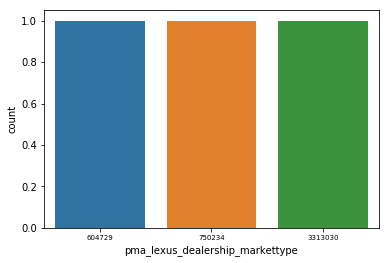

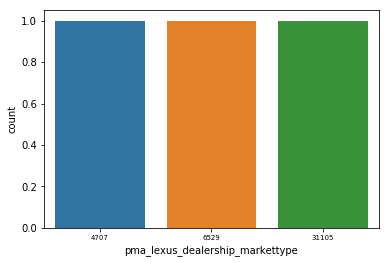

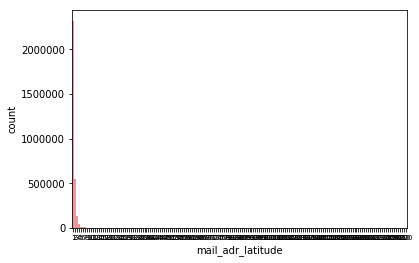

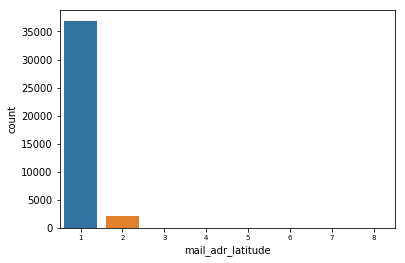

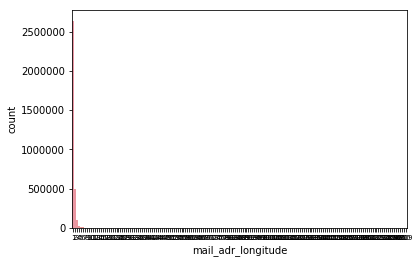

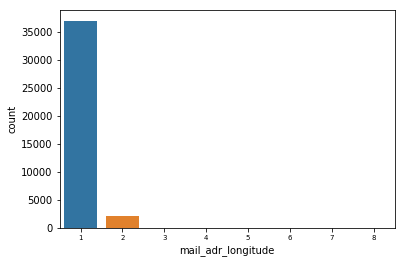

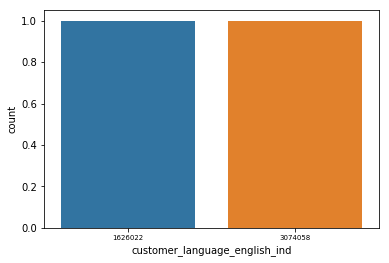

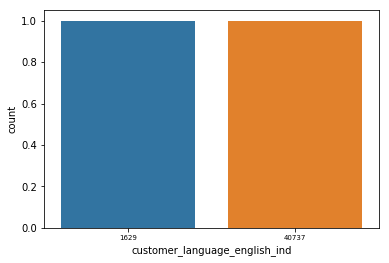

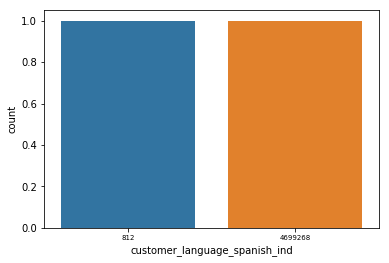

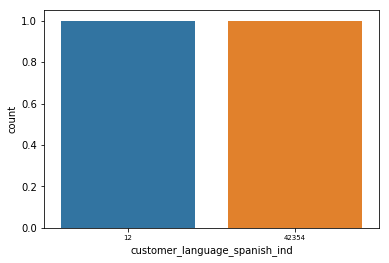

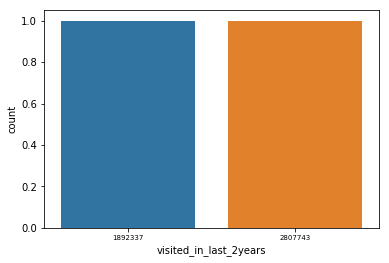

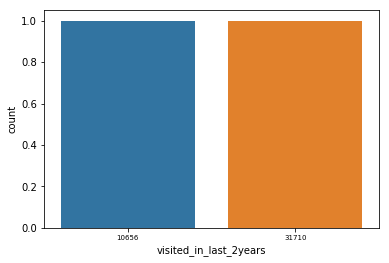

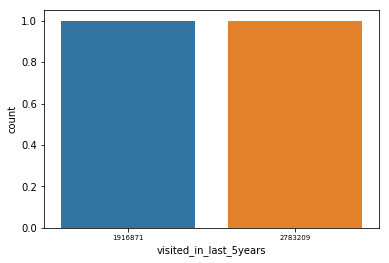

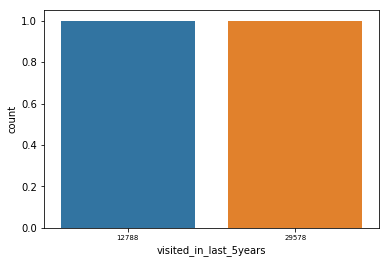

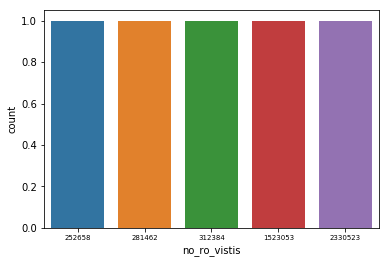

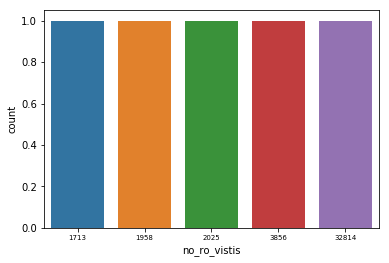

212.82362294197083


In [85]:
start=time.time()
for col in cat_cols:
    sns.countplot(X_casted[col][y==0].value_counts())
    plt.show()
    sns.countplot(X_casted[col][y==1].value_counts())
    plt.show()
print(time.time()-start)    

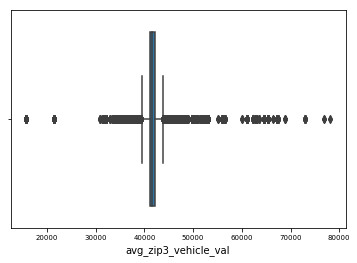

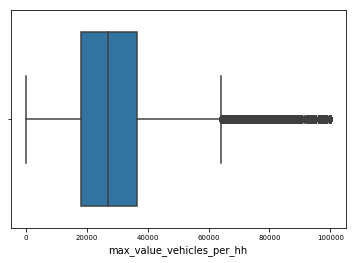

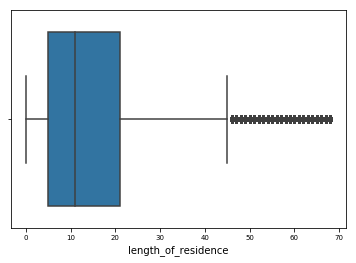

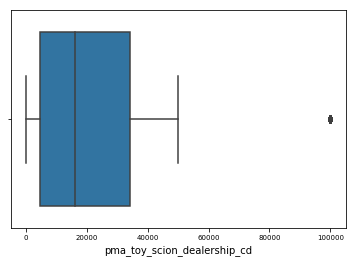

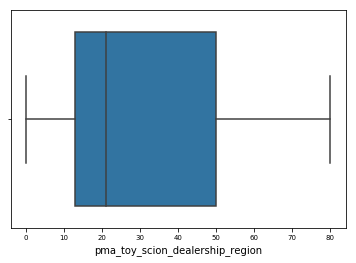

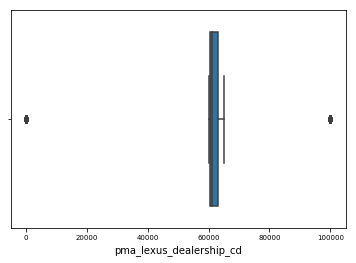

5.262411832809448


In [87]:
start=time.time()
for col_val in num_cols:

    sns.boxplot(X_casted[col_val])
    plt.show()

print(time.time() -start)

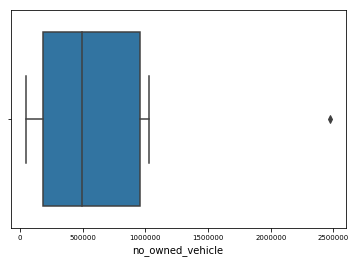

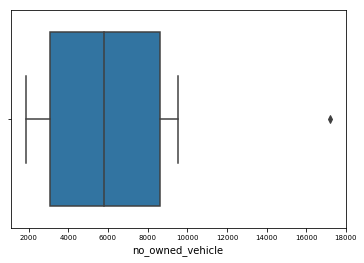

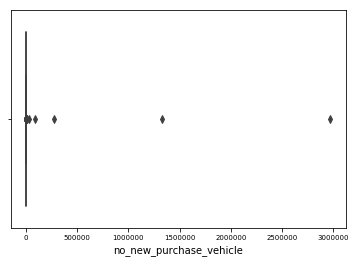

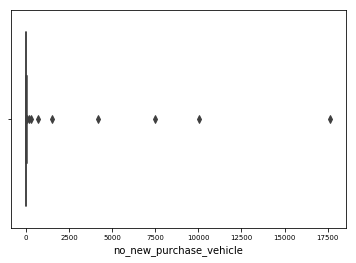

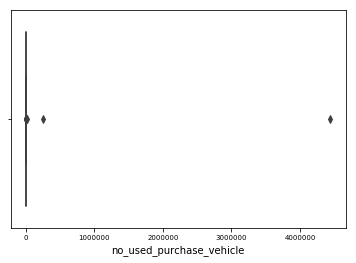

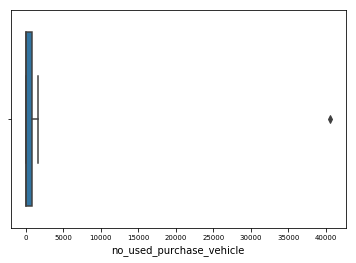

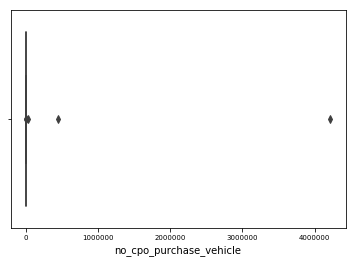

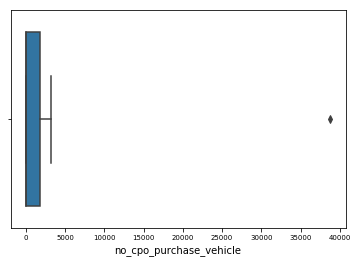

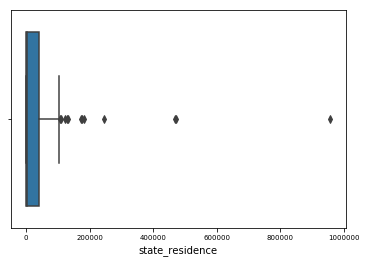

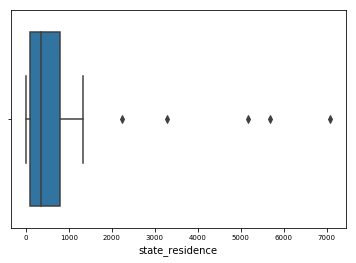

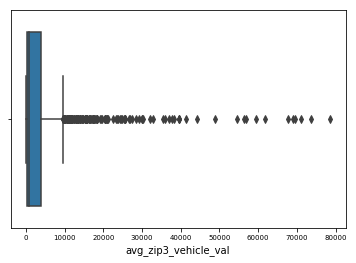

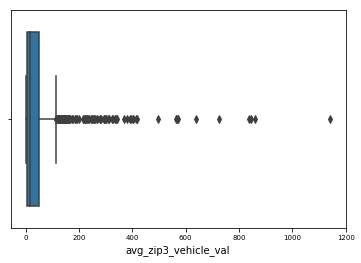

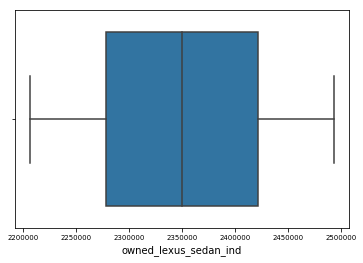

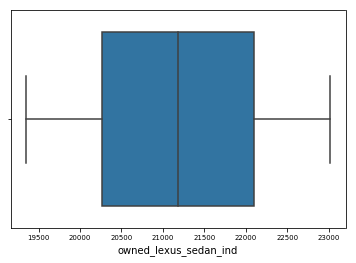

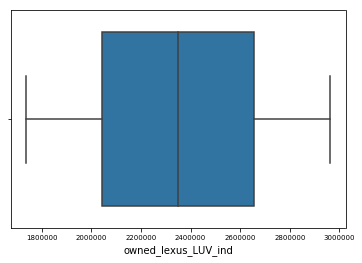

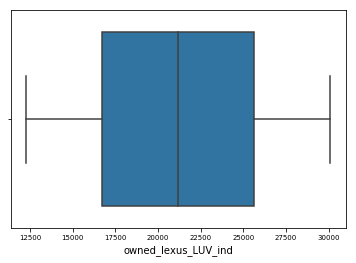

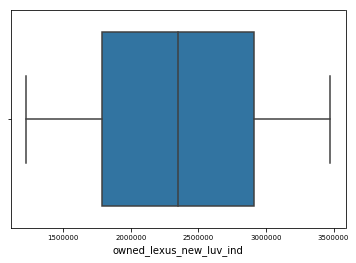

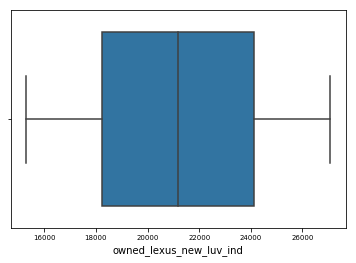

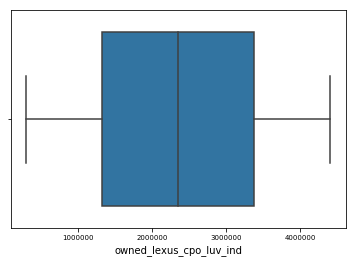

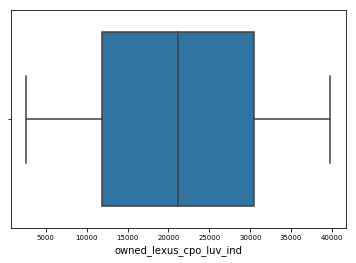

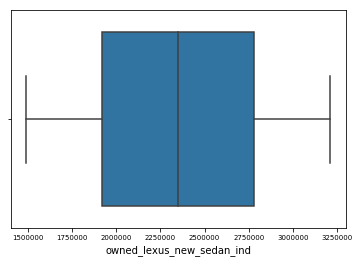

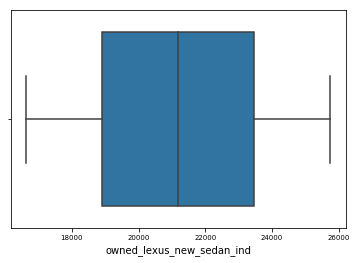

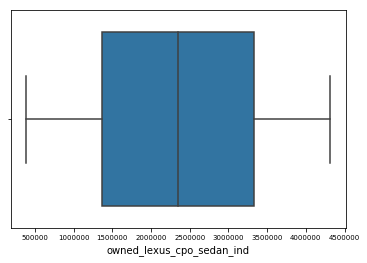

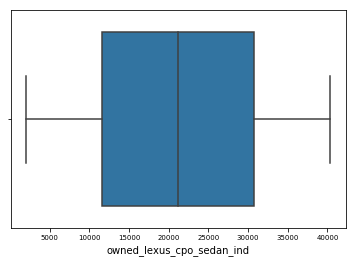

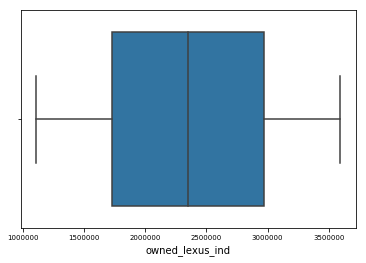

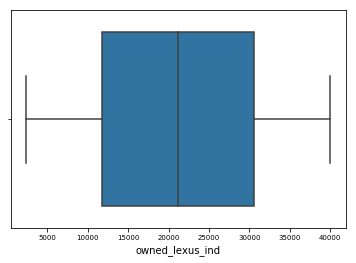

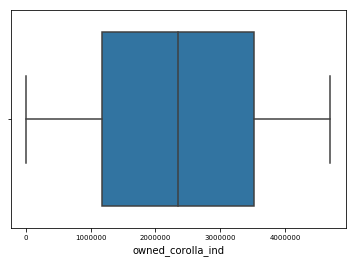

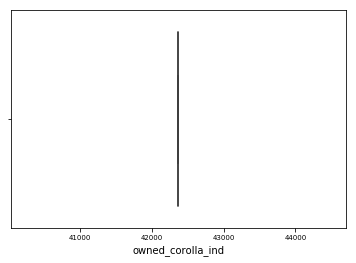

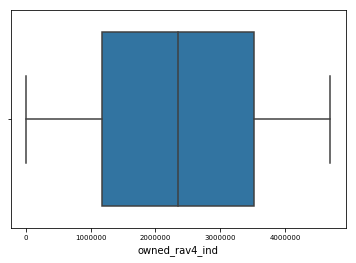

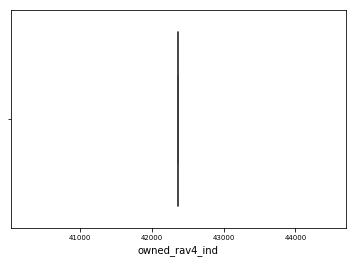

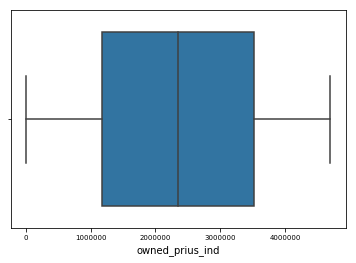

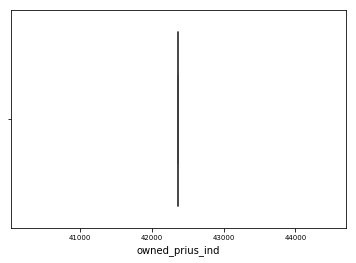

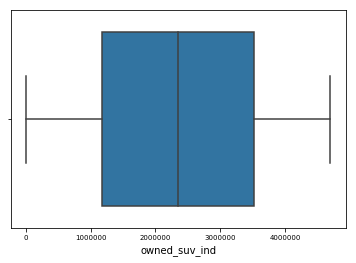

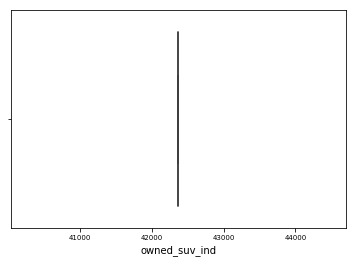

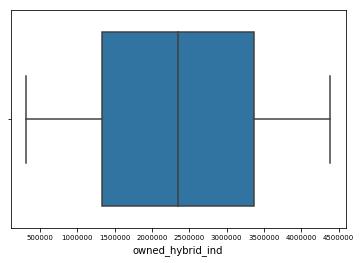

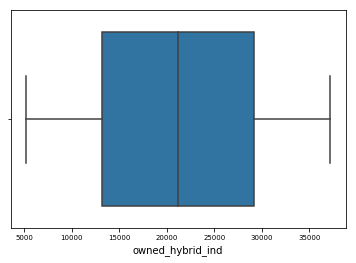

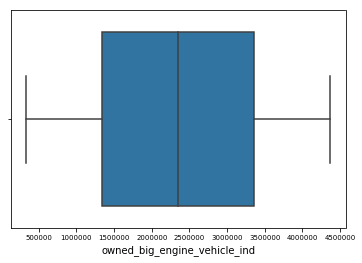

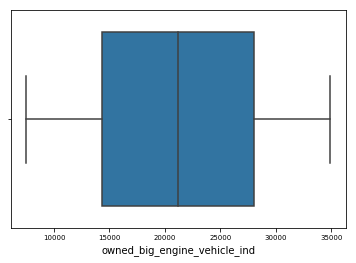

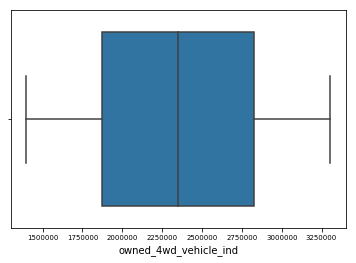

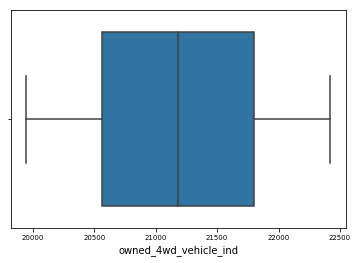

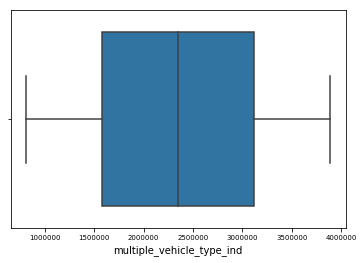

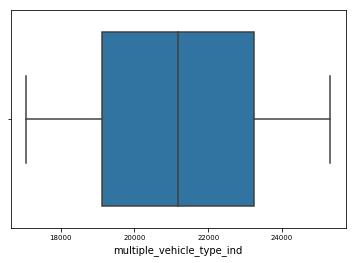

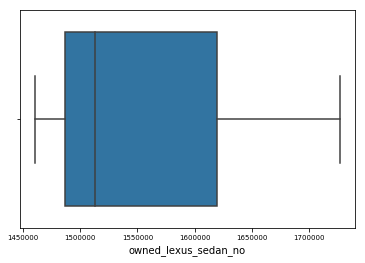

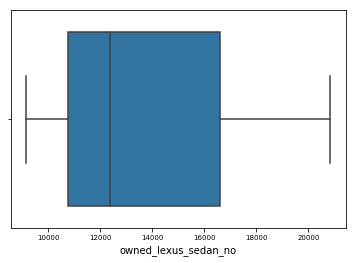

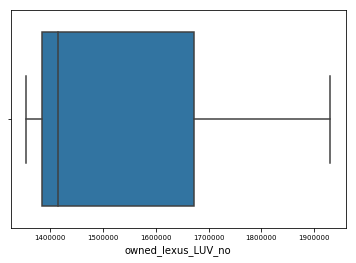

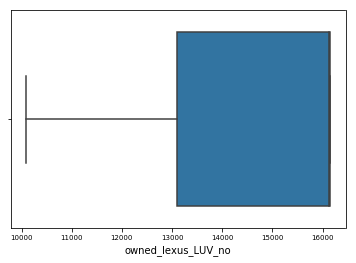

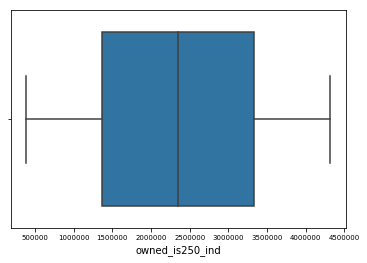

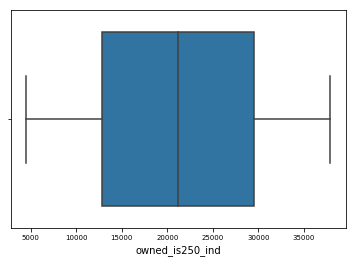

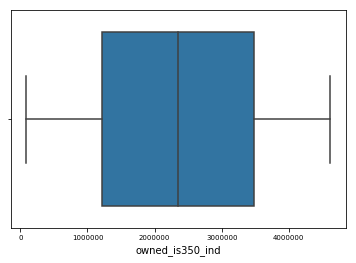

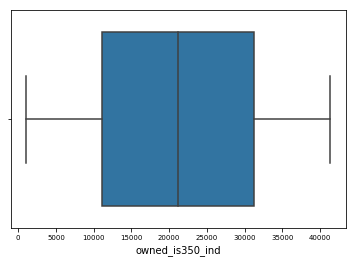

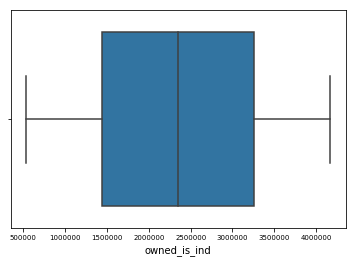

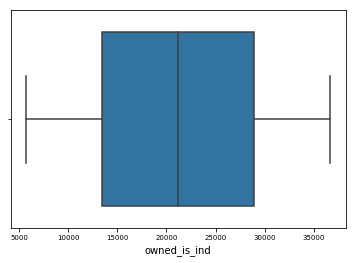

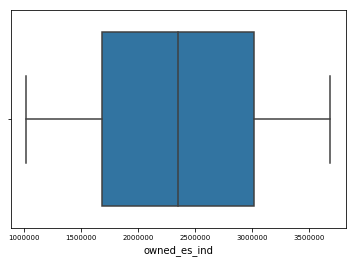

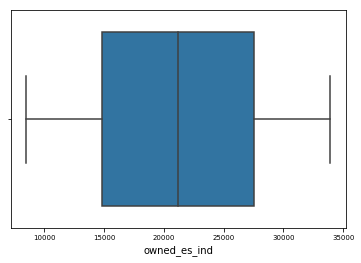

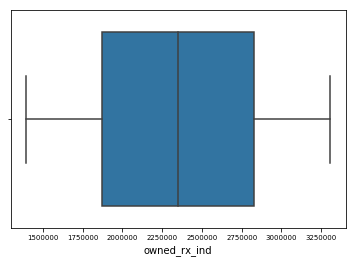

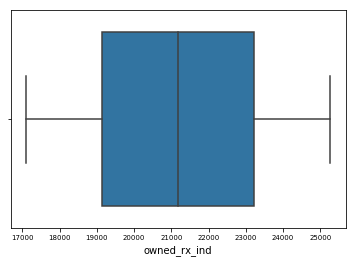

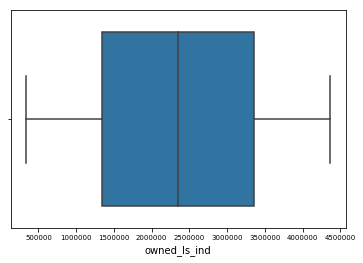

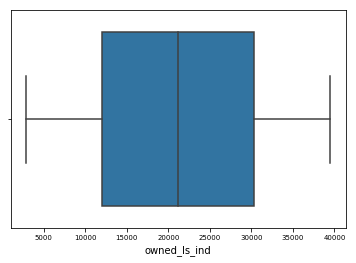

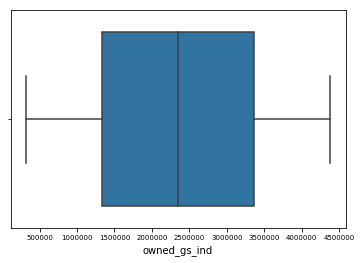

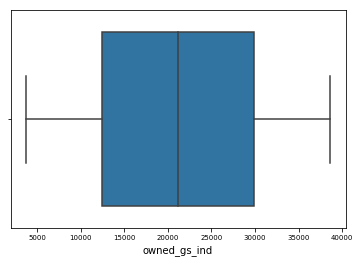

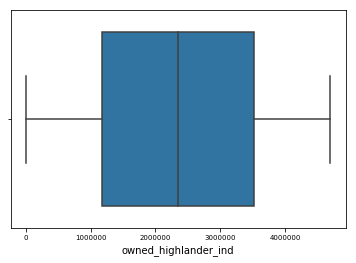

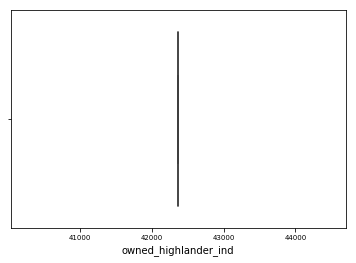

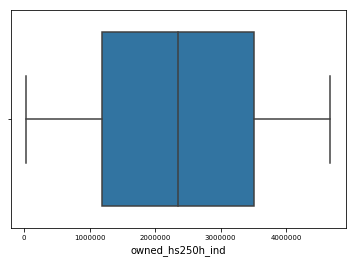

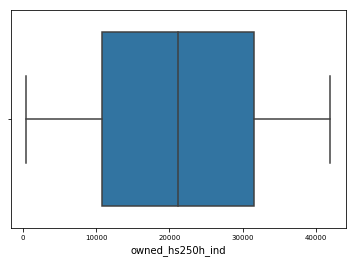

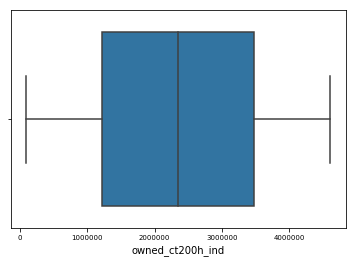

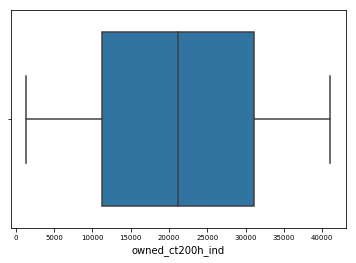

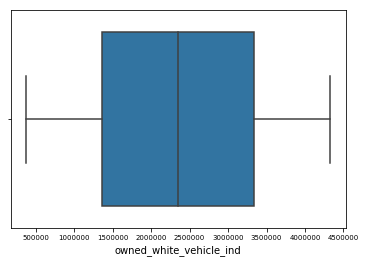

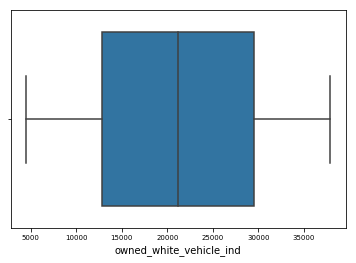

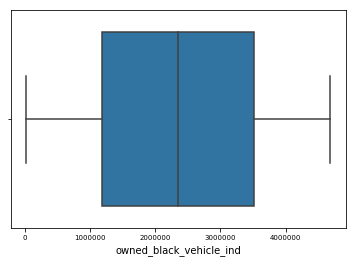

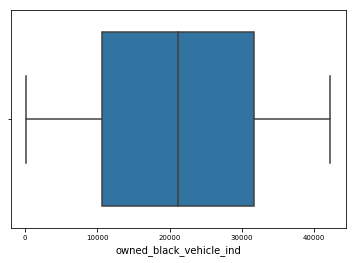

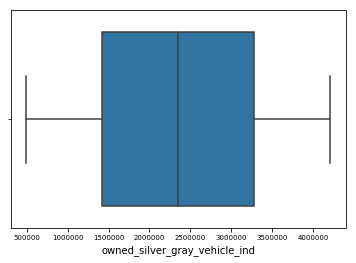

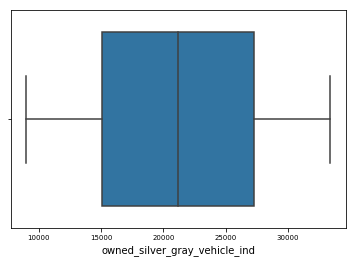

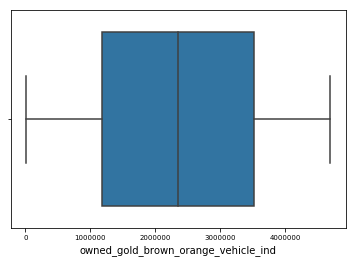

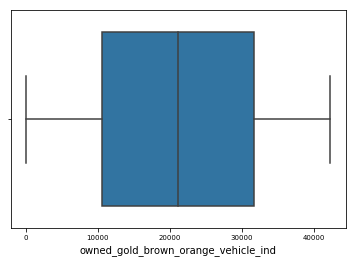

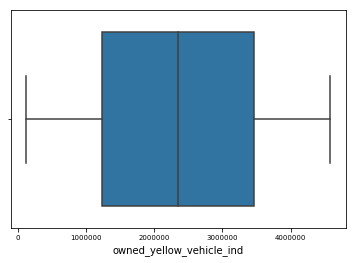

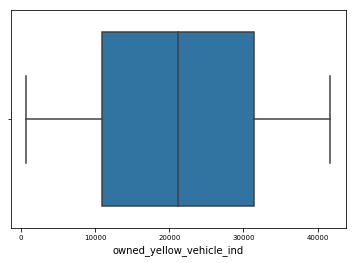

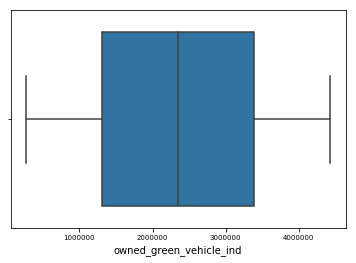

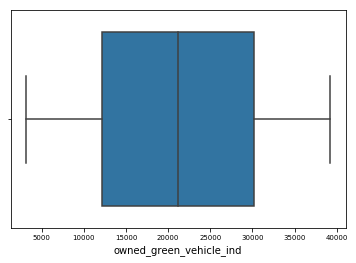

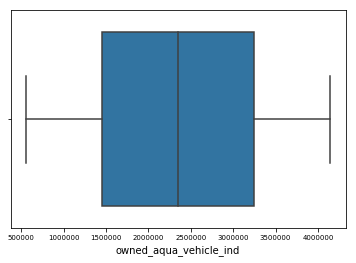

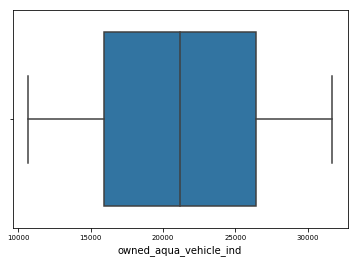

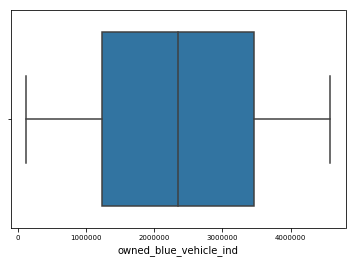

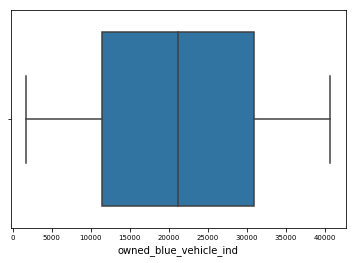

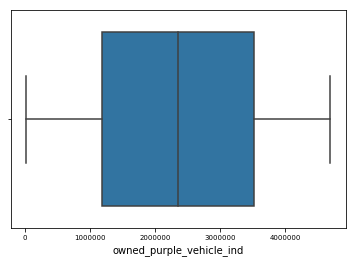

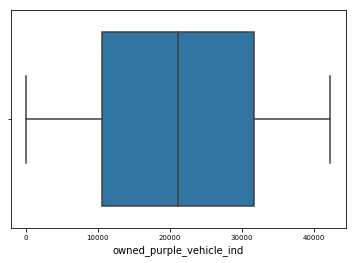

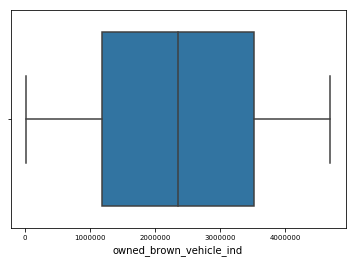

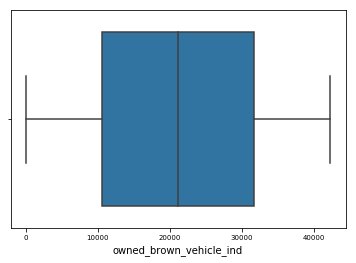

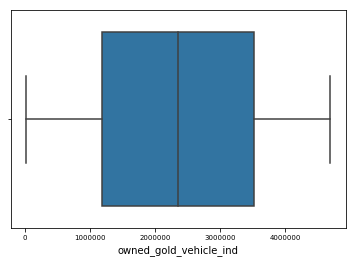

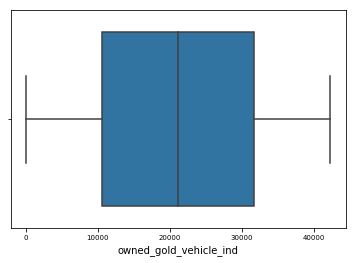

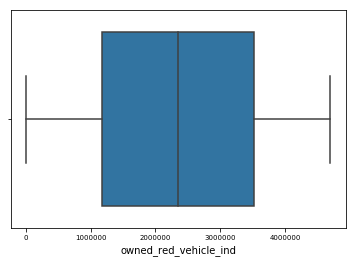

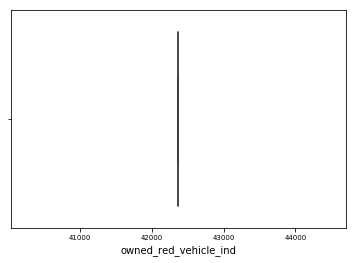

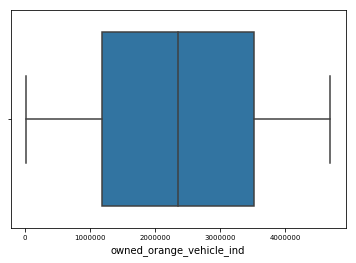

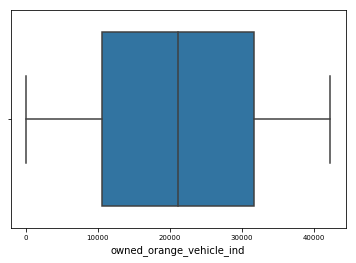

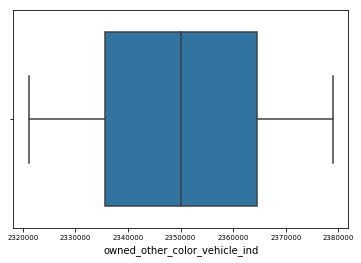

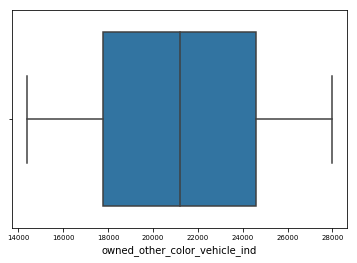

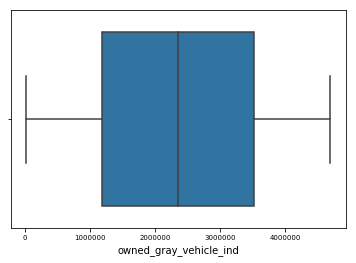

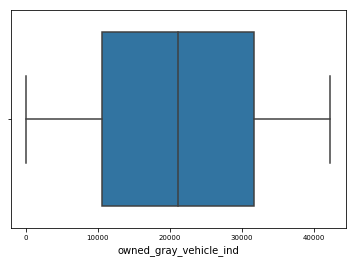

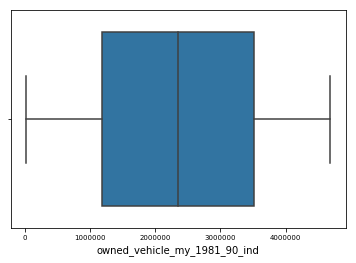

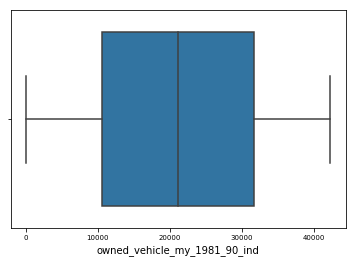

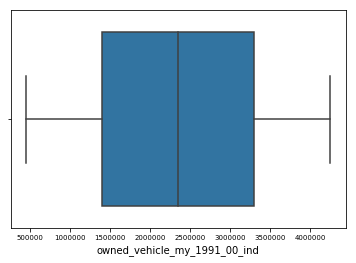

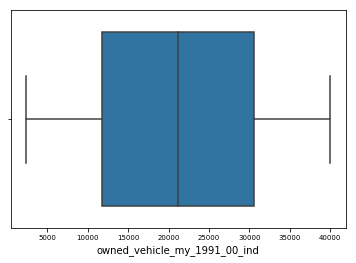

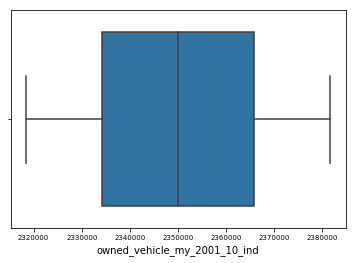

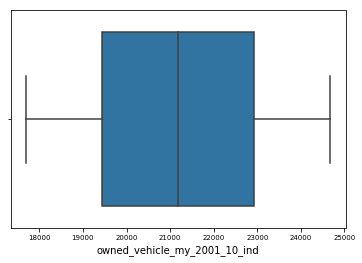

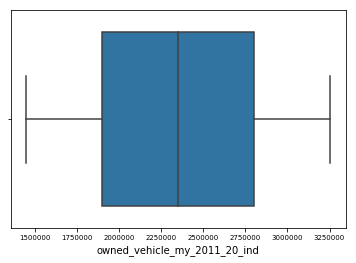

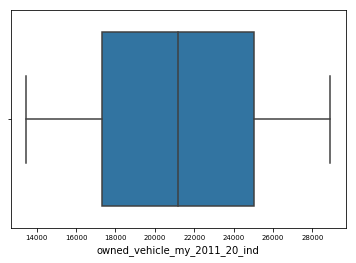

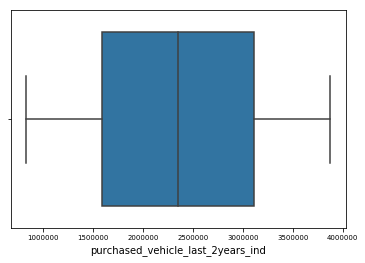

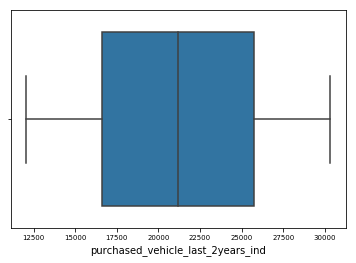

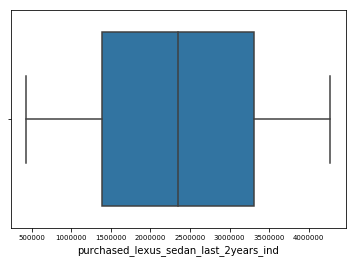

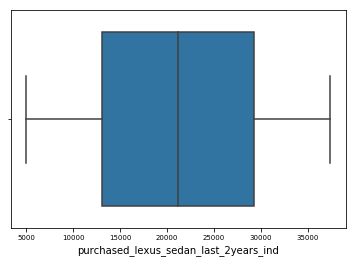

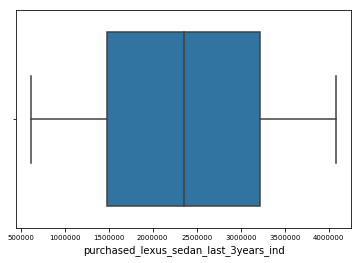

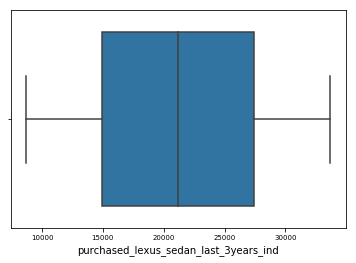

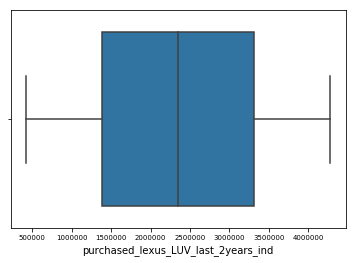

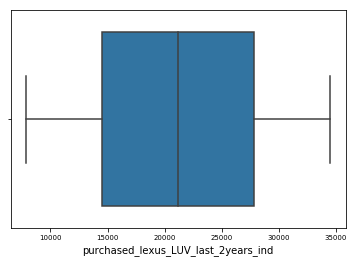

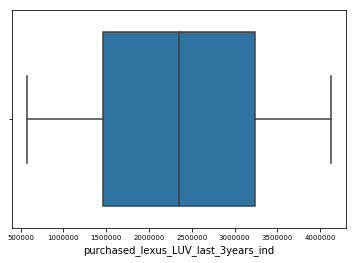

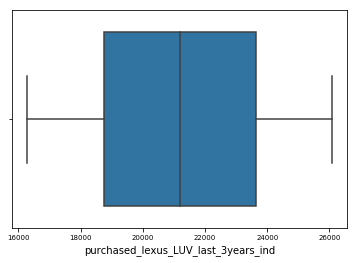

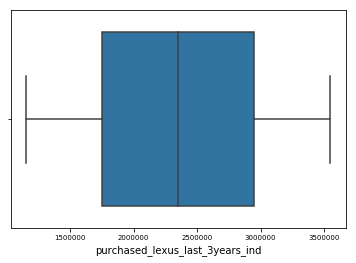

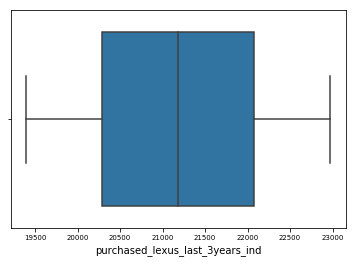

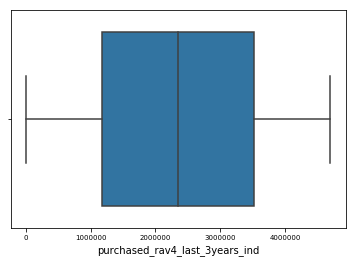

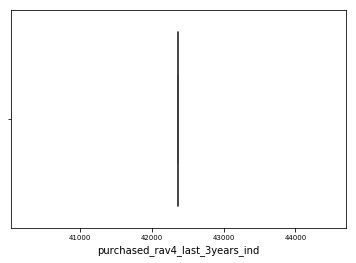

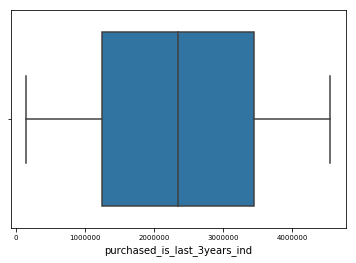

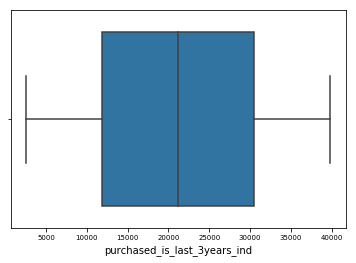

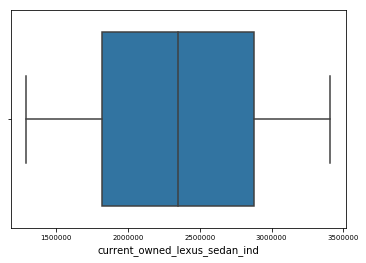

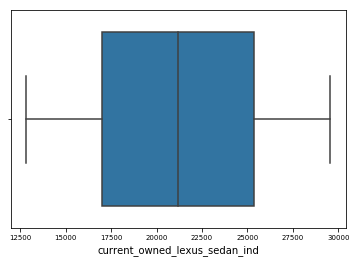

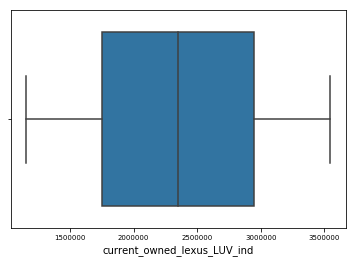

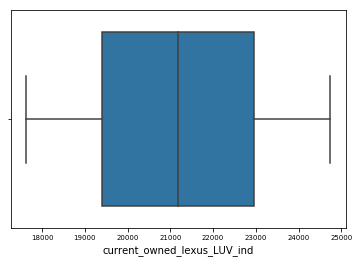

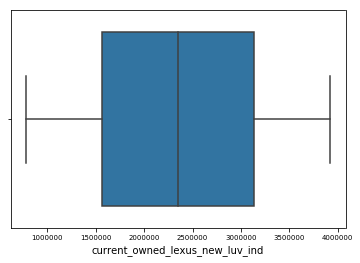

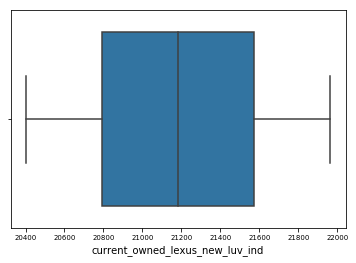

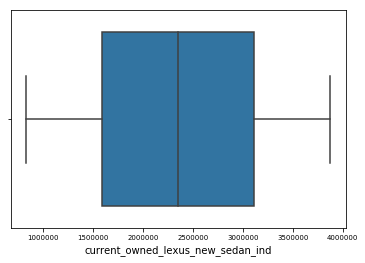

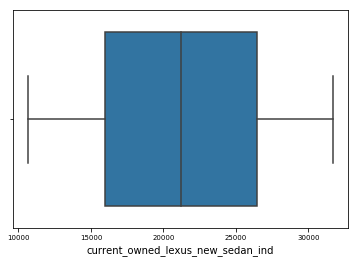

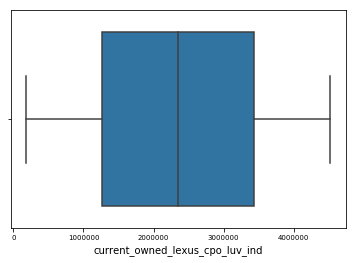

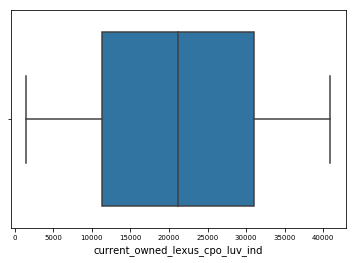

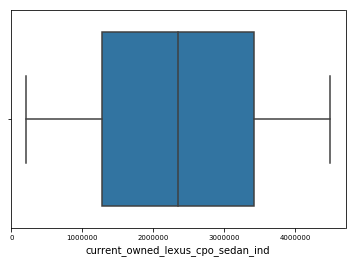

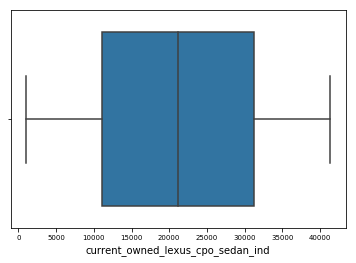

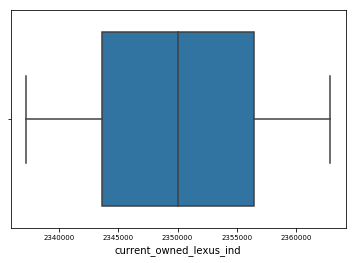

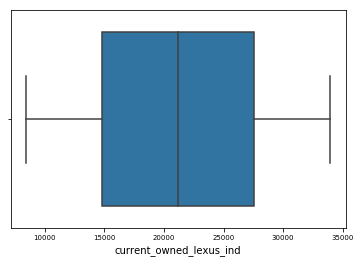

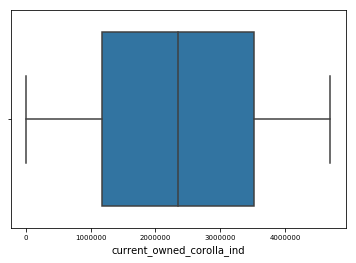

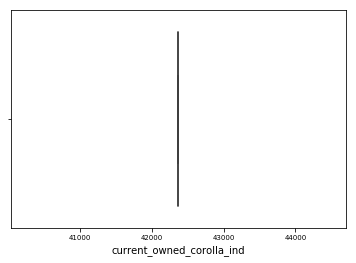

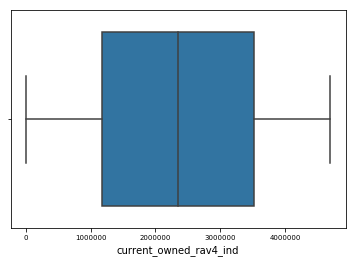

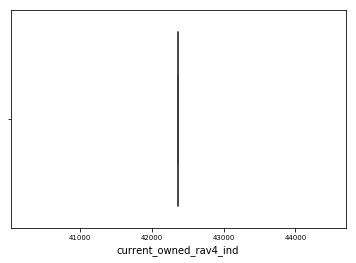

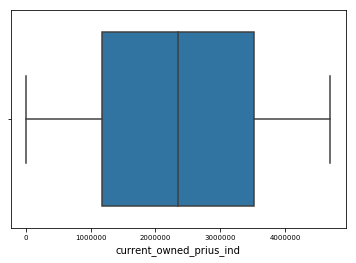

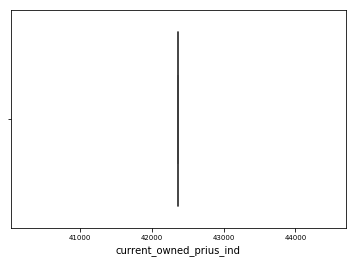

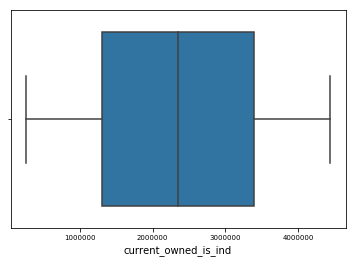

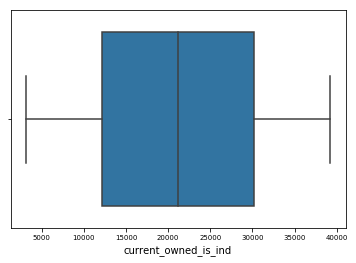

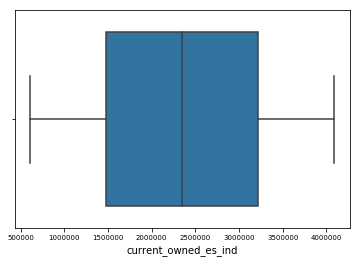

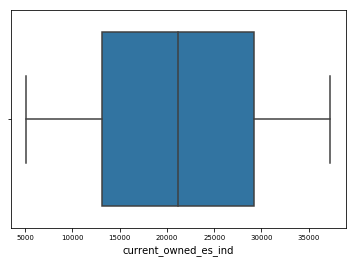

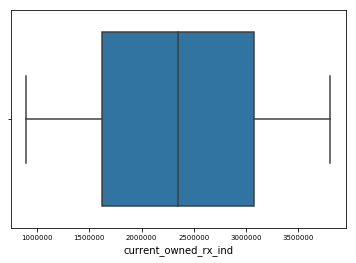

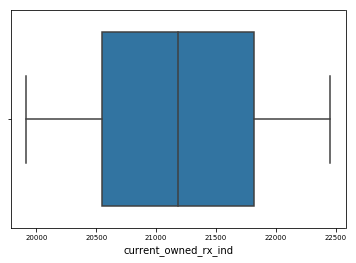

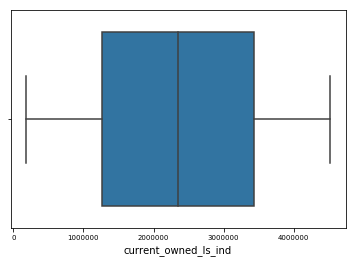

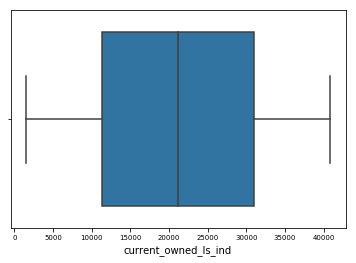

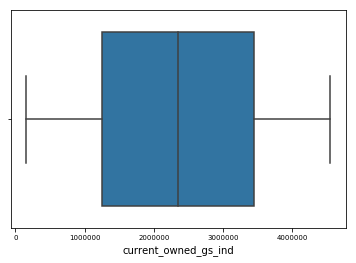

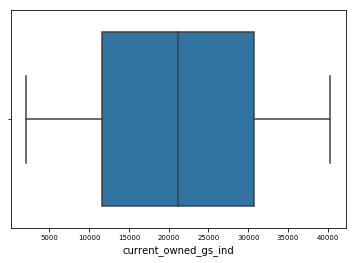

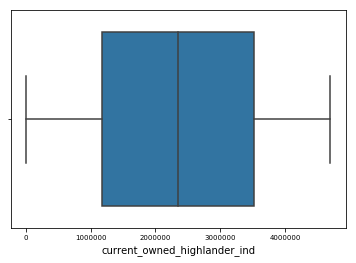

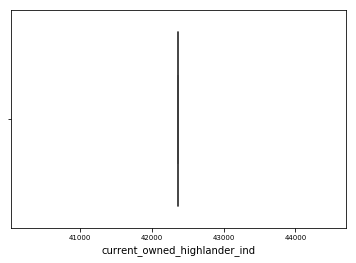

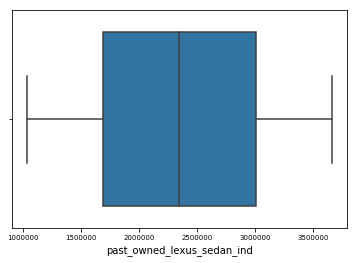

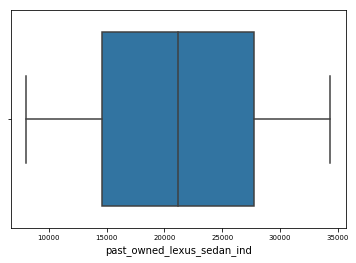

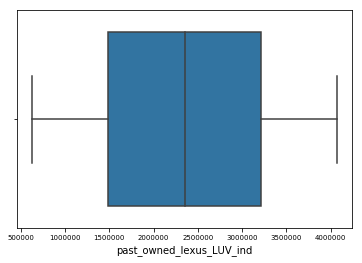

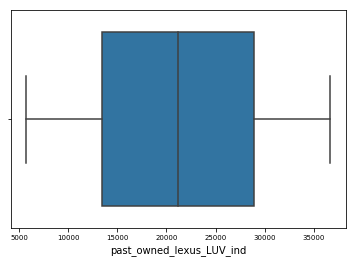

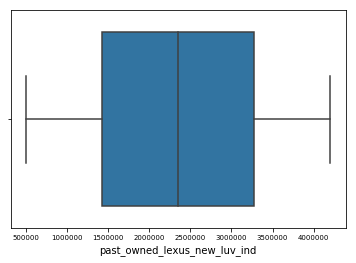

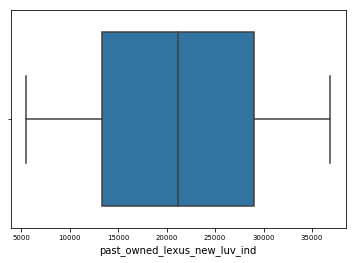

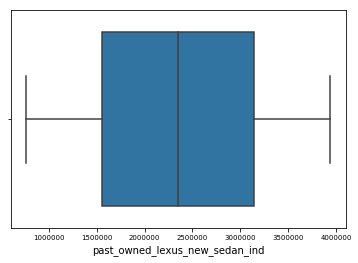

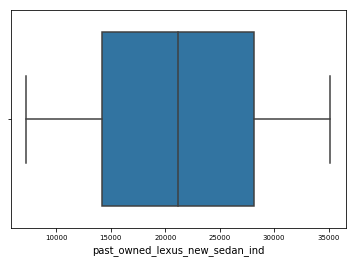

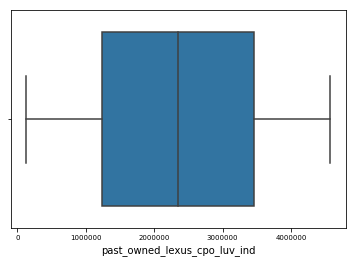

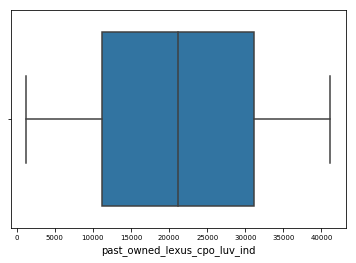

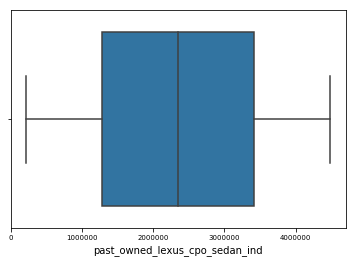

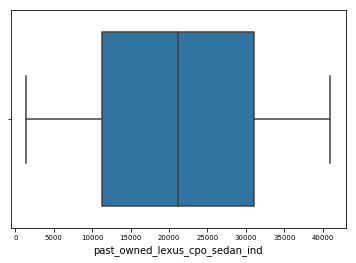

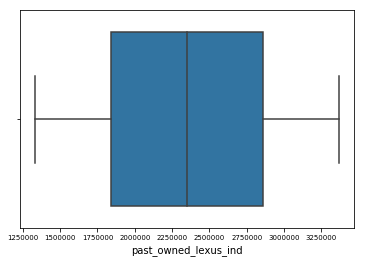

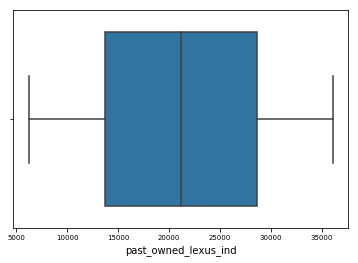

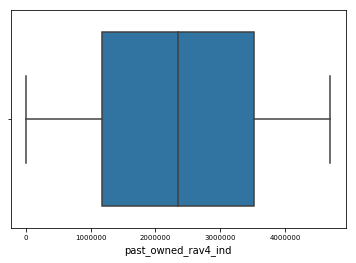

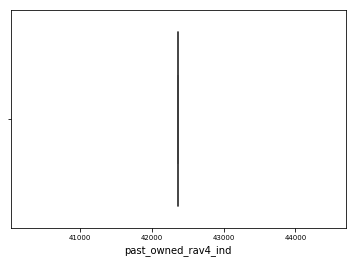

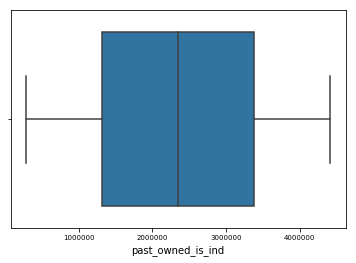

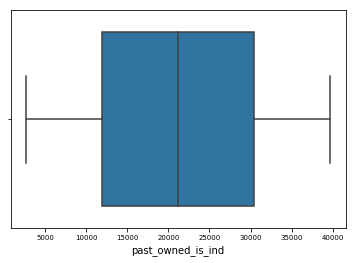

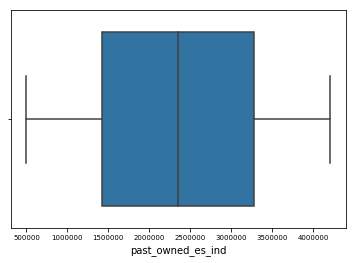

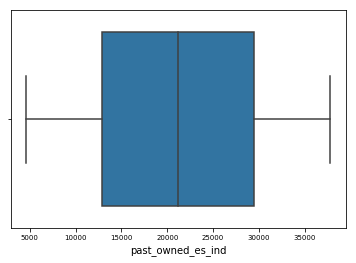

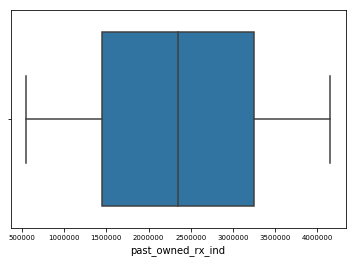

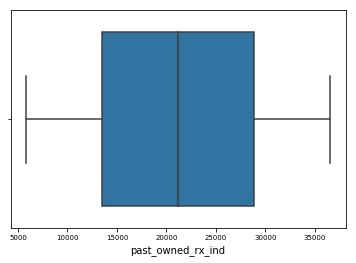

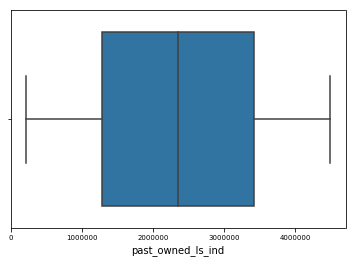

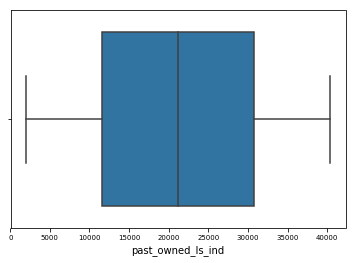

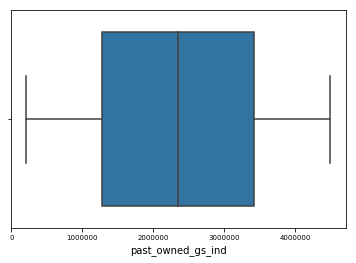

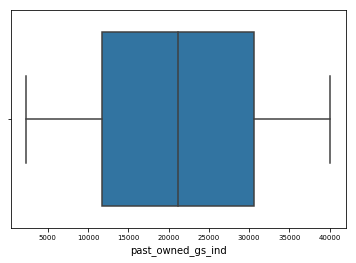

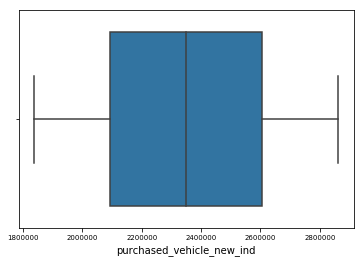

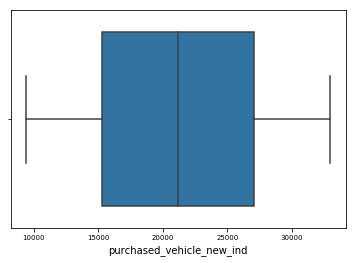

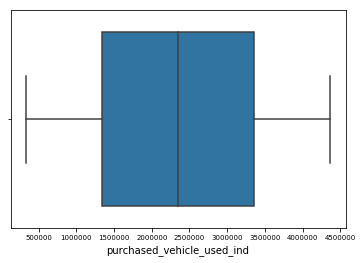

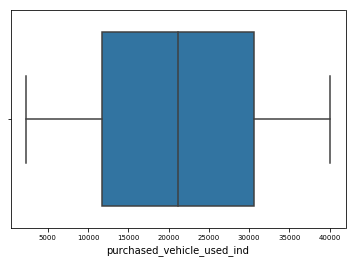

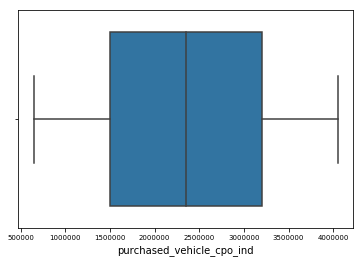

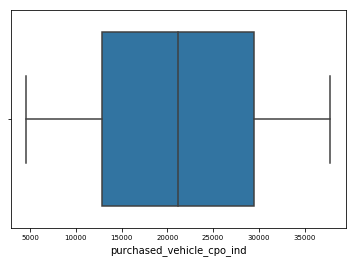

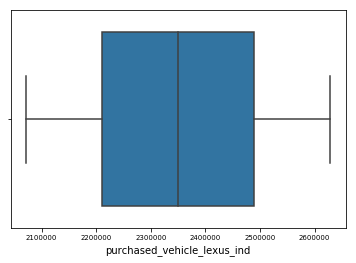

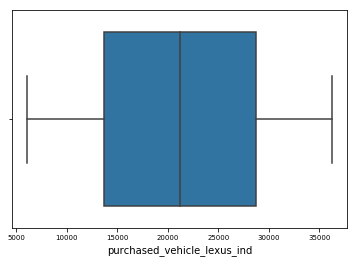

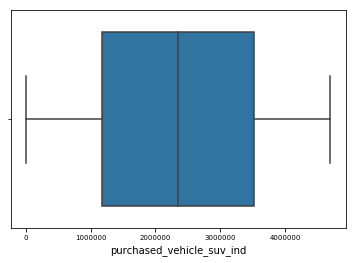

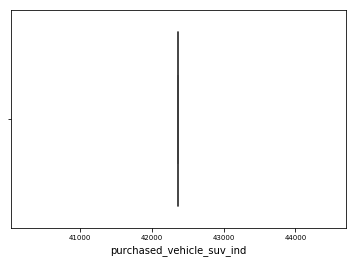

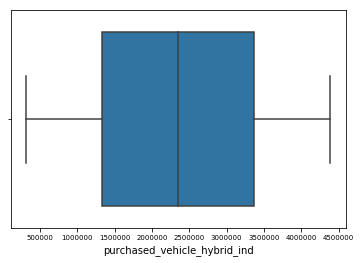

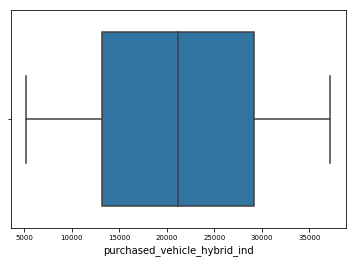

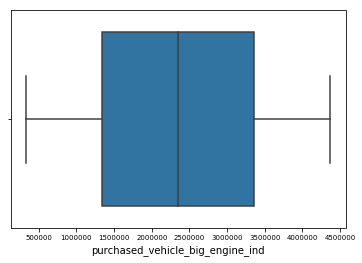

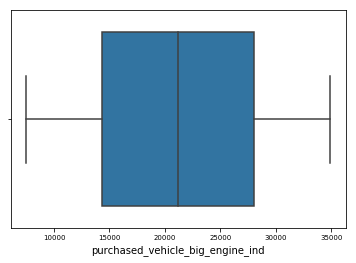

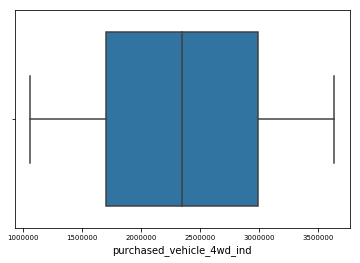

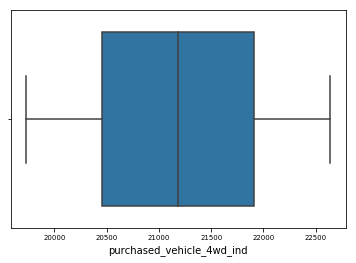

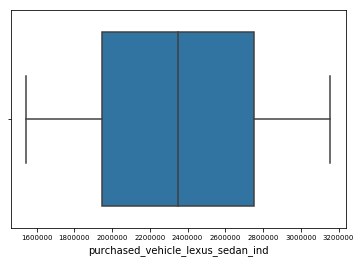

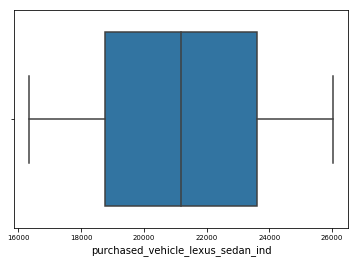

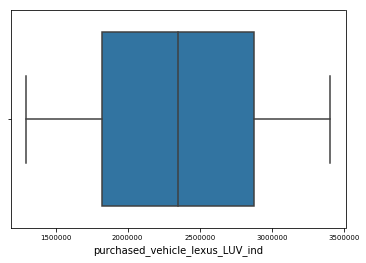

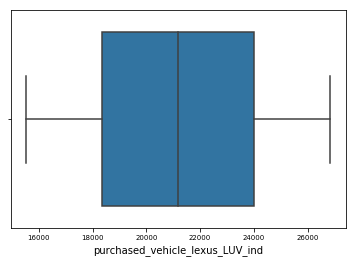

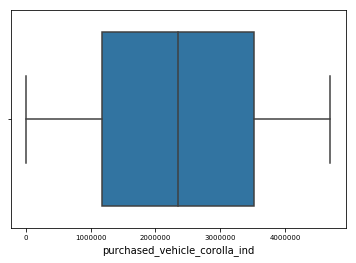

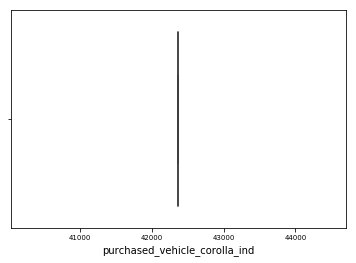

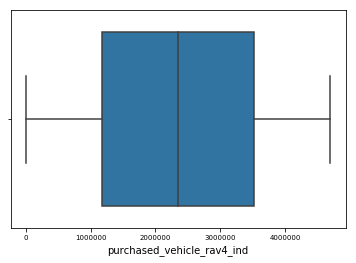

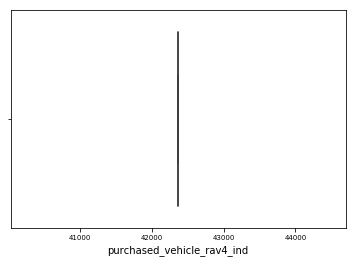

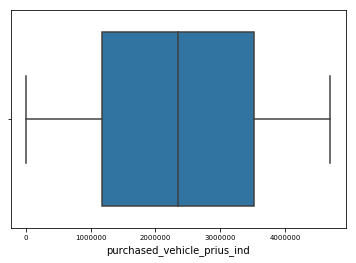

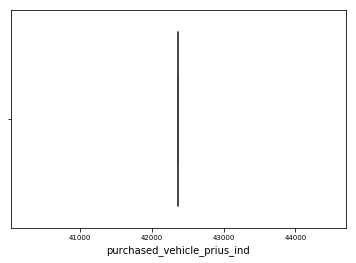

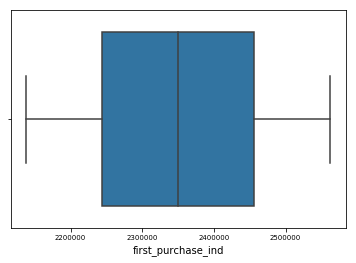

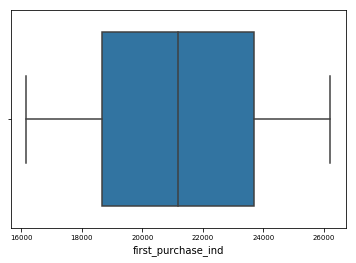

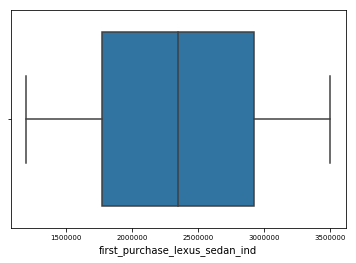

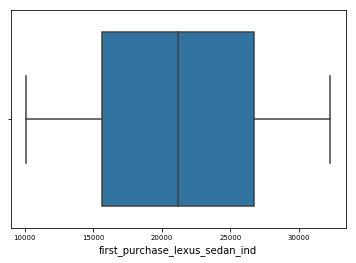

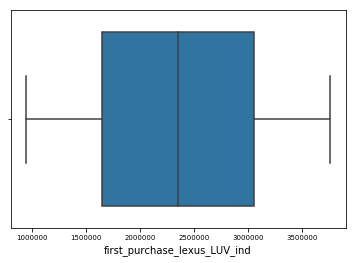

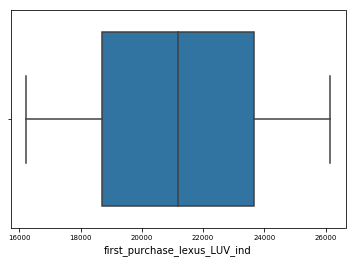

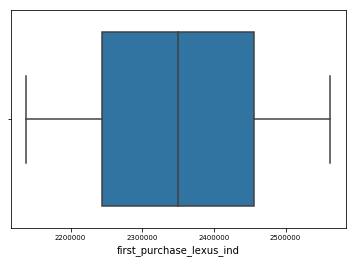

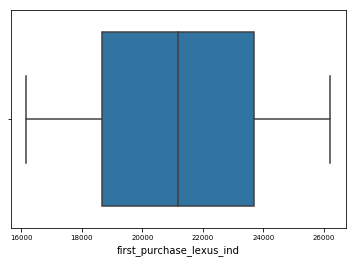

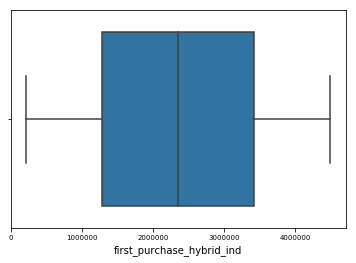

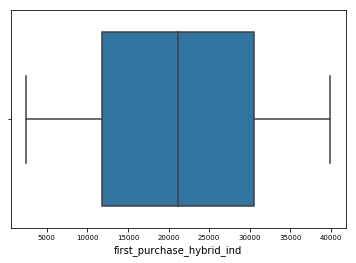

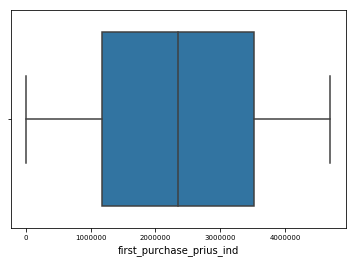

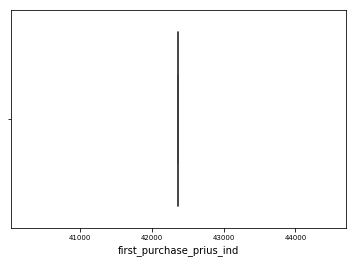

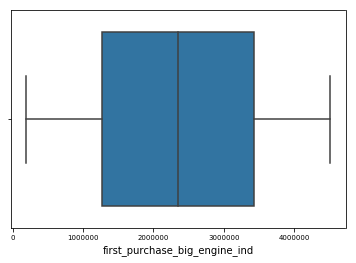

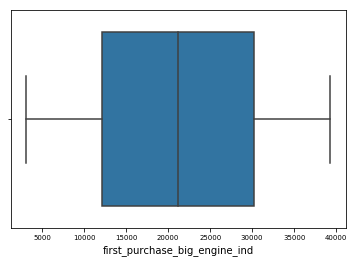

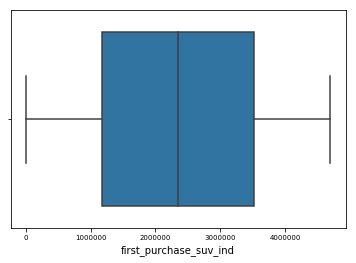

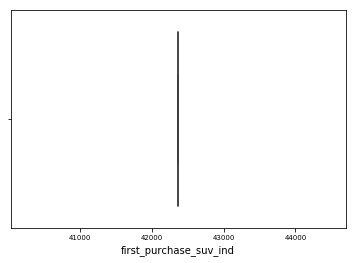

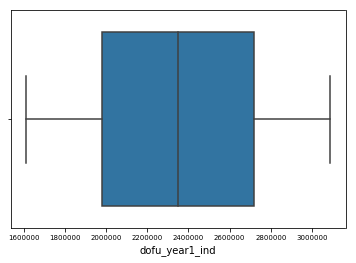

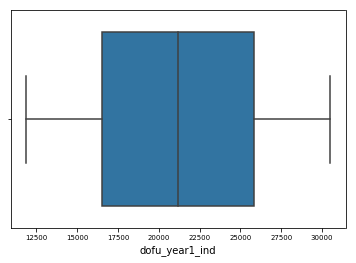

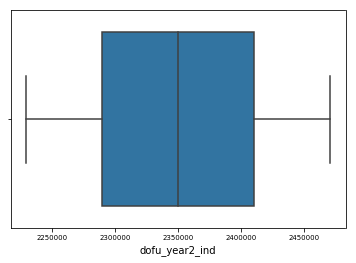

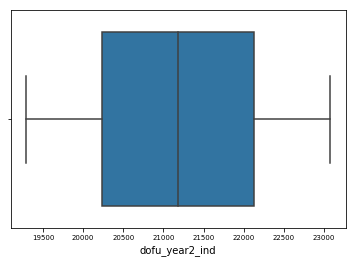

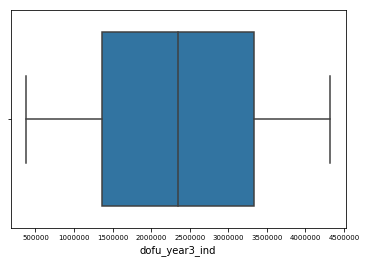

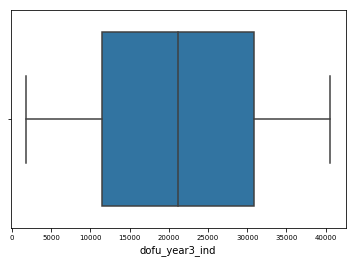

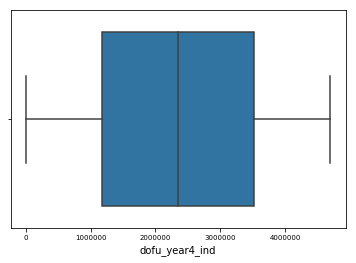

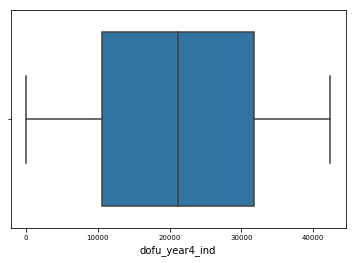

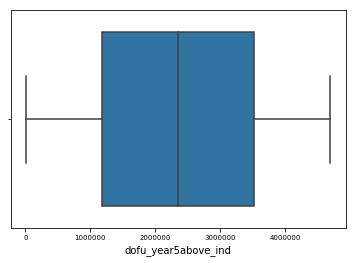

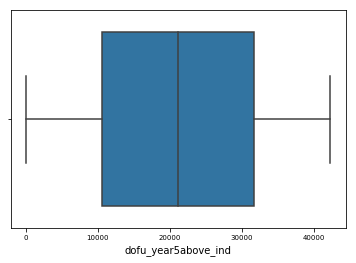

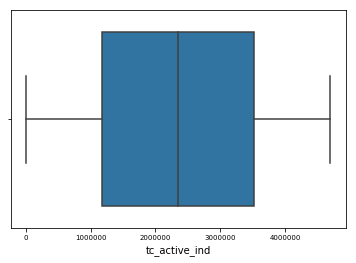

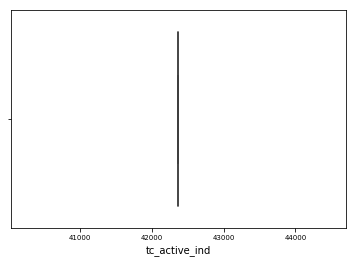

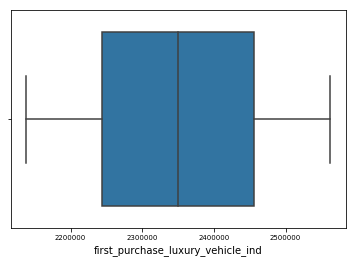

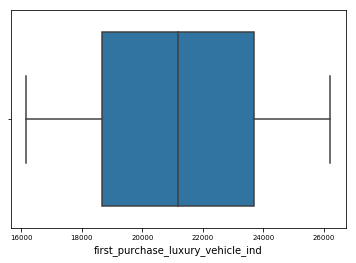

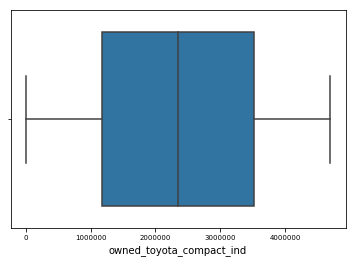

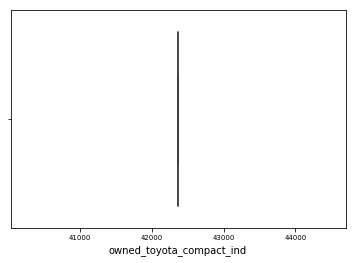

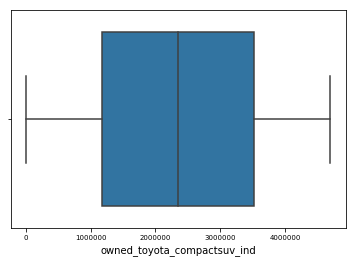

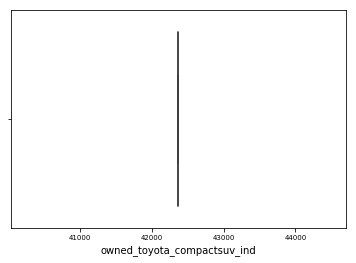

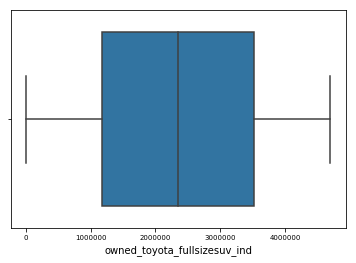

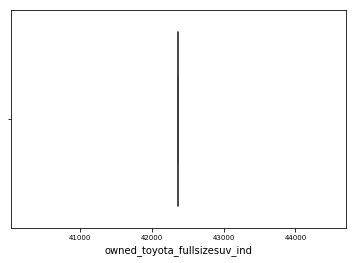

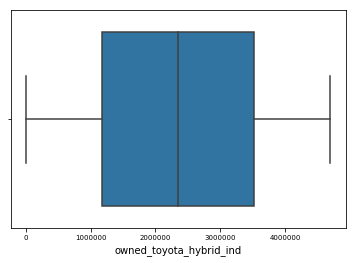

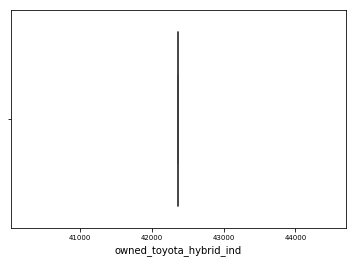

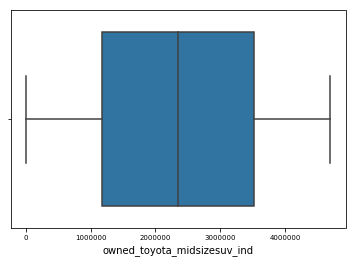

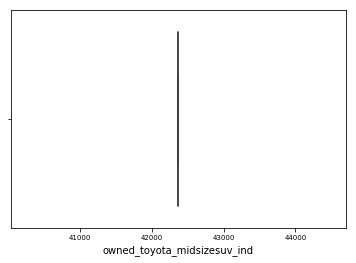

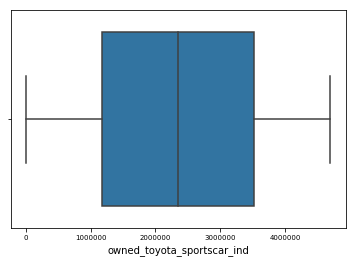

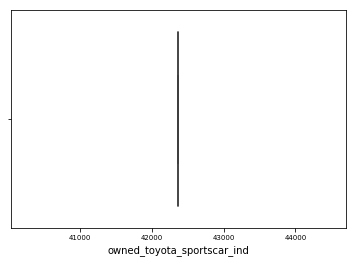

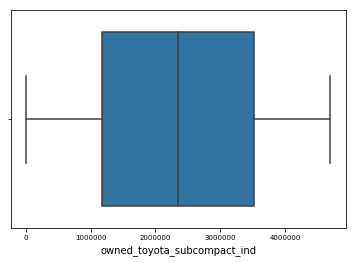

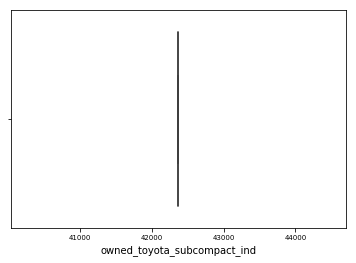

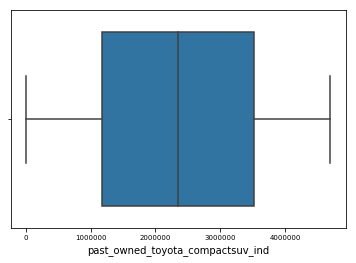

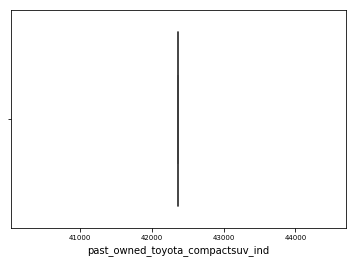

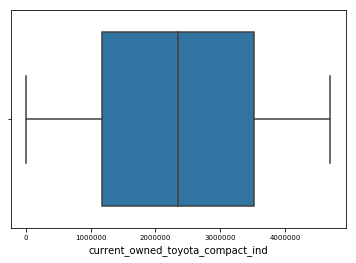

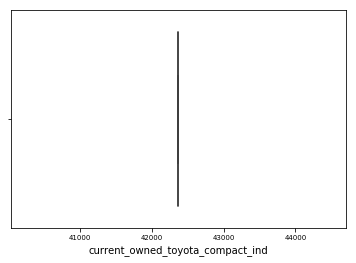

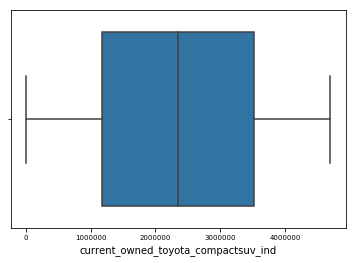

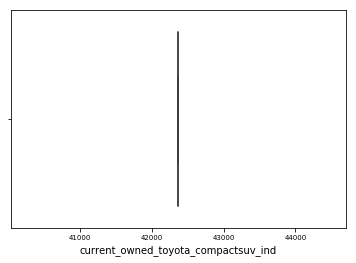

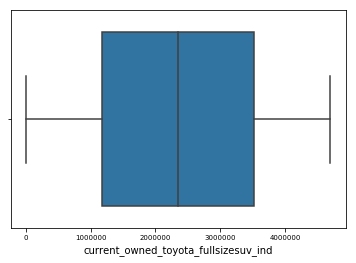

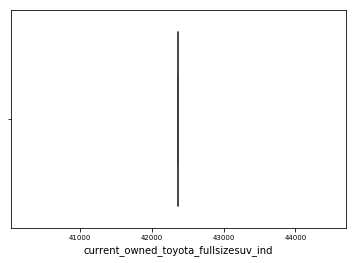

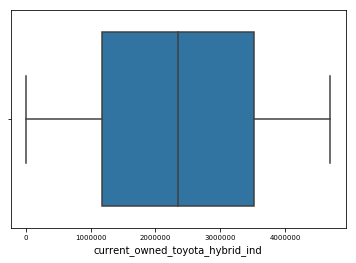

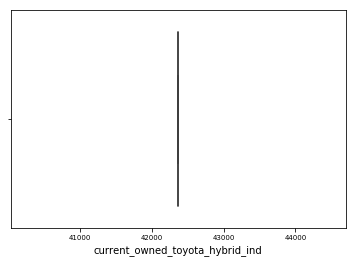

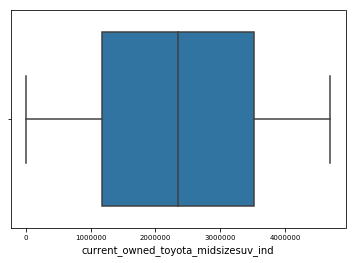

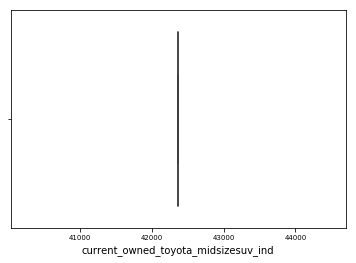

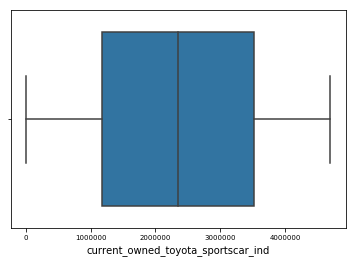

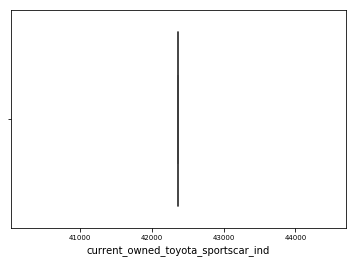

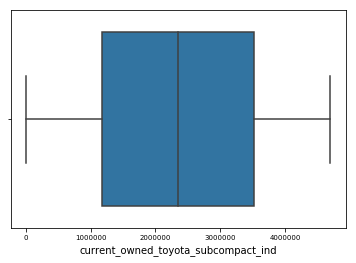

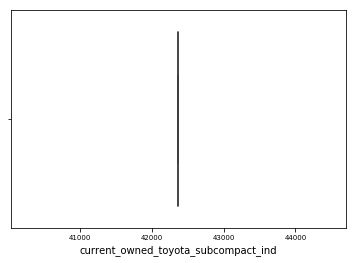

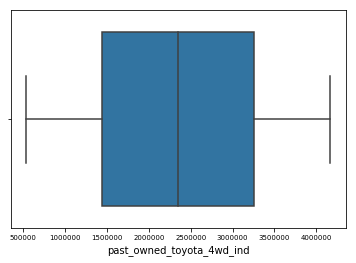

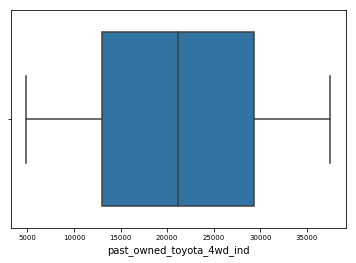

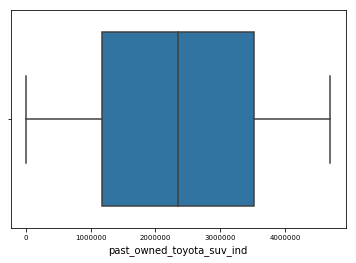

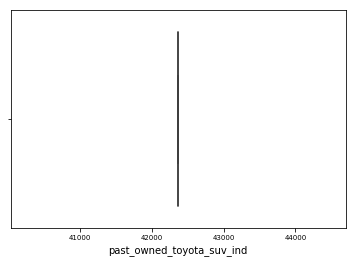

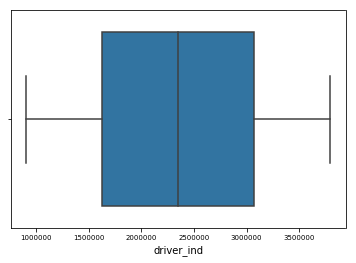

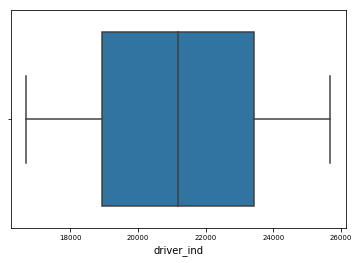

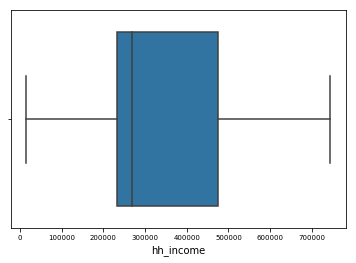

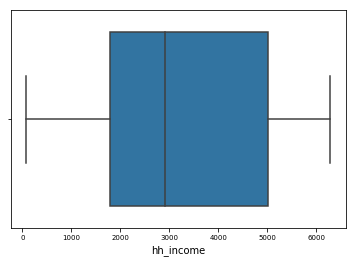

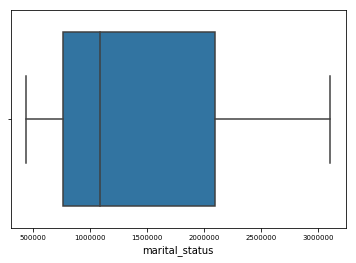

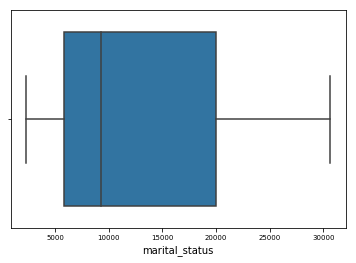

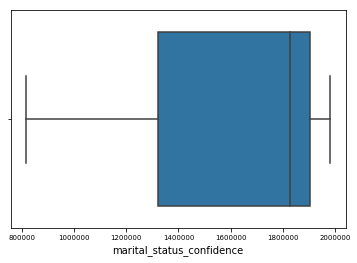

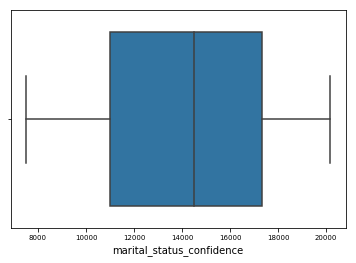

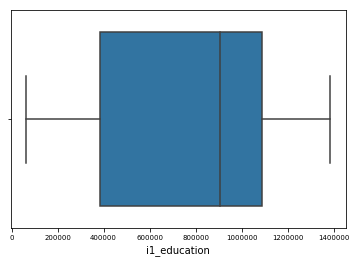

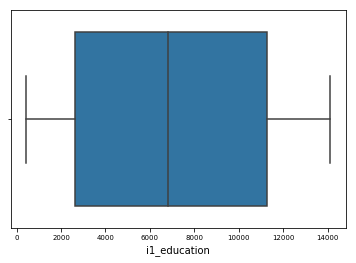

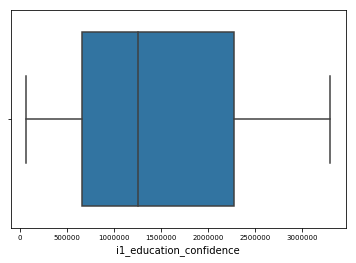

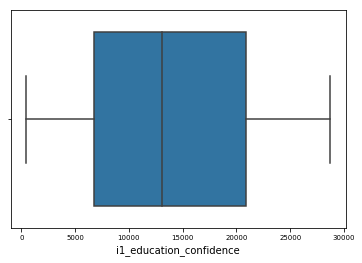

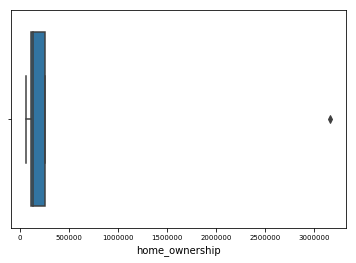

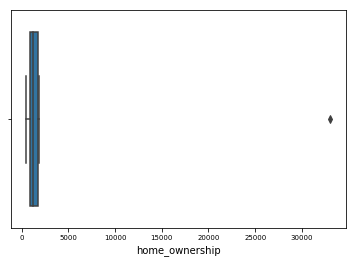

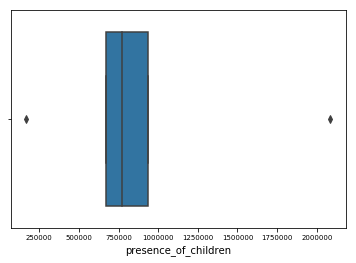

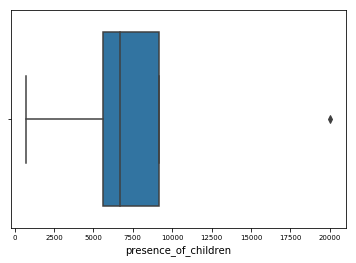

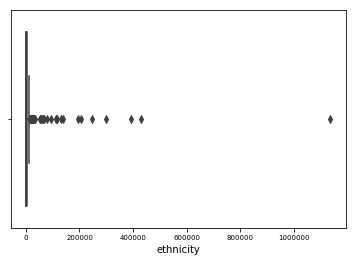

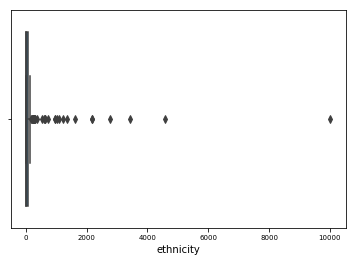

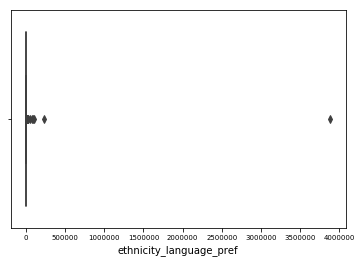

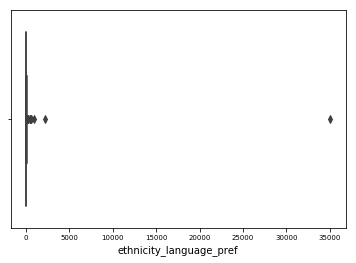

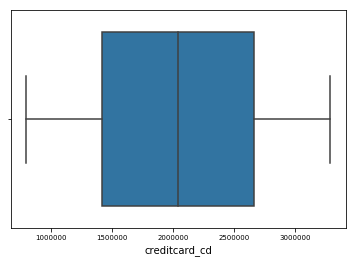

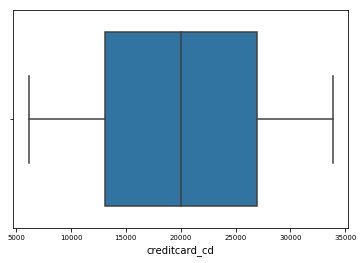

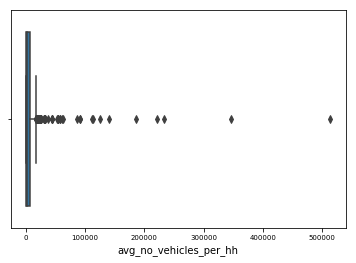

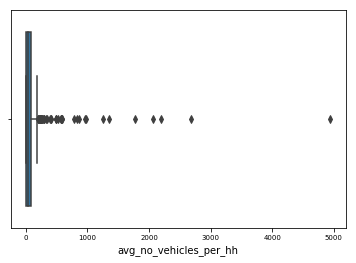

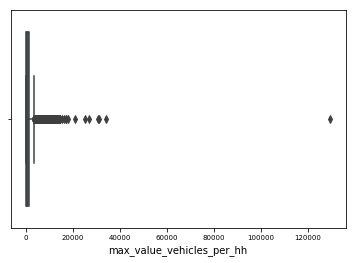

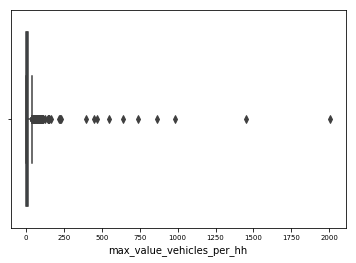

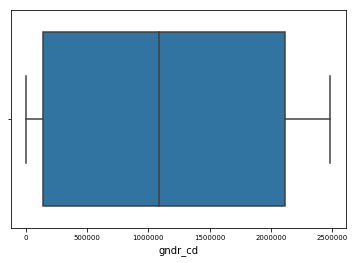

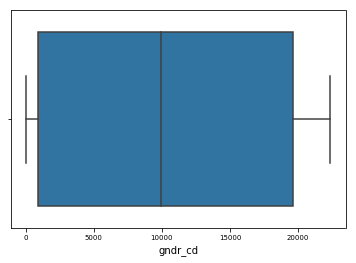

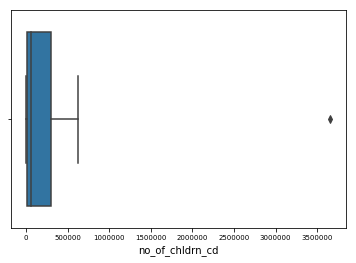

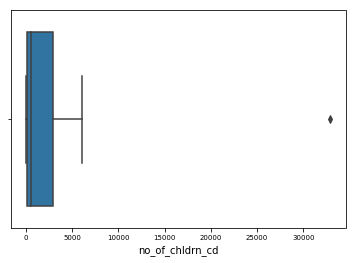

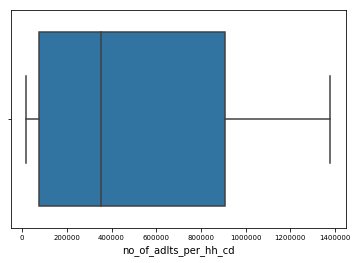

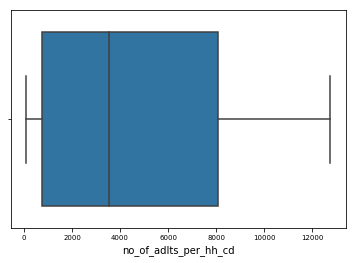

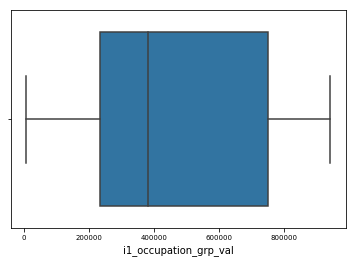

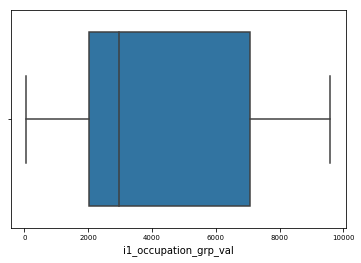

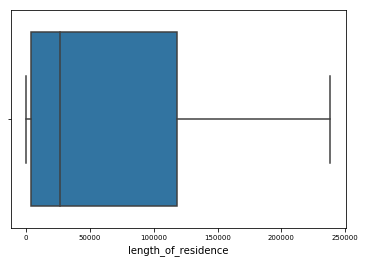

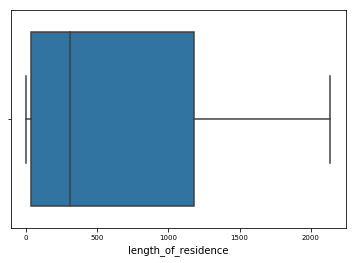

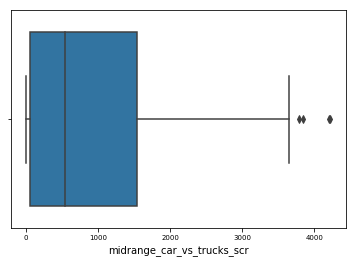

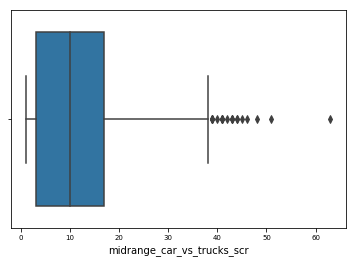

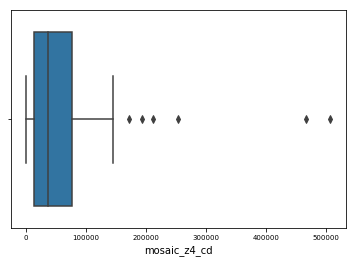

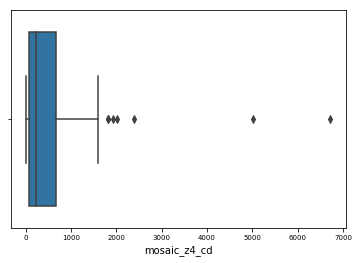

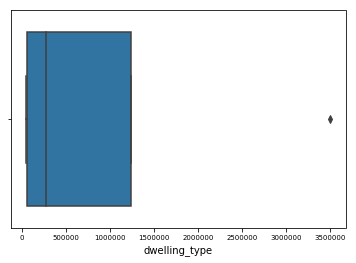

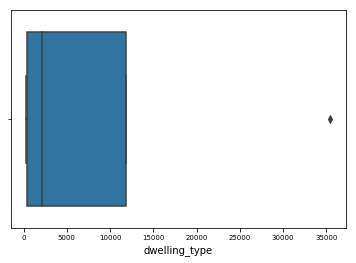

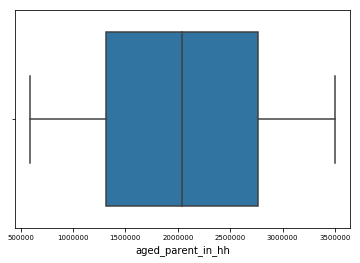

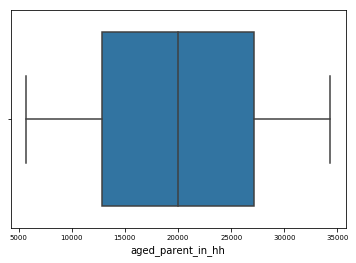

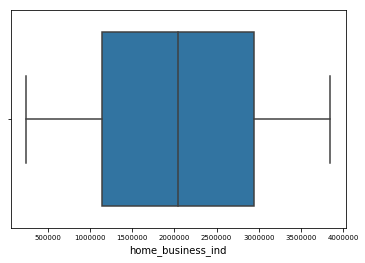

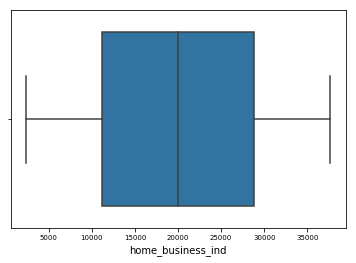

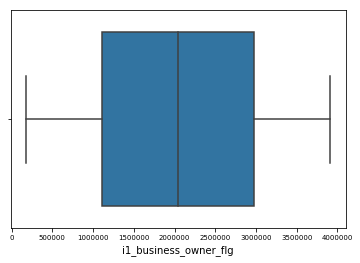

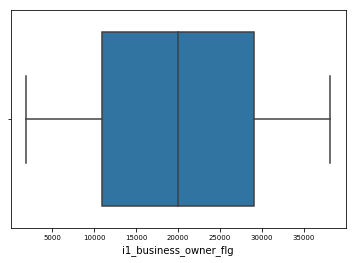

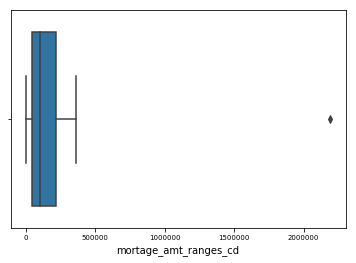

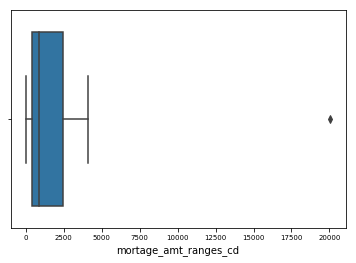

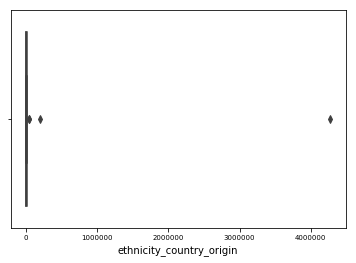

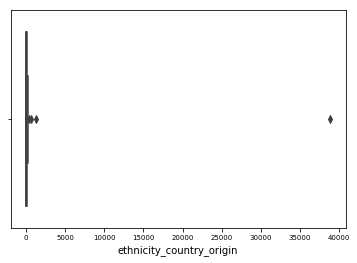

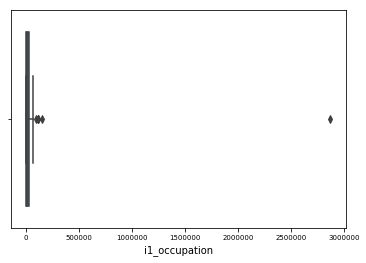

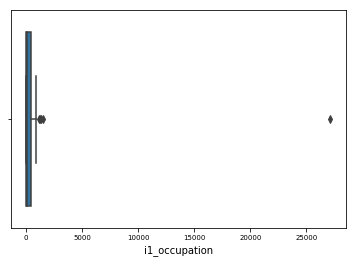

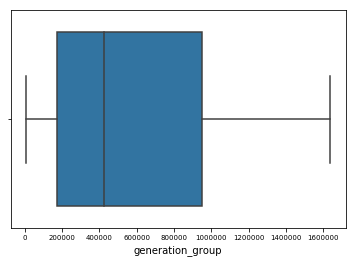

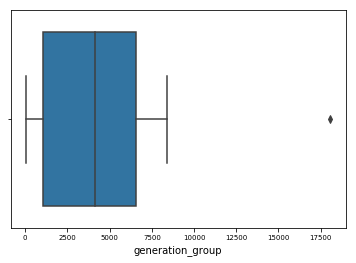

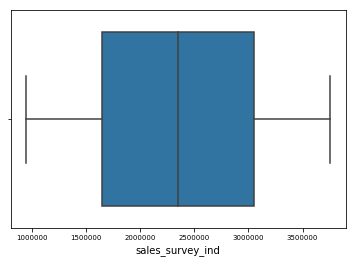

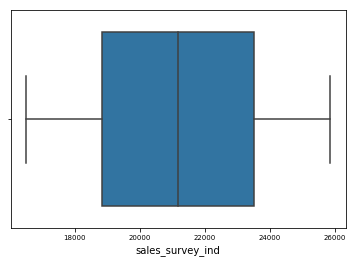

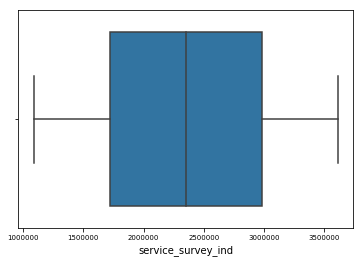

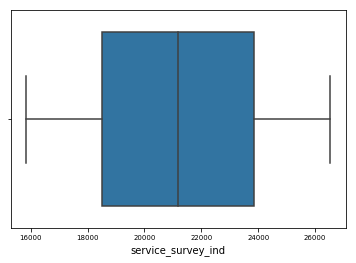

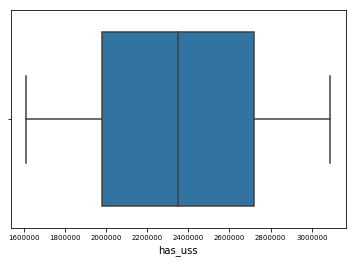

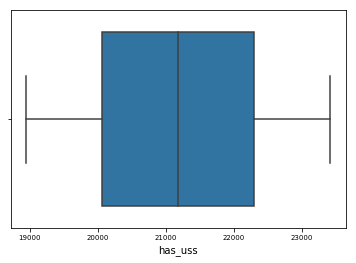

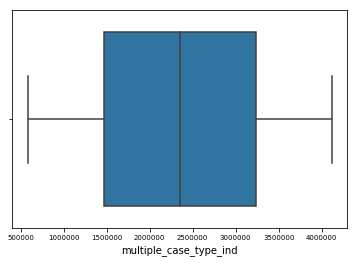

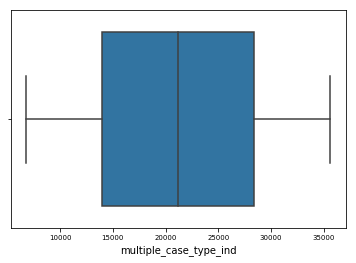

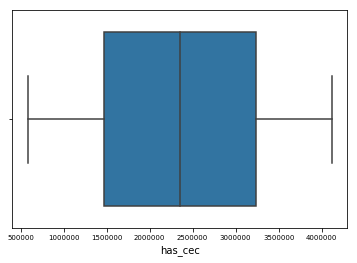

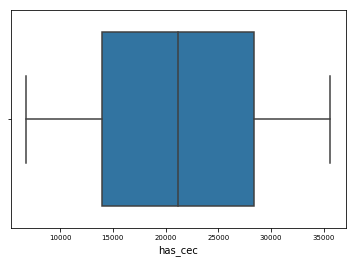

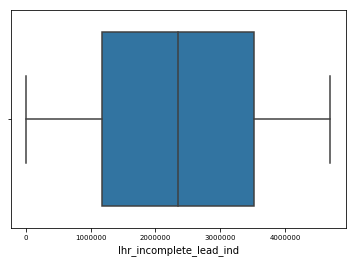

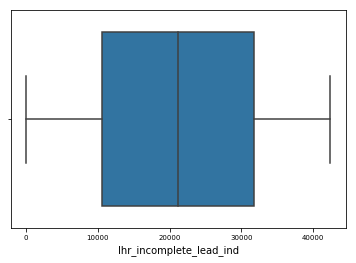

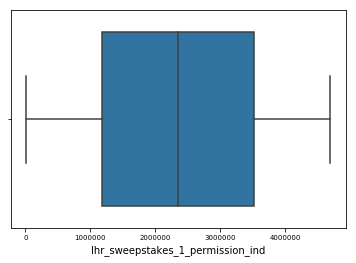

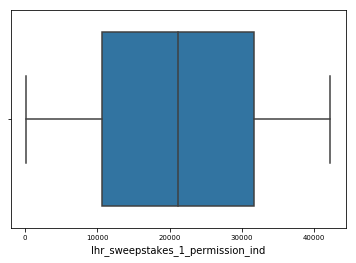

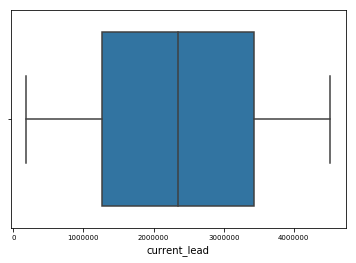

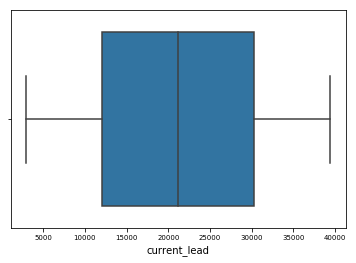

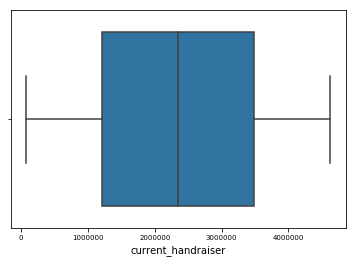

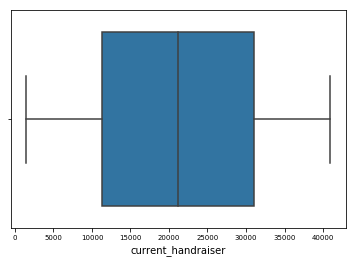

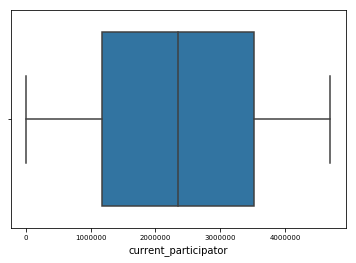

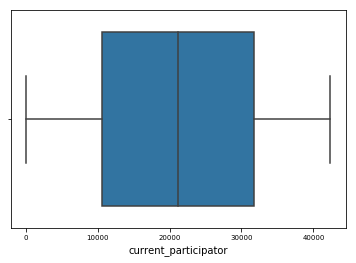

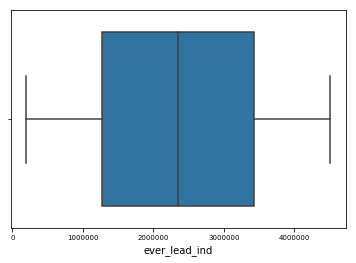

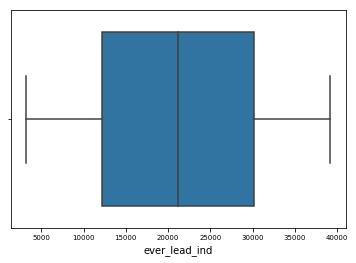

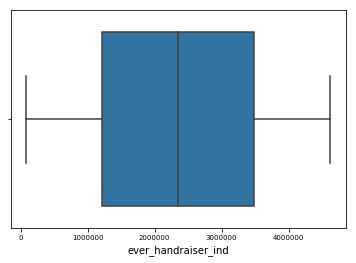

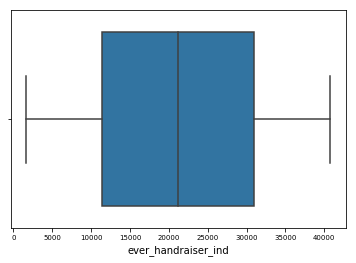

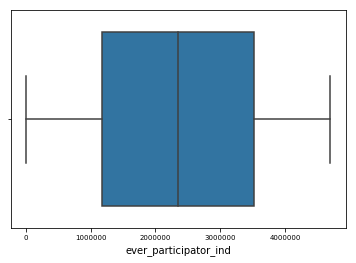

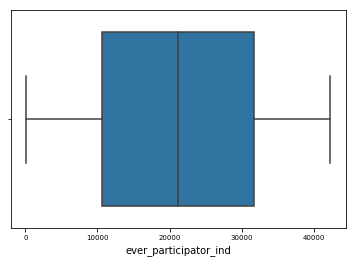

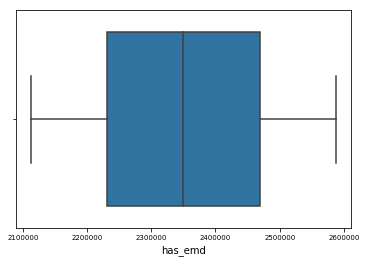

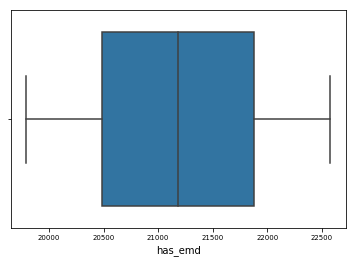

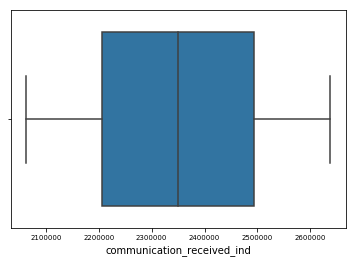

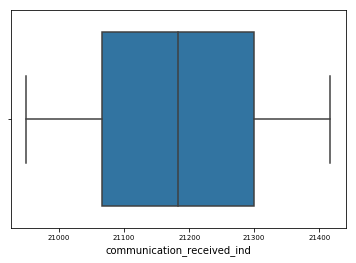

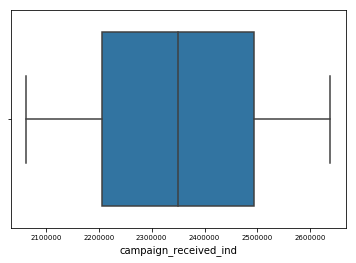

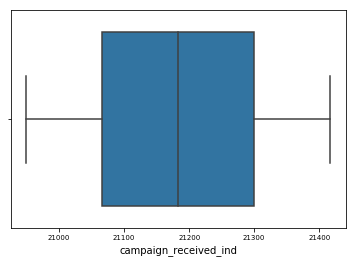

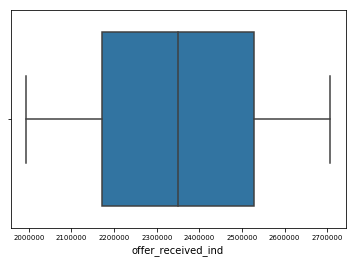

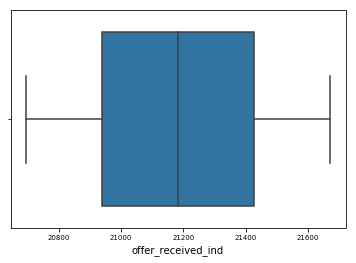

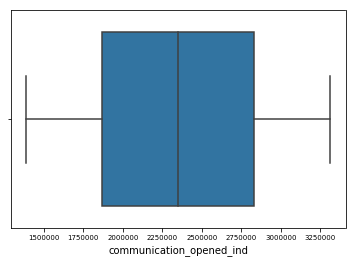

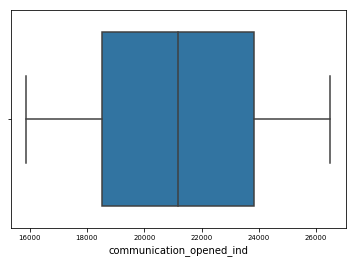

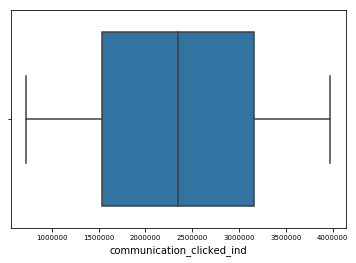

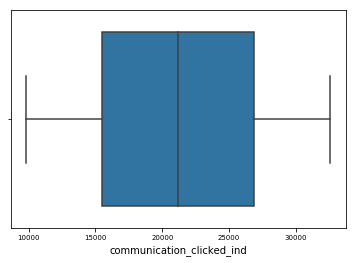

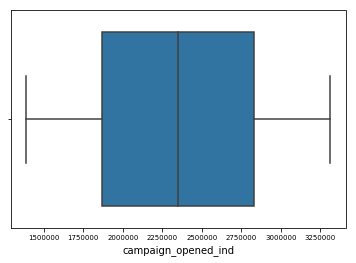

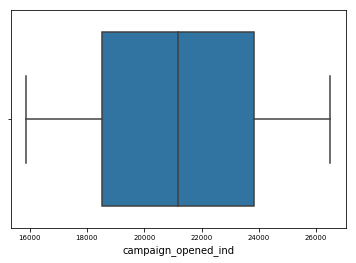

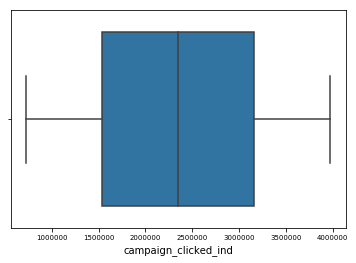

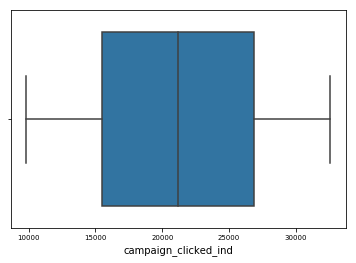

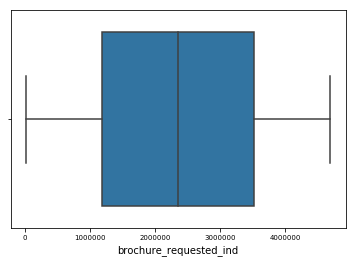

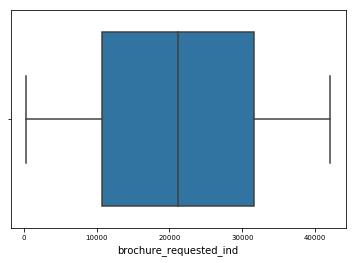

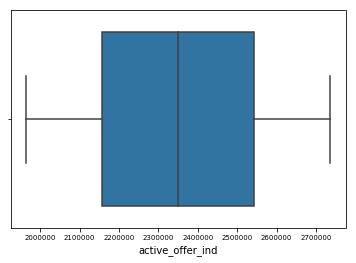

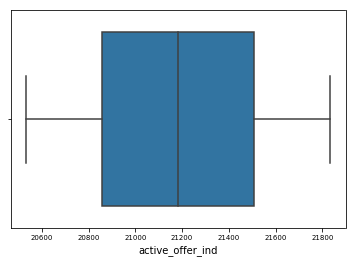

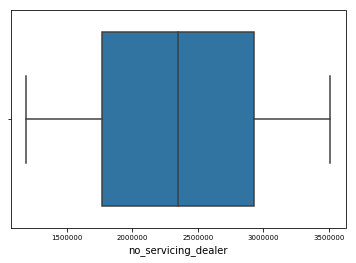

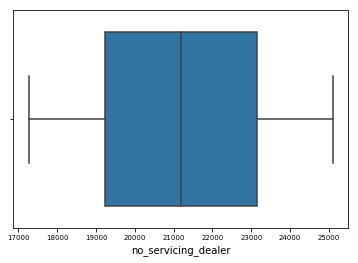

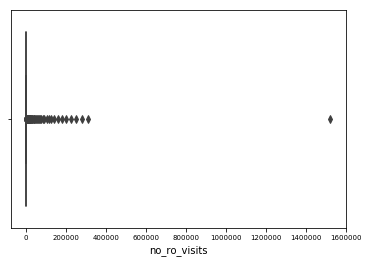

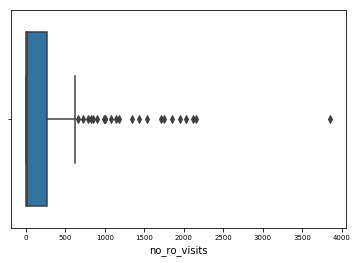

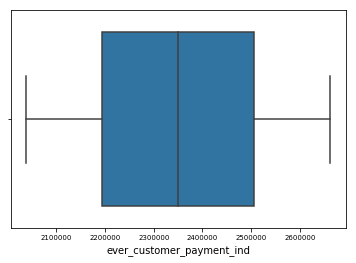

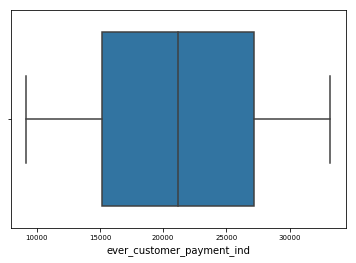

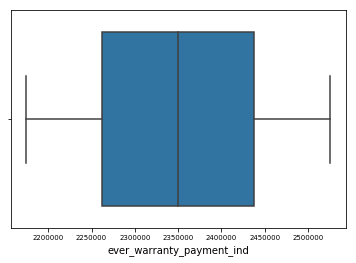

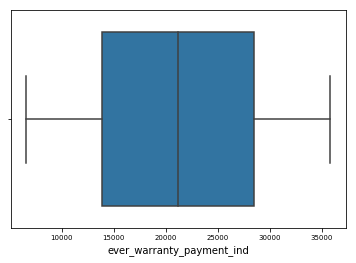

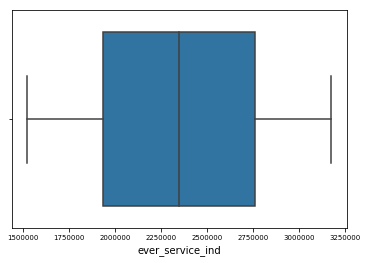

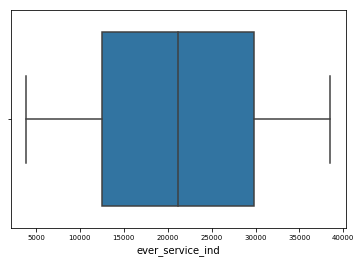

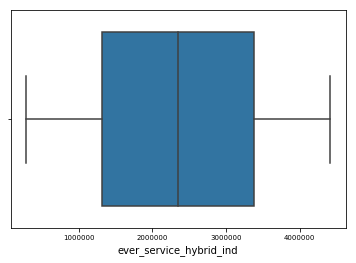

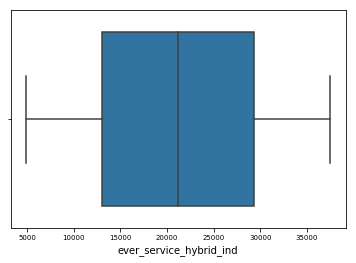

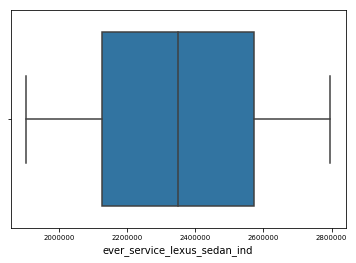

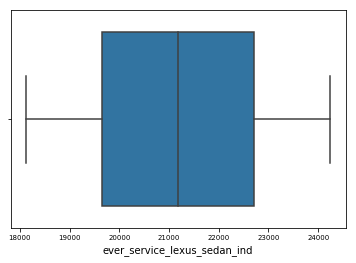

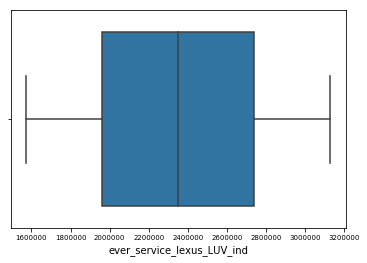

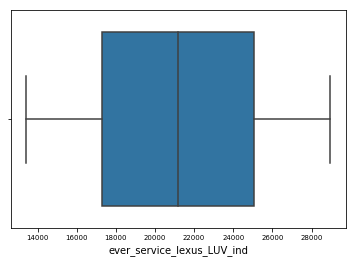

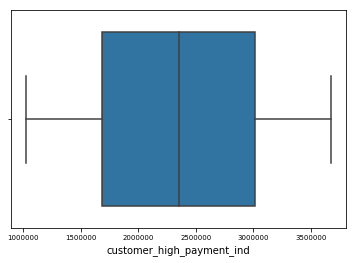

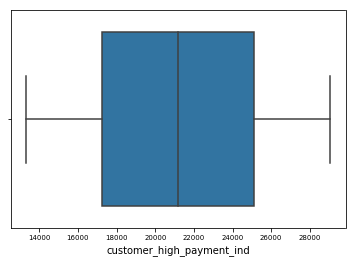

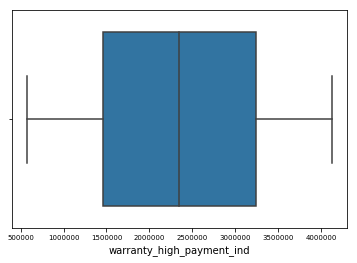

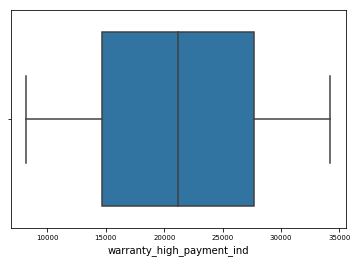

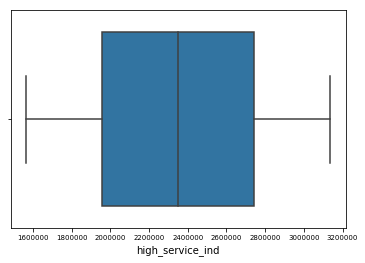

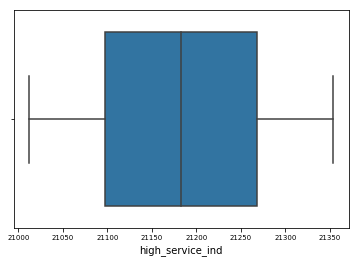

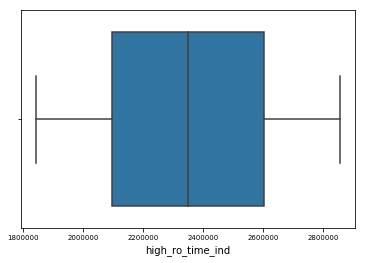

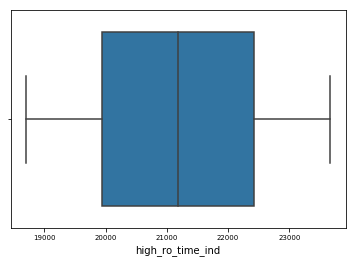

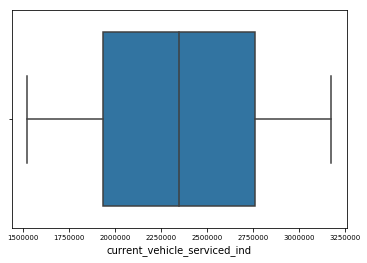

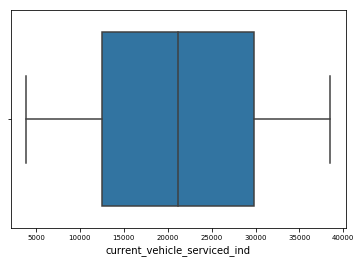

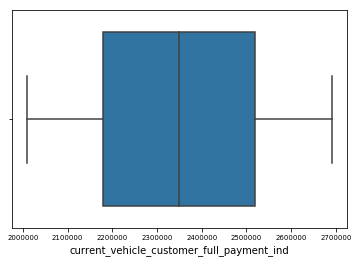

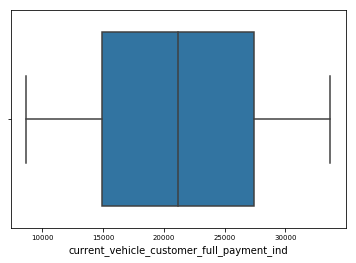

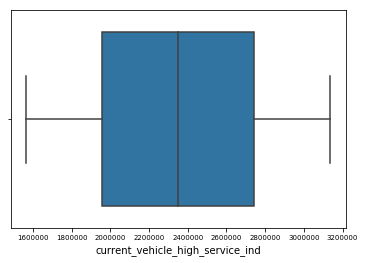

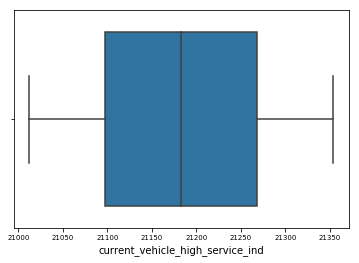

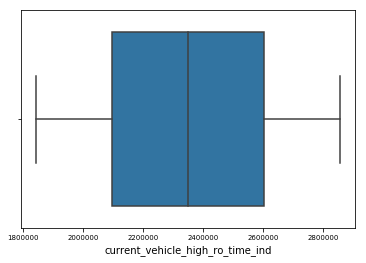

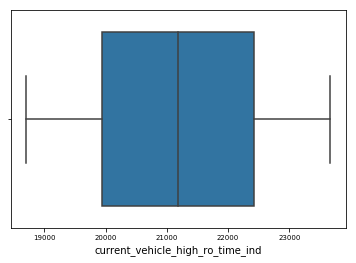

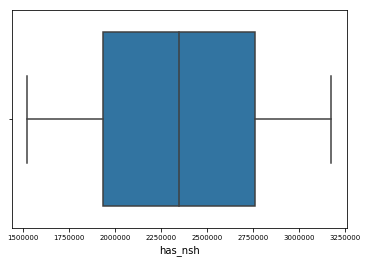

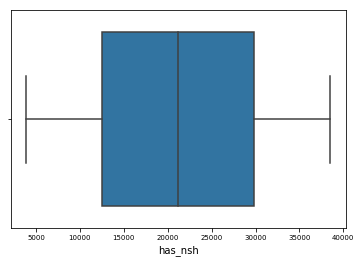

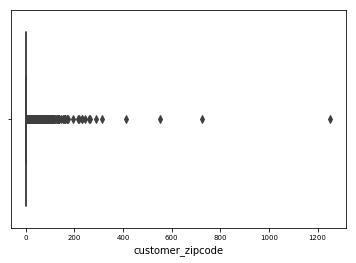

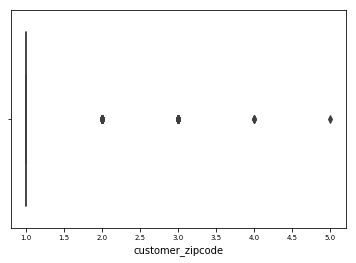

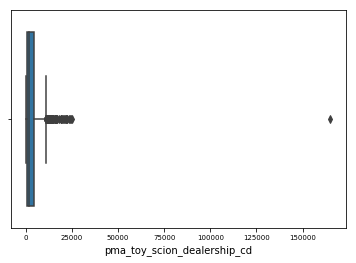

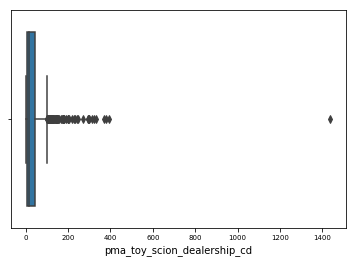

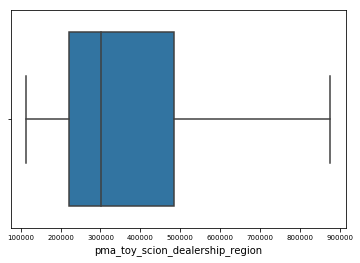

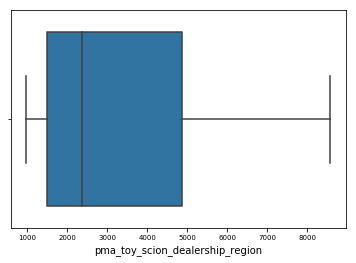

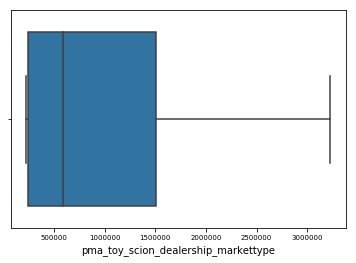

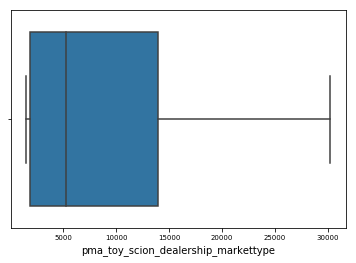

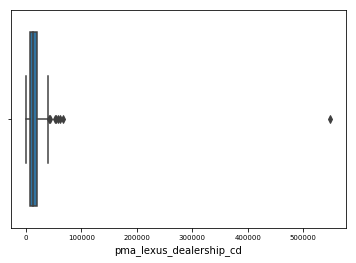

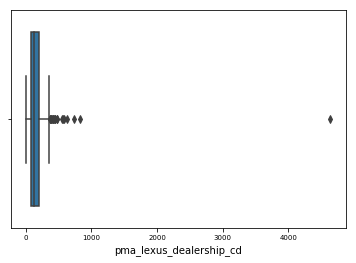

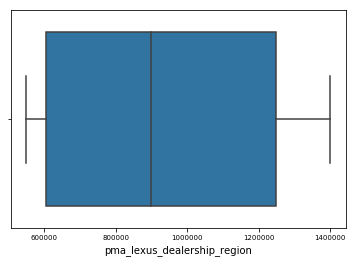

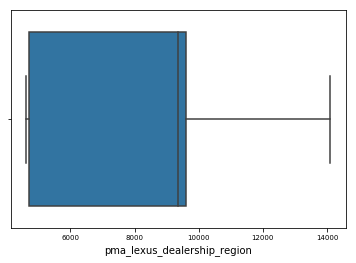

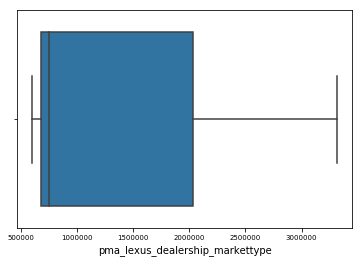

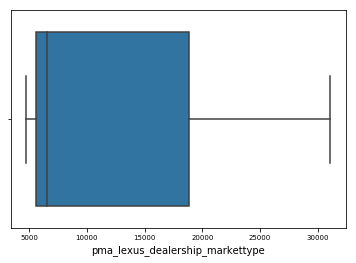

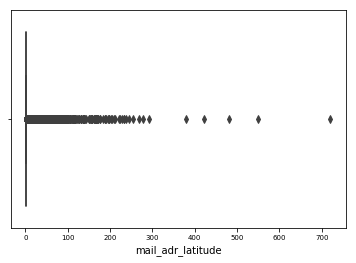

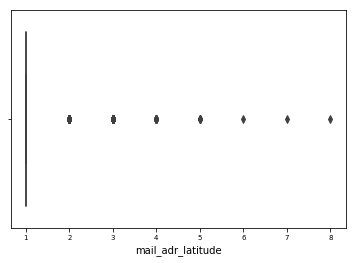

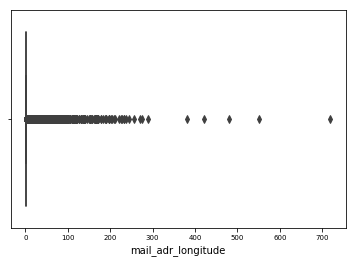

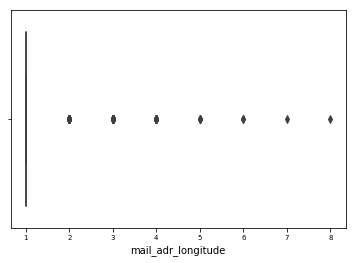

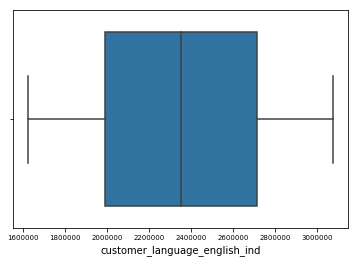

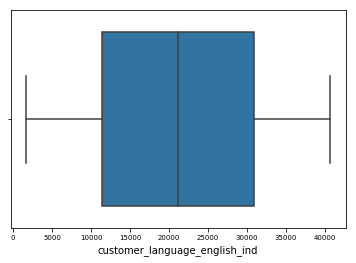

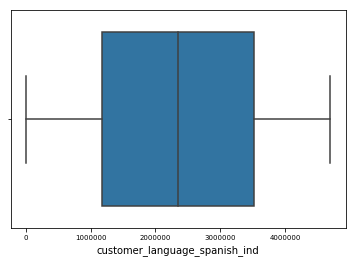

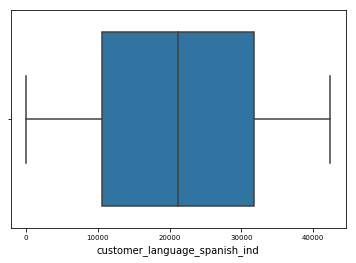

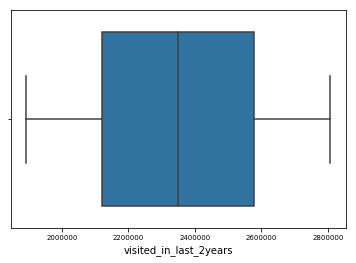

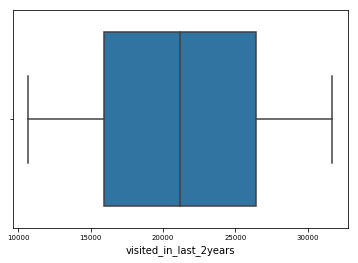

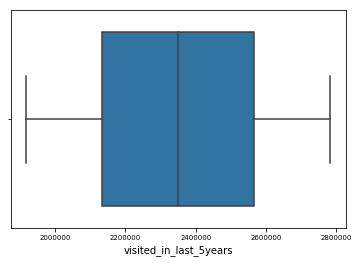

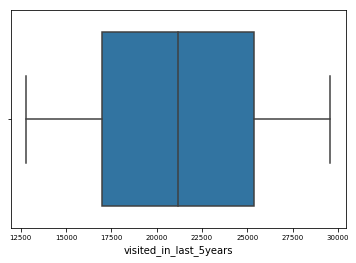

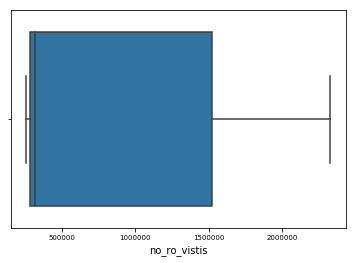

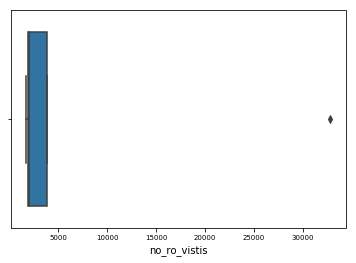

In [100]:
for col in X_casted.columns:
    sns.boxplot(X_casted[col][y==0].value_counts())
    plt.show()
    sns.boxplot(X_casted[col][y==1].value_counts())
    plt.show()

In [164]:
start=time.time()
X_outlier_treated=data_prep.outlier_treatment_dataframe(X_casted)
print(time.time()-start)

/root/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:7772: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy




 Time taken to execute the function is 15.235895872116089

15.237751245498657


In [166]:
X_outlier_treated.to_pickle(mlresult_dir + str(project_identifier) + '_' + str(datetime.datetime.now().day)+ 'X_outlier_treated.pkl')

In [48]:
X_outlier_treated= pd.read_pickle(mlresult_dir +'c360_customeradt_in_market_lexus_16X_outlier_treated.pkl')

In [49]:
categorical_list=X_outlier_treated.select_dtypes(include='O').columns.tolist()
numerical_list=X_outlier_treated.select_dtypes(exclude='O').columns.tolist()

In [51]:
numerical_list

['avg_zip3_vehicle_val',
 'i1_education',
 'avg_no_vehicles_per_hh',
 'max_value_vehicles_per_hh',
 'no_of_chldrn_cd',
 'no_of_adlts_per_hh_cd',
 'i1_occupation_grp_val',
 'length_of_residence',
 'pma_toy_scion_dealership_cd',
 'pma_toy_scion_dealership_region',
 'pma_lexus_dealership_cd']

In [54]:
X_outlier_treated[['no_of_chldrn_cd', 'avg_no_vehicles_per_hh', 'no_of_adlts_per_hh_cd']]= X_outlier_treated[['no_of_chldrn_cd', 'avg_no_vehicles_per_hh', 'no_of_adlts_per_hh_cd']].astype('O')

In [57]:
categorical_list+=['no_of_chldrn_cd', 'avg_no_vehicles_per_hh', 'no_of_adlts_per_hh_cd']

In [60]:
numerical_list=X_outlier_treated.select_dtypes(exclude='O').columns.tolist()

In [61]:
numerical_list

['avg_zip3_vehicle_val',
 'i1_education',
 'max_value_vehicles_per_hh',
 'i1_occupation_grp_val',
 'length_of_residence',
 'pma_toy_scion_dealership_cd',
 'pma_toy_scion_dealership_region',
 'pma_lexus_dealership_cd']

In [63]:
X_imputed=pd.DataFrame(None)

In [64]:
#for cat_col in categorical_list:
start=time.time()
X_imputed[categorical_list]=X_outlier_treated[categorical_list].apply(lambda x : x.fillna('Not Present'))  #if x.dtype.kind in 'bOSU' else fill_NaN.fit_transform(x)
print(time.time() - start)

284.6422016620636


In [65]:
gc.collect()

1752

In [66]:
X_imputed[categorical_list].head()

no_owned_vehicle  no_new_purchase_vehicle  no_used_purchase_vehicle  \
0               6+                      1.0                       0.0   
1                1                      0.0                       0.0   
2                0                      0.0                       0.0   
3                0                      0.0                       0.0   
4                0                      0.0                       0.0   

   no_cpo_purchase_vehicle state_residence  owned_lexus_sedan_ind  \
0                      0.0              FL                      1   
1                      0.0              NY                      0   
2                      0.0              CA                      0   
3                      0.0              GA                      0   
4                      0.0              MI                      0   

   owned_lexus_LUV_ind  owned_lexus_new_luv_ind  owned_lexus_cpo_luv_ind  \
0                    1                        1                        0   
1                    1                        1                        0   
2                    0                        0                        0   
3                    0                        0                        0   
4                    0                        0                        0   

   owned_lexus_new_sedan_ind          ...            mail_adr_latitude  \
0                          0          ...                    +26422787   
1                          0          ...                    +40859176   
2                          0          ...                    +33856665   
3                          0          ...                    +33856665   
4                          0          ...                    +33856665   

   mail_adr_longitude  customer_language_english_ind  \
0          -081829644                              1   
1          -073491514                              0   
2          -118309377                              0   
3          -118309377                              0   
4          -118309377                              0   

   customer_language_spanish_ind  visited_in_last_2years  \
0                              0                       0   
1                              0                       0   
2                              0                       0   
3                              0                       0   
4                              0                       0   

   visited_in_last_5years  no_ro_vistis  no_of_chldrn_cd  \
0                       0             2              0.0   
1                       0             0              0.0   
2                       0             0              0.0   
3                       0             0              0.0   
4                       0             0              0.0   

   avg_no_vehicles_per_hh  no_of_adlts_per_hh_cd  
0                    1.50                    2.0  
1                    2.97                    5.0  
2                    2.00                    2.0  
3                    2.00                    2.0  
4                    2.00                    2.0  

[5 rows x 208 columns]

In [67]:
gc.collect()

0

In [68]:
start=time.time()
X_outlier_treated[numerical_list]=X_outlier_treated[numerical_list].apply(lambda x: x.replace([np.inf, -np.inf], np.nan))
print(time.time() - start)

3.6235859394073486


In [69]:
gc.collect()

7

In [70]:
start=time.time()
X_imputed[numerical_list]=X_outlier_treated[numerical_list].apply(lambda x : x.fillna(x.mean()))  #if x.dtype.kind in 'bOSU' else fill_NaN.fit_transform(x)
#X_outlier_treated[numerical_list]=fill_NaN.fit_transform(X_outlier_treated[numerical_list])
print(time.time() - start)

1.7966890335083008


In [71]:
gc.collect()
X_imputed.shape

(4742446, 216)

In [72]:
X_imputed.head()

no_owned_vehicle  no_new_purchase_vehicle  no_used_purchase_vehicle  \
0               6+                      1.0                       0.0   
1                1                      0.0                       0.0   
2                0                      0.0                       0.0   
3                0                      0.0                       0.0   
4                0                      0.0                       0.0   

   no_cpo_purchase_vehicle state_residence  owned_lexus_sedan_ind  \
0                      0.0              FL                      1   
1                      0.0              NY                      0   
2                      0.0              CA                      0   
3                      0.0              GA                      0   
4                      0.0              MI                      0   

   owned_lexus_LUV_ind  owned_lexus_new_luv_ind  owned_lexus_cpo_luv_ind  \
0                    1                        1                        0   
1                    1                        1                        0   
2                    0                        0                        0   
3                    0                        0                        0   
4                    0                        0                        0   

   owned_lexus_new_sedan_ind           ...             avg_no_vehicles_per_hh  \
0                          0           ...                               1.50   
1                          0           ...                               2.97   
2                          0           ...                               2.00   
3                          0           ...                               2.00   
4                          0           ...                               2.00   

   no_of_adlts_per_hh_cd  avg_zip3_vehicle_val  i1_education  \
0                    2.0          41476.723989           4.0   
1                    5.0          41088.951767           1.0   
2                    2.0          41610.900445           3.0   
3                    2.0          41610.900445           3.0   
4                    2.0          41610.900445           3.0   

   max_value_vehicles_per_hh  i1_occupation_grp_val  length_of_residence  \
0               62775.000000                    3.0             0.000000   
1               30775.000000                    4.0            17.000000   
2               28588.589396                    1.0            13.620711   
3               28588.589396                    1.0            13.620711   
4               28588.589396                    1.0            13.620711   

   pma_toy_scion_dealership_cd  pma_toy_scion_dealership_region  \
0                       9112.0                               50   
1                      31076.0                               16   
2                      99999.0                                0   
3                      99999.0                                0   
4                      99999.0                                0   

   pma_lexus_dealership_cd  
0                  60908.0  
1                  63105.0  
2                  99999.0  
3                  99999.0  
4                  99999.0  

[5 rows x 216 columns]

In [74]:
gc.collect()

0

In [75]:
X_outlier_treated.drop(['mail_adr_latitude','mail_adr_longitude', 'customer_zipcode'], axis=1, inplace=True)


In [76]:
X_imputed.drop(['mail_adr_latitude','mail_adr_longitude', 'customer_zipcode'], axis=1, inplace=True)

In [77]:
gc.collect()

0

In [80]:
X_imputed[numerical_list].skew()

avg_zip3_vehicle_val              -8.057462
i1_education                      -0.094151
max_value_vehicles_per_hh          1.022938
i1_occupation_grp_val              0.125076
length_of_residence                0.979183
pma_toy_scion_dealership_cd        0.392653
pma_toy_scion_dealership_region    0.629101
pma_lexus_dealership_cd           -2.343312
dtype: float64

In [79]:
gc.collect()

0

In [87]:
cols_trans=['avg_zip3_vehicle_val','max_value_vehicles_per_hh', 'pma_lexus_dealership_cd']
X_imputed[cols_trans]=X_imputed[cols_trans].abs()


In [100]:
X_imputed[cols_trans]= X_outlier_treated[cols_trans].copy()

In [109]:
X_imputed.drop('pma_lexus_dealership_cd', axis=1, inplace=True)

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



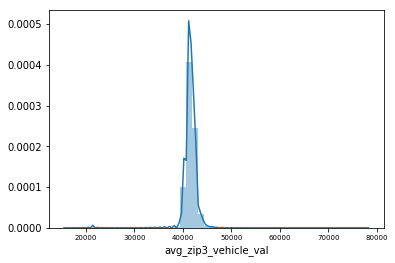

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



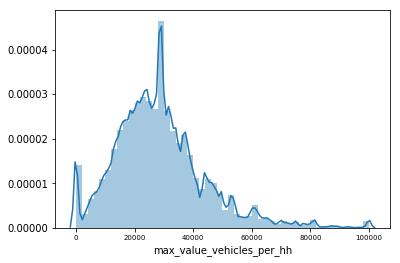

In [111]:
for col in ['avg_zip3_vehicle_val','max_value_vehicles_per_hh']:

    sns.distplot(X_imputed[col])
    plt.show()

    '''plt.hist(boxcox(X_casted[col], 0))
    plt.show()'''


/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



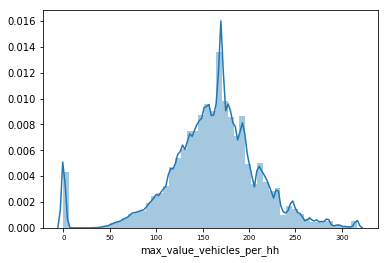

In [118]:
X_imputed['max_value_vehicles_per_hh']=X_imputed['max_value_vehicles_per_hh'].abs()
sns.distplot(X_imputed['max_value_vehicles_per_hh']**.5)

In [119]:
X_imputed['max_value_vehicles_per_hh']=X_imputed['max_value_vehicles_per_hh']**.5

In [120]:
X_imputed.to_pickle(mlresult_dir + str(project_identifier) + '_' + str(datetime.datetime.now().day)+ 'X_imputed.pkl')

In [123]:
X_imputed.isnull().sum()[X_imputed.isnull().sum()>0]

Series([], dtype: int64)

In [134]:
categorical_list.remove('customer_zipcode')

categorical_list.remove('mail_adr_latitude')

categorical_list.remove('mail_adr_longitude')

In [142]:
X_imputed['no_ro_vistis'].replace({'4+':4}, inplace=True)

In [143]:
X_imputed[categorical_list]=X_imputed[categorical_list].apply(lambda x : LabelEncoder().fit_transform(x)) #3min

In [147]:
X_imputed.to_pickle(mlresult_dir + str(project_identifier) + '_' + str(datetime.datetime.now().day)+ 'X_encoded.pkl')

In [149]:
y=pd.read_pickle(mlresult_dir+ 'c360_customeradt_in_market_lexus_14_y_new_luv.pkl')

In [150]:
y.shape

(4742446,)

In [144]:
X_imputed.shape

(4742446, 212)

In [146]:
train= X_imputed.copy()

In [153]:
y.value_counts()

0    4700080
1      42366
Name: dep_purchase_lexus_new_luv_6mo, dtype: int64

In [152]:
train[y.name]=y.copy()

## Storing the processed dataframe

In [157]:
train.to_pickle(mlresult_dir + str(project_identifier) + '_' + str(datetime.datetime.now().day)+ 'train_80:20_212vars.pkl')

In [158]:
gc.collect()

13086

In [171]:
start= time.time()
f_class=SelectKBest(f_classif, k=50)
X_fclassify = f_class.fit_transform(X_imputed, y)
print(time.time()- start)

48.534029483795166


### Feature Selection

In [167]:
gc.collect()

538

In [172]:
columns_retained_f_class = X_imputed.columns[f_class.get_support()].values

In [ ]:
columns_retained_f_class

In [173]:
X_fclassify= pd.DataFrame(X_fclassify, columns=columns_retained_f_class)

In [176]:
X_fclassify.to_pickle(mlresult_dir + str(project_identifier) + '_' + str(datetime.datetime.now().day)+ 'X_encoded_fclassify_retained_50vars.pkl')

In [181]:
X_fclassify=X_fclassify.iloc[train_sampled.index]

In [ ]:
start= time.time()
trans_mutual_info=SelectKBest(mutual_info_classif, k=50)
X_mutual_info = trans_mutual_info.fit_transform(X_imputed, y) #3.44
print(time.time()- start)

In [ ]:
y.dtype

### Ploting in 2D

In [ ]:
def plot_2d_space(X, y, label='Classes'):   
    pca = PCA(n_components=2)
    X_pca = pd.DataFrame(pca.fit_transform(X))
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter( 
            X_pca.loc[y.reset_index(drop=True)== l, 0],
            X_pca.loc[y.reset_index(drop=True)== l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

In [ ]:
plot_2d_space(X_h5, y_h5, 'Imbalanced dataset (2 PCA components)')

### Data Split

In [ ]:
f1s,accs,precs,recalls, rus, model= learning_curve(X_train, X_test,y_train, y_test)

/root/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



In [108]:
gc.collect()

73300

In [ ]:
gc.collect()